In [44]:
import pandas as pd
import collections
from matplotlib import pyplot as plt
from sklearn.datasets import make_regression
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from lightgbm import LGBMRegressor

In [51]:
# The data frame is called house_info
raw_info = pd.read_csv("kc_house_data.csv",error_bad_lines=False)

In [52]:
raw_info

id        date     price  bedrooms  bathrooms  sqft_living  \
0      7129300520  10/13/2014  221900.0         3       1.00         1180   
1      6414100192   12/9/2014  538000.0         3       2.25         2570   
2      5631500400   2/25/2015  180000.0         2       1.00          770   
3      2487200875   12/9/2014  604000.0         4       3.00         1960   
4      1954400510   2/18/2015  510000.0         3       2.00         1680   
...           ...         ...       ...       ...        ...          ...   
21592   263000018   5/21/2014  360000.0         3       2.50         1530   
21593  6600060120   2/23/2015  400000.0         4       2.50         2310   
21594  1523300141   6/23/2014  402101.0         2       0.75         1020   
21595   291310100   1/16/2015  400000.0         3       2.50         1600   
21596  1523300157  10/15/2014  325000.0         2       0.75         1020   

       sqft_lot  floors  waterfront  view  ...  grade  sqft_above  \
0          5650     1.0         NaN   0.0  ...      7        1180   
1          7242     2.0         0.0   0.0  ...      7        2170   
2         10000     1.0         0.0   0.0  ...      6         770   
3          5000     1.0         0.0   0.0  ...      7        1050   
4          8080     1.0         0.0   0.0  ...      8        1680   
...         ...     ...         ...   ...  ...    ...         ...   
21592      1131     3.0         0.0   0.0  ...      8        1530   
21593      5813     2.0         0.0   0.0  ...      8        2310   
21594      1350     2.0         0.0   0.0  ...      7        1020   
21595      2388     2.0         NaN   0.0  ...      8        1600   
21596      1076     2.0         0.0   0.0  ...      7        1020   

       sqft_basement yr_built  yr_renovated  zipcode      lat     long  \
0                0.0     1955           0.0    98178  47.5112 -122.257   
1              400.0     1951        1991.0    98125  47.7210 -122.319   
2                0.0     1933           NaN    98028  47.7379 -122.233   
3              910.0     1965           0.0    98136  47.5208 -122.393   
4                0.0     1987           0.0    98074  47.6168 -122.045   
...              ...      ...           ...      ...      ...      ...   
21592            0.0     2009           0.0    98103  47.6993 -122.346   
21593            0.0     2014           0.0    98146  47.5107 -122.362   
21594            0.0     2009           0.0    98144  47.5944 -122.299   
21595            0.0     2004           0.0    98027  47.5345 -122.069   
21596            0.0     2008           0.0    98144  47.5941 -122.299   

       sqft_living15  sqft_lot15  
0               1340        5650  
1               1690        7639  
2               2720        8062  
3               1360        5000  
4               1800        7503  
...              ...         ...  
21592           1530        1509  
21593           1830        7200  
21594           1020        2007  
21595           1410        1287  
21596           1020        1357  

[21597 rows x 21 columns]

In [21]:
%store raw_info

Stored 'raw_info' (DataFrame)


In [47]:
house_info = pd.DataFrame({'Bedrooms':raw_info.bedrooms, 'Bathrooms':raw_info.bathrooms, 'Floors':raw_info.floors, 
                           'Year Built':raw_info.yr_built, 'Year Renoveted':raw_info.yr_renovated,
                           'Size of Basement':raw_info.sqft_basement,'Condition':raw_info.condition,
                          'Size of Above':raw_info.sqft_above,'Location':raw_info.zipcode,
                          'Price':raw_info.price, 'Sqft_living':raw_info.sqft_living,'Sqft_lot':raw_info.sqft_lot,
                          'Sqft_basement':raw_info.sqft_basement})

In [48]:
house_info

Bedrooms  Bathrooms  Floors  Year Built  Year Renoveted  \
0             3       1.00     1.0        1955             0.0   
1             3       2.25     2.0        1951          1991.0   
2             2       1.00     1.0        1933             NaN   
3             4       3.00     1.0        1965             0.0   
4             3       2.00     1.0        1987             0.0   
...         ...        ...     ...         ...             ...   
21592         3       2.50     3.0        2009             0.0   
21593         4       2.50     2.0        2014             0.0   
21594         2       0.75     2.0        2009             0.0   
21595         3       2.50     2.0        2004             0.0   
21596         2       0.75     2.0        2008             0.0   

      Size of Basement  Condition  Size of Above  Location     Price  \
0                  0.0          3           1180     98178  221900.0   
1                400.0          3           2170     98125  538000.0   
2                  0.0          3            770     98028  180000.0   
3                910.0          5           1050     98136  604000.0   
4                  0.0          3           1680     98074  510000.0   
...                ...        ...            ...       ...       ...   
21592              0.0          3           1530     98103  360000.0   
21593              0.0          3           2310     98146  400000.0   
21594              0.0          3           1020     98144  402101.0   
21595              0.0          3           1600     98027  400000.0   
21596              0.0          3           1020     98144  325000.0   

       Sqft_living  Sqft_lot Sqft_basement  
0             1180      5650           0.0  
1             2570      7242         400.0  
2              770     10000           0.0  
3             1960      5000         910.0  
4             1680      8080           0.0  
...            ...       ...           ...  
21592         1530      1131           0.0  
21593         2310      5813           0.0  
21594         1020      1350           0.0  
21595         1600      2388           0.0  
21596         1020      1076           0.0  

[21597 rows x 13 columns]

In [24]:
house_info.describe()

Bedrooms     Bathrooms        Floors    Year Built  Year Renoveted  \
count  21597.000000  21597.000000  21597.000000  21597.000000    17755.000000   
mean       3.373200      2.115826      1.494096   1970.999676       83.636778   
std        0.926299      0.768984      0.539683     29.375234      399.946414   
min        1.000000      0.500000      1.000000   1900.000000        0.000000   
25%        3.000000      1.750000      1.000000   1951.000000        0.000000   
50%        3.000000      2.250000      1.500000   1975.000000        0.000000   
75%        4.000000      2.500000      2.000000   1997.000000        0.000000   
max       33.000000      8.000000      3.500000   2015.000000     2015.000000   

          Condition  Size of Above      Location         Price   Sqft_living  \
count  21597.000000   21597.000000  21597.000000  2.159700e+04  21597.000000   
mean       3.409825    1788.596842  98077.951845  5.402966e+05   2080.321850   
std        0.650546     827.759761     53.513072  3.673681e+05    918.106125   
min        1.000000     370.000000  98001.000000  7.800000e+04    370.000000   
25%        3.000000    1190.000000  98033.000000  3.220000e+05   1430.000000   
50%        3.000000    1560.000000  98065.000000  4.500000e+05   1910.000000   
75%        4.000000    2210.000000  98118.000000  6.450000e+05   2550.000000   
max        5.000000    9410.000000  98199.000000  7.700000e+06  13540.000000   

           Sqft_lot  
count  2.159700e+04  
mean   1.509941e+04  
std    4.141264e+04  
min    5.200000e+02  
25%    5.040000e+03  
50%    7.618000e+03  
75%    1.068500e+04  
max    1.651359e+06

In [49]:
locationzip =raw_info.zipcode
locationzip

0        98178
1        98125
2        98028
3        98136
4        98074
         ...  
21592    98103
21593    98146
21594    98144
21595    98027
21596    98144
Name: zipcode, Length: 21597, dtype: int64

In [54]:
index = []
for i,x in enumerate(raw_info.lat):
    if x == 47.618:index.append(i)
    if x == 47.528:index.append(i)
    if x == 47.502:index.append(i)  
    if x == 47.530:index.append(i)
    if x == 47.567:index.append(i)
    if x == 47.733:index.append(i)   
    if x == 47.648:index.append(i)

index
for i,x in enumerate(index):print(i,locationzip[x])

0 98199
1 98106
2 98075
3 98116
4 98106
5 98108
6 98199
7 98056
8 98136
9 98065
10 98040
11 98029
12 98006
13 98024
14 98106
15 98059
16 98118
17 98056
18 98029
19 98119
20 98199
21 98199
22 98040
23 98006
24 98006
25 98106
26 98052
27 98126
28 98108
29 98199
30 98118
31 98118
32 98122
33 98027
34 98027
35 98004
36 98199


In [221]:
zip_loca = [98178,98199,98106,98072,98075,98019,98116,98106,98178,98108,98199,98056,98136,98065,98040,98029,
98006,98024,98106,98059,98034,98118,98056,98029,98119,98199,98199,98040,98034,98006,98006,98146,
98106,98072,98052,98126,98108,98199,98059,98118,98118,98122,98027,98027,98004,98199]

In [56]:
def PRICE_BEDROOM(AMOUNT_BEDROOM):
    
    locations = house_info['Location'].tolist()
    locationzip =raw_info.zipcode
    amount_bed = house_info["Bedrooms"].tolist()
    
    index = []
    for i,x in enumerate(raw_info.lat):
        if x == 47.618:index.append(i)
        if x == 47.528:index.append(i)
        if x == 47.502:index.append(i)  
        if x == 47.530:index.append(i)
        if x == 47.567:index.append(i)
        if x == 47.733:index.append(i)   
        if x == 47.648:index.append(i)

    
    #zip_loca = []
    #for i in index:zip_loca.append(locationzip[i])
    
    bedrooms_index = []
    for i,x in enumerate(amount_bed):
        if x == AMOUNT_BEDROOM:bedrooms_index.append(i)
    len(bedrooms_index)

    bedrooms_eastking = []
    for i in bedrooms_index:
        if locations[i] == zip_loca[0] : bedrooms_eastking.append(i)
        elif locations[i] == zip_loca[1] : bedrooms_eastking.append(i)
        elif locations[i] == zip_loca[2] : bedrooms_eastking.append(i)
        elif locations[i] == zip_loca[3] : bedrooms_eastking.append(i)
        elif locations[i] == zip_loca[4]: bedrooms_eastking.append(i)
        elif locations[i] == zip_loca[5] : bedrooms_eastking.append(i)
        elif locations[i] == zip_loca[6] : bedrooms_eastking.append(i)
        elif locations[i] == zip_loca[7]: bedrooms_eastking.append(i)
        elif locations[i] == zip_loca[8] : bedrooms_eastking.append(i)
        elif locations[i] == zip_loca[9] : bedrooms_eastking.append(i)
        elif locations[i] == zip_loca[10] : bedrooms_eastking.append(i)
        elif locations[i] == zip_loca[11] : bedrooms_eastking.append(i)
        elif locations[i] == zip_loca[12]: bedrooms_eastking.append(i)
        elif locations[i] == zip_loca[13] : bedrooms_eastking.append(i)
        elif locations[i] == zip_loca[14] : bedrooms_eastking.append(i)
        elif locations[i] == zip_loca[15] : bedrooms_eastking.append(i)
        elif locations[i] == zip_loca[16]: bedrooms_eastking.append(i)
        elif locations[i] == zip_loca[17] : bedrooms_eastking.append(i)
        elif locations[i] == zip_loca[18]: bedrooms_eastking.append(i)
        elif locations[i] == zip_loca[19] : bedrooms_eastking.append(i)
        elif locations[i] == zip_loca[20]: bedrooms_eastking.append(i)
        elif locations[i] == zip_loca[21] : bedrooms_eastking.append(i)
        elif locations[i] == zip_loca[22] : bedrooms_eastking.append(i)
        elif locations[i] == zip_loca[23] : bedrooms_eastking.append(i)
        elif locations[i] == zip_loca[24] : bedrooms_eastking.append(i)
        elif locations[i] == zip_loca[25] : bedrooms_eastking.append(i)
        elif locations[i] == zip_loca[26] : bedrooms_eastking.append(i)
        elif locations[i] == zip_loca[27] : bedrooms_eastking.append(i)
        elif locations[i] == zip_loca[28]: bedrooms_eastking.append(i)
        elif locations[i] == zip_loca[29] : bedrooms_eastking.append(i)
        elif locations[i] == zip_loca[30] : bedrooms_eastking.append(i)
        elif locations[i] == zip_loca[31]: bedrooms_eastking.append(i)
        elif locations[i] == zip_loca[32] : bedrooms_eastking.append(i)
        elif locations[i] == zip_loca[33] : bedrooms_eastking.append(i)
        elif locations[i] == zip_loca[34] : bedrooms_eastking.append(i)
        elif locations[i] == zip_loca[35]: bedrooms_eastking.append(i)
        elif locations[i] == zip_loca[36] : bedrooms_eastking.append(i)
        elif locations[i] == zip_loca[37] : bedrooms_eastking.append(i)
        elif locations[i] == zip_loca[38] : bedrooms_eastking.append(i)
        elif locations[i] == zip_loca[39] : bedrooms_eastking.append(i)
        elif locations[i] == zip_loca[40] : bedrooms_eastking.append(i)
        elif locations[i] == zip_loca[41] : bedrooms_eastking.append(i)
        elif locations[i] == zip_loca[42] : bedrooms_eastking.append(i)
        elif locations[i] == zip_loca[43]: bedrooms_eastking.append(i)
        elif locations[i] == zip_loca[44] : bedrooms_eastking.append(i)
        elif locations[i] == zip_loca[45] : bedrooms_eastking.append(i)
    price = house_info["Price"].tolist()

    price_eastking = []
    for i in bedrooms_eastking:price_eastking.append(price[i])
    return(price_eastking)

no_of_bedrooms = house_info["Bedrooms"].value_counts().index.tolist()
price_bedrooms_eastking = []
for i in no_of_bedrooms:
    price_bedrooms_eastking.append(PRICE_BEDROOM(i))
price_bedrooms_eastking= sum(price_bedrooms_eastking, [])
len(price_bedrooms_eastking)

8349

In [57]:
def AMOUNT_BEDROOMS(AMOUNT_BEDROOM):
    locations = house_info['Location'].tolist()
    locationzip =raw_info.zipcode
    amount_bed = house_info["Bedrooms"].tolist()
    X_value = []
    bedroom_index = []
    
    index = []
    for i,x in enumerate(raw_info.lat):
        if x == 47.618:index.append(i)
        if x == 47.528:index.append(i)
        if x == 47.502:index.append(i)  
        if x == 47.530:index.append(i)
        if x == 47.567:index.append(i)
        if x == 47.733:index.append(i)   
        if x == 47.648:index.append(i)
    
    #zip_loca = []
    #for i in index:zip_loca.append(locationzip[i])
        
    for i,x in enumerate(amount_bed):
        if x == AMOUNT_BEDROOM:bedroom_index.append(i)

    for i in bedroom_index:
        if locations[i] == zip_loca[0] : X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == zip_loca[1]: X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == zip_loca[2] : X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == zip_loca[3] : X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == zip_loca[4] : X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == zip_loca[5]: X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == zip_loca[6] : X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == zip_loca[7]: X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == zip_loca[8] : X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == zip_loca[9]: X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == zip_loca[10] : X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == zip_loca[11] : X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == zip_loca[12] : X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == zip_loca[13]: X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == zip_loca[14] : X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == zip_loca[15]: X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == zip_loca[16] : X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == zip_loca[17]: X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == zip_loca[18] : X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == zip_loca[19] : X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == zip_loca[20] : X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == zip_loca[21]: X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == zip_loca[22] : X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == zip_loca[23]: X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == zip_loca[24] : X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == zip_loca[25] : X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == zip_loca[26]: X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == zip_loca[27] : X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == zip_loca[28]: X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == zip_loca[29] : X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == zip_loca[30]: X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == zip_loca[31] : X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == zip_loca[32] : X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == zip_loca[33] : X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == zip_loca[34]: X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == zip_loca[35]: X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == zip_loca[36] : X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == zip_loca[37] : X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == zip_loca[38] : X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == zip_loca[39]: X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == zip_loca[40] : X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == zip_loca[41]: X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == zip_loca[42] : X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == zip_loca[43]: X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == zip_loca[44] : X_value.append(AMOUNT_BEDROOM)
        elif locations[i] == zip_loca[45] : X_value.append(AMOUNT_BEDROOM)
    
    return X_value
no_of_bedrooms = house_info["Bedrooms"].value_counts().index.tolist()
amount_bedrooms_eastking = []
for i in no_of_bedrooms:
    amount_bedrooms_eastking.append(AMOUNT_BEDROOMS(i))
amount_bedrooms_eastking= sum(amount_bedrooms_eastking, [])
len(amount_bedrooms_eastking)

8349

In [58]:
regressiondata1 = pd.DataFrame({'Amount_of_Bedrooms':amount_bedrooms_eastking,
                                'Price':price_bedrooms_eastking})
#regressiondata1 = regressiondata1.drop(3830)
regressiondata1

Amount_of_Bedrooms      Price
0                      3   221900.0
1                      3   229500.0
2                      3   395000.0
3                      3  2000000.0
4                      3   937000.0
...                  ...        ...
8344                   8   430000.0
8345                   8   575000.0
8346                  10  1150000.0
8347                  10   650000.0
8348                  11   520000.0

[8349 rows x 2 columns]

<ipython-input-59-271118669217>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$0','$1 Million','$2 Million','$3 Million','$4 Million','$5 Million',


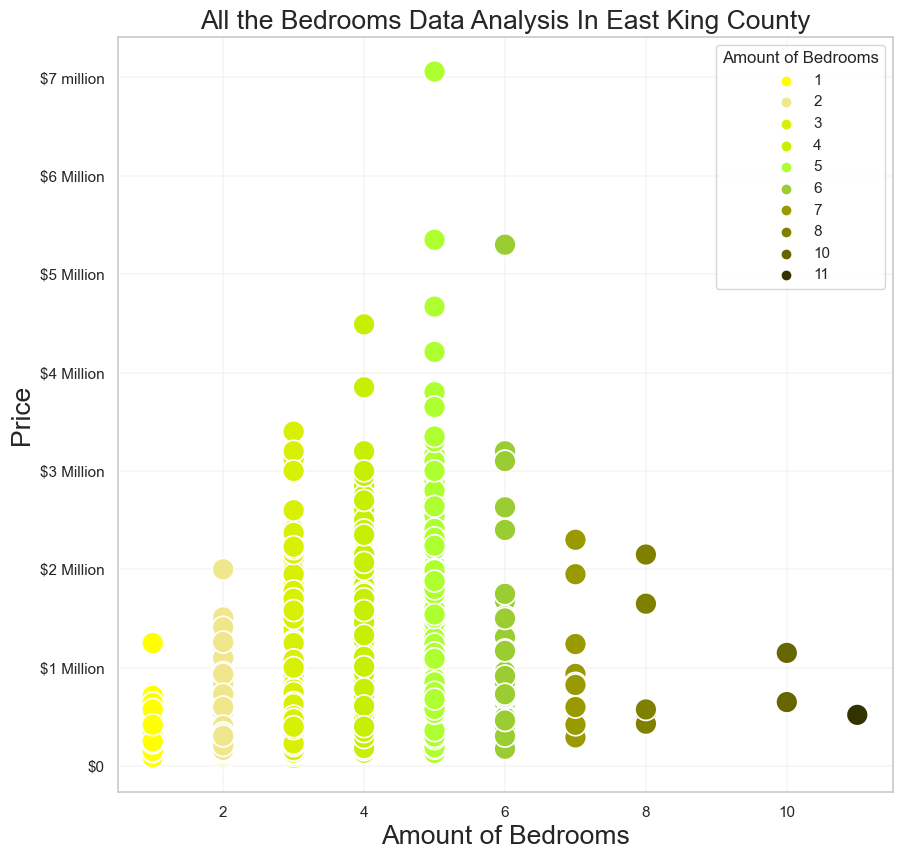

In [59]:
x = regressiondata1['Amount_of_Bedrooms']
y = regressiondata1['Price']
sns.set(style='whitegrid')
flatui = ['#FFFF00','#F0E68C','#D8F003', '#C6F003','#ADFF2F',
          '#9ACD32','#999900','#808000','#666600','#333300']

plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
ax = sns.scatterplot(data=regressiondata1, x=x, y=y,s=250,hue='Amount_of_Bedrooms',palette=flatui)
plt.grid(linestyle='-', linewidth=0.2)
ax.set_title('All the Bedrooms Data Analysis In East King County',size=19)
plt.xlabel("Amount of Bedrooms", size=19)
plt.ylabel("Price", size=19)
plt.legend(title='Amount of Bedrooms')
plt.gcf().set_size_inches((10,10))
ax.set_yticklabels(['0','$0','$1 Million','$2 Million','$3 Million','$4 Million','$5 Million',
                    '$6 Million','$7 million'])
plt.show()

In [60]:
train_df, test_df = train_test_split(regressiondata1, test_size=0.10, shuffle=False)

In [61]:
X_train, y_train = train_df[['Amount_of_Bedrooms']], train_df[['Price']]
X_test, y_test = test_df[['Amount_of_Bedrooms']], test_df[['Price']]

In [62]:
classifiers = {}
for tau in [0.1, 0.5, 0.9]:
    clf = LGBMRegressor(objective='quantile', alpha=tau)
    clf.fit(X_train, y_train)
    preds = pd.DataFrame(clf.predict(X_test), columns = [str(tau)])
    classifiers[str(tau)] = {'clf': clf, 'predictions': preds}

In [63]:
Quantile_regression = pd.DataFrame({'Amount_of_Bedrooms': X_test.reset_index()['Amount_of_Bedrooms'],
              '0.1': classifiers['0.1']['predictions']['0.1'],
              '0.5': classifiers['0.5']['predictions']['0.5'],
              '0.9': classifiers['0.9']['predictions']['0.9'],
              'Price': y_test.reset_index()['Price']})

In [64]:
Quantile_regression[800:]

Amount_of_Bedrooms            0.1            0.5           0.9      Price
800                   1  210001.859351  356003.957648  6.335081e+05   267000.0
801                   1  210001.859351  356003.957648  6.335081e+05   250000.0
802                   1  210001.859351  356003.957648  6.335081e+05   295000.0
803                   1  210001.859351  356003.957648  6.335081e+05   575000.0
804                   1  210001.859351  356003.957648  6.335081e+05   415000.0
805                   1  210001.859351  356003.957648  6.335081e+05   199900.0
806                   1  210001.859351  356003.957648  6.335081e+05   152275.0
807                   1  210001.859351  356003.957648  6.335081e+05   385000.0
808                   1  210001.859351  356003.957648  6.335081e+05   375000.0
809                   1  210001.859351  356003.957648  6.335081e+05   235000.0
810                   1  210001.859351  356003.957648  6.335081e+05   353000.0
811                   1  210001.859351  356003.957648  6.335081e+05   250000.0
812                   1  210001.859351  356003.957648  6.335081e+05   420000.0
813                   7  351398.135612  749992.492484  1.607982e+06  1950000.0
814                   7  351398.135612  749992.492484  1.607982e+06   350000.0
815                   7  351398.135612  749992.492484  1.607982e+06   884900.0
816                   7  351398.135612  749992.492484  1.607982e+06   600000.0
817                   7  351398.135612  749992.492484  1.607982e+06   450000.0
818                   7  351398.135612  749992.492484  1.607982e+06   310000.0
819                   7  351398.135612  749992.492484  1.607982e+06   936000.0
820                   7  351398.135612  749992.492484  1.607982e+06   291000.0
821                   7  351398.135612  749992.492484  1.607982e+06   419000.0
822                   7  351398.135612  749992.492484  1.607982e+06   599000.0
823                   7  351398.135612  749992.492484  1.607982e+06  2300000.0
824                   7  351398.135612  749992.492484  1.607982e+06   840000.0
825                   7  351398.135612  749992.492484  1.607982e+06  1240000.0
826                   7  351398.135612  749992.492484  1.607982e+06   824000.0
827                   8  351398.135612  749992.492484  1.607982e+06   490000.0
828                   8  351398.135612  749992.492484  1.607982e+06  2150000.0
829                   8  351398.135612  749992.492484  1.607982e+06  1650000.0
830                   8  351398.135612  749992.492484  1.607982e+06   430000.0
831                   8  351398.135612  749992.492484  1.607982e+06   575000.0
832                  10  351398.135612  749992.492484  1.607982e+06  1150000.0
833                  10  351398.135612  749992.492484  1.607982e+06   650000.0
834                  11  351398.135612  749992.492484  1.607982e+06   520000.0

In [65]:
melted_data = pd.melt(Quantile_regression, id_vars=['Amount_of_Bedrooms'])
melted_data = melted_data.dropna()
melted_data = melted_data.drop(range(2505,3340))

In [66]:
melted_data

Amount_of_Bedrooms variable         value
0                      5      0.1  3.513981e+05
1                      5      0.1  3.513981e+05
2                      5      0.1  3.513981e+05
3                      5      0.1  3.513981e+05
4                      5      0.1  3.513981e+05
...                  ...      ...           ...
2500                   8      0.9  1.607982e+06
2501                   8      0.9  1.607982e+06
2502                  10      0.9  1.607982e+06
2503                  10      0.9  1.607982e+06
2504                  11      0.9  1.607982e+06

[2505 rows x 3 columns]

In [67]:
Quantileregression_updated = pd.DataFrame({'Amount_of_Bedrooms':[1,2,3,4,5,6,7,8,9,10,11],
    '0.1':[210001.859351,210001.859351,210001.859351,351398.135612,351398.135612,351398.135612,
          351398.135612,351398.135612,351398.135612,351398.135612,351398.135612],
'0.5':[356003.957648,356003.957648,356003.957648,749992.492484,749992.492484,749992.492484,
      749992.492484,749992.492484,749992.492484,749992.492484,749992.492484],
'0.9':[6.335081e+05,6.335081e+05,6.335081e+05,1.607982e+06,1.607982e+06,1.607982e+06,1.607982e+06,
      1.607982e+06,1.607982e+06,1.607982e+06,1.607982e+06]})
Quantileregression_updated

Amount_of_Bedrooms            0.1            0.5        0.9
0                    1  210001.859351  356003.957648   633508.1
1                    2  210001.859351  356003.957648   633508.1
2                    3  210001.859351  356003.957648   633508.1
3                    4  351398.135612  749992.492484  1607982.0
4                    5  351398.135612  749992.492484  1607982.0
5                    6  351398.135612  749992.492484  1607982.0
6                    7  351398.135612  749992.492484  1607982.0
7                    8  351398.135612  749992.492484  1607982.0
8                    9  351398.135612  749992.492484  1607982.0
9                   10  351398.135612  749992.492484  1607982.0
10                  11  351398.135612  749992.492484  1607982.0

In [68]:
melted_data = pd.melt(Quantileregression_updated, id_vars=['Amount_of_Bedrooms'])
melted_data = melted_data.dropna()
melted_data = melted_data.rename(columns={'variable': 'Percentile'})
melted_data

Amount_of_Bedrooms Percentile         value
0                    1        0.1  2.100019e+05
1                    2        0.1  2.100019e+05
2                    3        0.1  2.100019e+05
3                    4        0.1  3.513981e+05
4                    5        0.1  3.513981e+05
5                    6        0.1  3.513981e+05
6                    7        0.1  3.513981e+05
7                    8        0.1  3.513981e+05
8                    9        0.1  3.513981e+05
9                   10        0.1  3.513981e+05
10                  11        0.1  3.513981e+05
11                   1        0.5  3.560040e+05
12                   2        0.5  3.560040e+05
13                   3        0.5  3.560040e+05
14                   4        0.5  7.499925e+05
15                   5        0.5  7.499925e+05
16                   6        0.5  7.499925e+05
17                   7        0.5  7.499925e+05
18                   8        0.5  7.499925e+05
19                   9        0.5  7.499925e+05
20                  10        0.5  7.499925e+05
21                  11        0.5  7.499925e+05
22                   1        0.9  6.335081e+05
23                   2        0.9  6.335081e+05
24                   3        0.9  6.335081e+05
25                   4        0.9  1.607982e+06
26                   5        0.9  1.607982e+06
27                   6        0.9  1.607982e+06
28                   7        0.9  1.607982e+06
29                   8        0.9  1.607982e+06
30                   9        0.9  1.607982e+06
31                  10        0.9  1.607982e+06
32                  11        0.9  1.607982e+06

<ipython-input-69-74d7ebb01894>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$200,000','$400,000','$600,000','$800,000','$1 Million',


[Text(0, 0.0, '0'),
 Text(0, 200000.0, '$200,000'),
 Text(0, 400000.0, '$400,000'),
 Text(0, 600000.0, '$600,000'),
 Text(0, 800000.0, '$800,000'),
 Text(0, 1000000.0, '$1 Million'),
 Text(0, 1200000.0, '$1.2 Million'),
 Text(0, 1400000.0, '$1.4 Million'),
 Text(0, 1600000.0, '$1.6 Million'),
 Text(0, 1800000.0, '')]

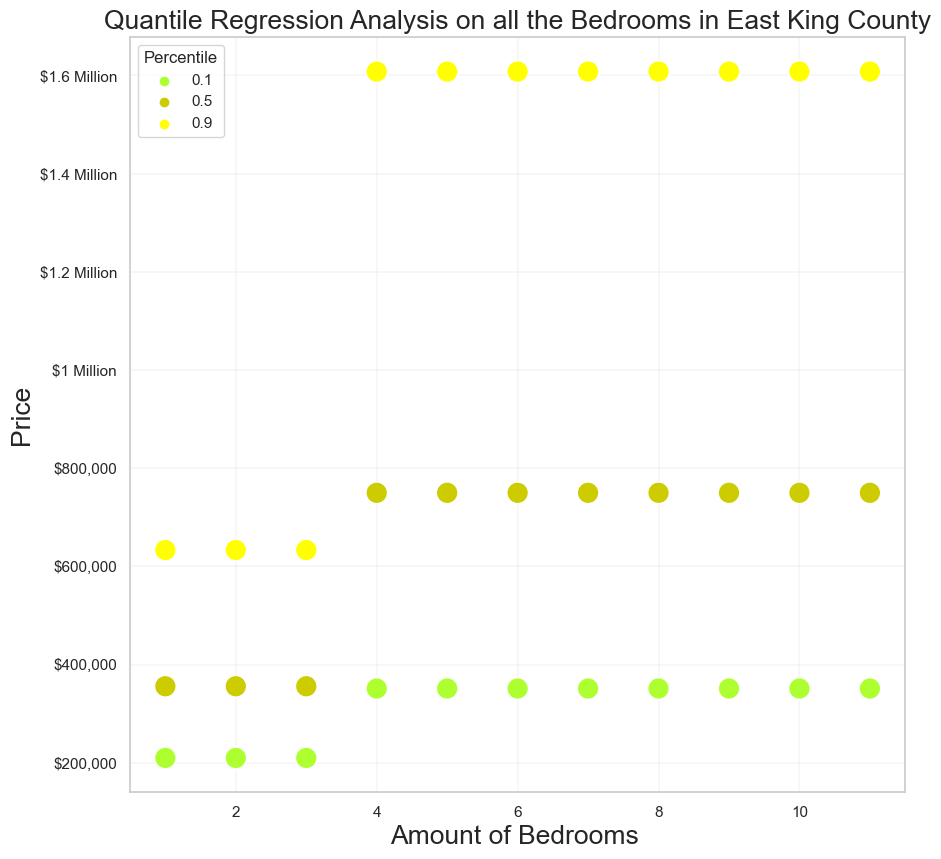

In [69]:
plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
flatui = ["#ADFF2F","#CCCC00","#FFFF00"]
ax = sns.scatterplot(data=melted_data, x="Amount_of_Bedrooms", 
                     y='value',s=250,hue='Percentile',palette=flatui)
plt.grid(linestyle='-', linewidth=0.2)
ylabel = plt.ylabel("Price")
sns.set(style='whitegrid')
xlabel = plt.xlabel("Amount of Bedrooms")
plt.gcf().set_size_inches((10,10))
ax.set_title('Quantile Regression Analysis on all the Bedrooms in East King County',size=19)
plt.xlabel("Amount of Bedrooms ", size=19)
plt.ylabel("Price", size=19)
ax.set_yticklabels(['0','$200,000','$400,000','$600,000','$800,000','$1 Million',
'$1.2 Million','$1.4 Million','$1.6 Million'])

<ipython-input-71-4d55de30c2c1>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$200,000','$400,000','$600,000','$800,000','$1 Million',


[Text(0, 0.0, '0'),
 Text(0, 200000.0, '$200,000'),
 Text(0, 400000.0, '$400,000'),
 Text(0, 600000.0, '$600,000'),
 Text(0, 800000.0, '$800,000'),
 Text(0, 1000000.0, '$1 Million'),
 Text(0, 1200000.0, '$1.2 Million'),
 Text(0, 1400000.0, '$1.4 Million'),
 Text(0, 1600000.0, '$1.6 Million'),
 Text(0, 1800000.0, '')]

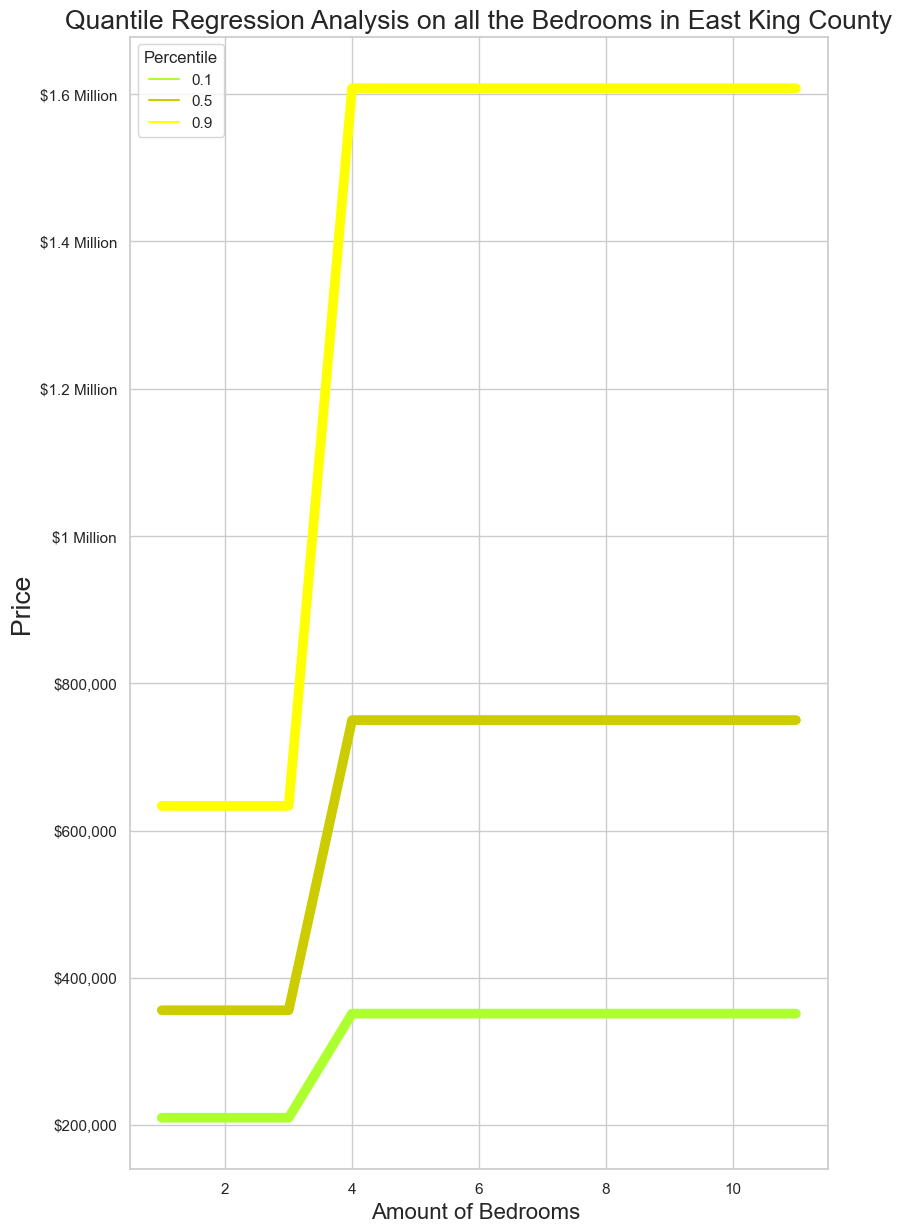

In [71]:
sns.set_style("whitegrid")
flatui = ["#ADFF2F","#CCCC00","#FFFF00"]
ax=sns.lineplot( data=melted_data, x="Amount_of_Bedrooms",y="value",
                linewidth = 7,palette=flatui,hue='Percentile')
plt.gcf().set_size_inches((10,10))
plt.gcf().set_size_inches(9, 15)
plt.legend(title='Percentile')
ax.set_title('Quantile Regression Analysis on all the Bedrooms in East King County',size=19)
plt.xlabel("Amount of Bedrooms ", size=16)
plt.ylabel("Price", size=19)
ax.set_yticklabels(['0','$200,000','$400,000','$600,000','$800,000','$1 Million',
'$1.2 Million','$1.4 Million','$1.6 Million'])

In [72]:
(Quantile_regression['Price'] > Quantile_regression['0.1']).value_counts()

True     750
False     85
dtype: int64

In [73]:
i = 0
y= 0
x = []
while i < 750:
    x.append('How Many Times The Prediction Was Right')
    i+=1
while y < 85:
    x.append('How Many Times The Prediction Was Wrong')
    y+=1
len(x)
df1 = pd.DataFrame({'Prediction Accuracy':x})

In [74]:
(Quantile_regression['Price'] > Quantile_regression['0.5']).value_counts()

False    476
True     359
dtype: int64

In [75]:
i = 0
y= 0
x = []
while i < 476:
    x.append('How Many Times The Predictionwas Was Right')
    i+=1
while y < 359:
    x.append('How Many Times The Predictionwas Was Wrong')
    y+=1
len(x)
df2 = pd.DataFrame({'Prediction Accuracy':x})

In [76]:
(Quantile_regression['Price'] > Quantile_regression['0.9']).value_counts()

False    763
True      72
dtype: int64

In [77]:
i = 0
y= 0
x = []
while i < 763:
    x.append('How Many Times The Predictionwas Was Right')
    i+=1
while y < 72:
    x.append('How Many Times The Predictionwas Was Wrong')
    y+=1
len(x)
df3 = pd.DataFrame({'Prediction Accuracy':x})

Text(0, 0.5, 'Count')

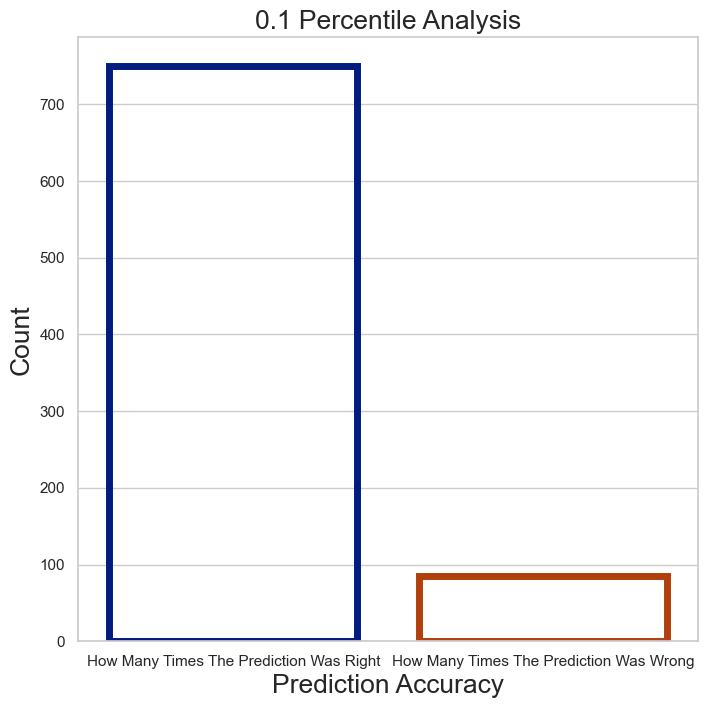

In [78]:
sns.set_style("whitegrid")
plt.gcf().set_size_inches((8,8))
ax = sns.countplot(x="Prediction Accuracy", data=df1,
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))
ax.set_title('0.1 Percentile Analysis',size=19)
plt.xlabel("Prediction Accuracy", size=19)
plt.ylabel("Count", size=19)

Text(0, 0.5, 'Count')

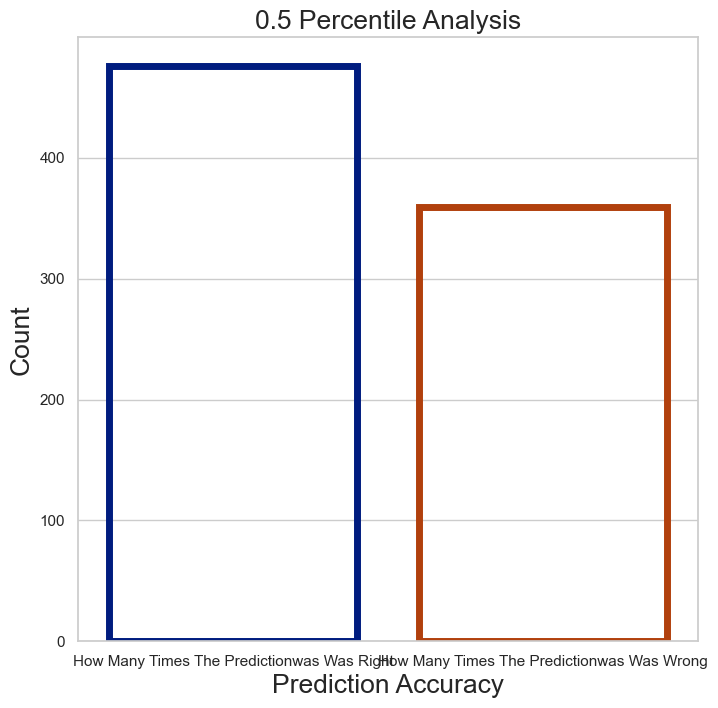

In [79]:
sns.set_style("whitegrid")
plt.gcf().set_size_inches((8,8))
ax = sns.countplot(x="Prediction Accuracy", data=df2,
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))
ax.set_title('0.5 Percentile Analysis',size=19)
plt.xlabel("Prediction Accuracy", size=19)
plt.ylabel("Count", size=19)

Text(0, 0.5, 'Count')

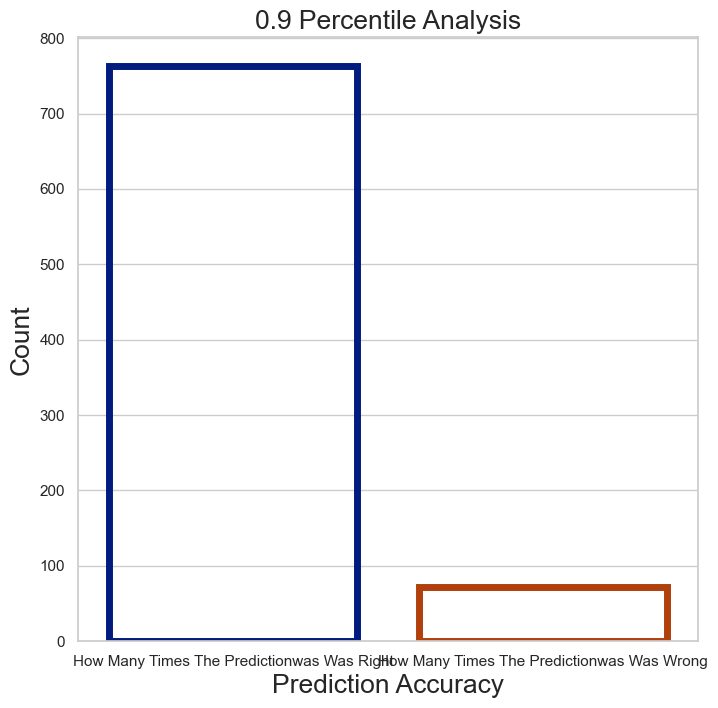

In [80]:
sns.set_style("whitegrid")
plt.gcf().set_size_inches((8,8))
ax = sns.countplot(x="Prediction Accuracy", data=df3,
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))
ax.set_title('0.9 Percentile Analysis',size=19)
plt.xlabel("Prediction Accuracy", size=19)
plt.ylabel("Count", size=19)

In [83]:
%store -r index2

In [84]:
bedrooms = []
for i in index2:
    bedrooms.append(raw_info.bedrooms[i])
len(bedrooms)

8349

In [256]:
Predictions = []
for i in bedrooms:
    if i == 1:Predictions.append('$210,001 - $633,508')
    if i == 2: Predictions.append('$210,001  - $633,508')
    if i == 3:Predictions.append('$210,001  - $633,508')
    if i == 4:Predictions.append('$351,398 - $1,607,982') 
    if i == 5:Predictions.append('$351,398 - $1,607,982')
    if i == 6:Predictions.append('$351,398 - $1,607,982')
    if i == 7:Predictions.append('$351,398 - $1,607,982')
    if i == 8:Predictions.append('$351,398 - $1,607,982')
    if i == 9:Predictions.append('$351,398 - $1,607,982')
    if i == 10:Predictions.append('$351,398 - $1,607,982')
    if i == 11:Predictions.append('$351,398 - $1,607,982')
len(Predictions)

8349

In [86]:
price = []
for i in index2:
    price.append(raw_info.price[i])
len(price)

8349

In [87]:
price1 = []
for i in price:
    price1.append("${:,.0f}".format(i))

In [88]:
Prediction = pd.DataFrame({'Amount of Bedrooms':bedrooms,
                           'Prediction':Predictions,'Actual Price':price1})
Prediction

Amount of Bedrooms             Prediction Actual Price
0                      3   $210,001  - $633,508     $221,900
1                      4  $351,398 - $1,607,982     $604,000
2                      3   $210,001  - $633,508     $229,500
3                      4  $351,398 - $1,607,982     $650,000
4                      3   $210,001  - $633,508     $395,000
...                  ...                    ...          ...
8344                   4  $351,398 - $1,607,982     $610,685
8345                   4  $351,398 - $1,607,982   $1,010,000
8346                   3   $210,001  - $633,508     $475,000
8347                   4  $351,398 - $1,607,982     $400,000
8348                   3   $210,001  - $633,508     $400,000

[8349 rows x 3 columns]

In [140]:
regressiondata1

Amount_of_Bedrooms      Price
0                      3   221900.0
1                      3   229500.0
2                      3   395000.0
3                      3  2000000.0
4                      3   937000.0
...                  ...        ...
8344                   8   430000.0
8345                   8   575000.0
8346                  10  1150000.0
8347                  10   650000.0
8348                  11   520000.0

[8349 rows x 2 columns]

In [209]:
def WEIGHTED_AVERAGE(AMOUNT,TYPE,PRICE):
    no_of_items = []
    for x,i in enumerate(TYPE):
             if i == AMOUNT:no_of_items.append(PRICE[x])


    frequency = collections.Counter(no_of_items)

    coefficient_weights = []
    for i in frequency:
        coefficient_weights.append((frequency[i]/21597)*100)

    sum_of_memeber_weights = []
    for i in frequency:
        sum_of_memeber_weights.append(i*((frequency[i]/21597)*100))

    sum_of_memeber_weights = sum(sum_of_memeber_weights)

    coefficient_weights = sum(coefficient_weights)

    final_no = sum_of_memeber_weights/coefficient_weights
    return(final_no)

In [257]:
count =  collections.Counter(bedrooms)
for i in count:print(i,WEIGHTED_AVERAGE(i,regressiondata1.Amount_of_Bedrooms,regressiondata1.Price))

3 522941.6184580589
4 724117.7590664013
5 883041.1352074994
2 398709.74496644386
6 847272.3391304356
7 856707.1428571426
1 318391.93975903664
8 1059000.0
11 520000.00000000006
10 900000.0


In [213]:
WEIGHTED_AVERAGE(4,regressiondata1.Amount_of_Bedrooms,regressiondata1.Price)

724117.7590664013

In [214]:
WEIGHTED_AVERAGE(5,regressiondata1.Amount_of_Bedrooms,regressiondata1.Price)

883041.1352074994

In [215]:
WEIGHTED_AVERAGE(6,regressiondata1.Amount_of_Bedrooms,regressiondata1.Price)

847272.3391304356

In [216]:
WEIGHTED_AVERAGE(7,regressiondata1.Amount_of_Bedrooms,regressiondata1.Price)

856707.1428571426

In [217]:
WEIGHTED_AVERAGE(8,regressiondata1.Amount_of_Bedrooms,regressiondata1.Price)

1059000.0

In [218]:
WEIGHTED_AVERAGE(10,regressiondata1.Amount_of_Bedrooms,regressiondata1.Price)

900000.0

In [219]:
WEIGHTED_AVERAGE(11,regressiondata1.Amount_of_Bedrooms,regressiondata1.Price)

520000.00000000006

In [89]:
%store Prediction

Stored 'Prediction' (DataFrame)


In [222]:
def AMOUNT_BATHROOMS(AMOUNT_BATHROOM):
    locations = house_info['Location'].tolist()
    locationzip =raw_info.zipcode
    amount_bed = house_info["Bathrooms"].tolist()
    X_value = []
    bathroom_index = []
    
    index = []
    for i,x in enumerate(raw_info.lat):
        if x == 47.618:index.append(i)
        if x == 47.528:index.append(i)
        if x == 47.502:index.append(i)  
        if x == 47.530:index.append(i)
        if x == 47.567:index.append(i)
        if x == 47.733:index.append(i)   
        if x == 47.648:index.append(i)
    
    #zip_loca = []
    #for i in index:zip_loca.append(locationzip[i])
        
    for i,x in enumerate(amount_bed):
        if x == AMOUNT_BATHROOM:bathroom_index.append(i)

    for i in bathroom_index:
        if locations[i] == zip_loca[0] : X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == zip_loca[1]: X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == zip_loca[2] : X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == zip_loca[3] : X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == zip_loca[4] : X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == zip_loca[5]: X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == zip_loca[6] : X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == zip_loca[7]: X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == zip_loca[8] : X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == zip_loca[9]: X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == zip_loca[10] : X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == zip_loca[11] : X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == zip_loca[12] : X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == zip_loca[13]: X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == zip_loca[14] : X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == zip_loca[15]: X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == zip_loca[16] : X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == zip_loca[17]: X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == zip_loca[18] : X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == zip_loca[19] : X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == zip_loca[20] : X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == zip_loca[21]: X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == zip_loca[22] : X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == zip_loca[23]: X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == zip_loca[24] : X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == zip_loca[25] : X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == zip_loca[26]: X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == zip_loca[27] : X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == zip_loca[28]: X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == zip_loca[29] : X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == zip_loca[30]: X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == zip_loca[31] : X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == zip_loca[32] : X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == zip_loca[33] : X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == zip_loca[34]: X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == zip_loca[35] : X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == zip_loca[36]: X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == zip_loca[37] : X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == zip_loca[38] : X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == zip_loca[39] : X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == zip_loca[40]: X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == zip_loca[41] : X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == zip_loca[42]: X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == zip_loca[43] : X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == zip_loca[44]: X_value.append(AMOUNT_BATHROOM)
        elif locations[i] == zip_loca[45] : X_value.append(AMOUNT_BATHROOM)
    return X_value
no_of_bathrooms = house_info["Bathrooms"].value_counts().index.tolist()
amount_bathrooms_eastking = []
for i in no_of_bathrooms:
    amount_bathrooms_eastking.append(AMOUNT_BATHROOMS(i))
amount_bathrooms_eastking= sum(amount_bathrooms_eastking, [])
len(amount_bathrooms_eastking)

8349

In [223]:
def PRICE_BATHROOM(AMOUNT_BATHROOM):
    
    locations = house_info['Location'].tolist()
    locationzip =raw_info.zipcode
    amount_bath = house_info["Bathrooms"].tolist()

    
    index = []
    for i,x in enumerate(raw_info.lat):
        if x == 47.618:index.append(i)
        if x == 47.528:index.append(i)
        if x == 47.502:index.append(i)  
        if x == 47.530:index.append(i)
        if x == 47.567:index.append(i)
        if x == 47.733:index.append(i)   
        if x == 47.648:index.append(i)
            
    
        
    bathroom_index = []
    for i,x in enumerate(amount_bath):
        if x == AMOUNT_BATHROOM:bathroom_index.append(i)
    len(bathroom_index)

    bathroom_eastking = []
    for i in bathroom_index:
        if locations[i] == zip_loca[0] : bathroom_eastking.append(i)
        elif locations[i] == zip_loca[1] : bathroom_eastking.append(i)
        elif locations[i] == zip_loca[2] : bathroom_eastking.append(i)
        elif locations[i] == zip_loca[3] : bathroom_eastking.append(i)
        elif locations[i] == zip_loca[4]: bathroom_eastking.append(i)
        elif locations[i] == zip_loca[5] : bathroom_eastking.append(i)
        elif locations[i] == zip_loca[6] : bathroom_eastking.append(i)
        elif locations[i] == zip_loca[7]: bathroom_eastking.append(i)
        elif locations[i] == zip_loca[8] : bathroom_eastking.append(i)
        elif locations[i] == zip_loca[9] : bathroom_eastking.append(i)
        elif locations[i] == zip_loca[10] : bathroom_eastking.append(i)
        elif locations[i] == zip_loca[11] : bathroom_eastking.append(i)
        elif locations[i] == zip_loca[12]: bathroom_eastking.append(i)
        elif locations[i] == zip_loca[13] : bathroom_eastking.append(i)
        elif locations[i] == zip_loca[14] : bathroom_eastking.append(i)
        elif locations[i] == zip_loca[15] : bathroom_eastking.append(i)
        elif locations[i] == zip_loca[16]: bathroom_eastking.append(i)
        elif locations[i] == zip_loca[17] : bathroom_eastking.append(i)
        elif locations[i] == zip_loca[18]: bathroom_eastking.append(i)
        elif locations[i] == zip_loca[19] : bathroom_eastking.append(i)
        elif locations[i] == zip_loca[20]: bathroom_eastking.append(i)
        elif locations[i] == zip_loca[21] : bathroom_eastking.append(i)
        elif locations[i] == zip_loca[22] : bathroom_eastking.append(i)
        elif locations[i] == zip_loca[23] : bathroom_eastking.append(i)
        elif locations[i] == zip_loca[24] : bathroom_eastking.append(i)
        elif locations[i] == zip_loca[25] : bathroom_eastking.append(i)
        elif locations[i] == zip_loca[26] : bathroom_eastking.append(i)
        elif locations[i] == zip_loca[27] : bathroom_eastking.append(i)
        elif locations[i] == zip_loca[28]: bathroom_eastking.append(i)
        elif locations[i] == zip_loca[29] : bathroom_eastking.append(i)
        elif locations[i] == zip_loca[30] : bathroom_eastking.append(i)
        elif locations[i] == zip_loca[31]: bathroom_eastking.append(i)
        elif locations[i] == zip_loca[32] : bathroom_eastking.append(i)
        elif locations[i] == zip_loca[33] : bathroom_eastking.append(i)
        elif locations[i] == zip_loca[34] : bathroom_eastking.append(i)
        elif locations[i] == zip_loca[35]: bathroom_eastking.append(i)
        elif locations[i] == zip_loca[36] : bathroom_eastking.append(i)
        elif locations[i] == zip_loca[37] : bathroom_eastking.append(i)
        elif locations[i] == zip_loca[38] : bathroom_eastking.append(i)
        elif locations[i] == zip_loca[39] : bathroom_eastking.append(i)
        elif locations[i] == zip_loca[40] : bathroom_eastking.append(i)
        elif locations[i] == zip_loca[41] : bathroom_eastking.append(i)
        elif locations[i] == zip_loca[42] : bathroom_eastking.append(i)
        elif locations[i] == zip_loca[43]: bathroom_eastking.append(i)
        elif locations[i] == zip_loca[44] : bathroom_eastking.append(i)
        elif locations[i] == zip_loca[45] : bathroom_eastking.append(i)
        
    price = house_info["Price"].tolist()

    price_eastking = []
    for i in bathroom_eastking:price_eastking.append(price[i])
    return(price_eastking)

no_of_bathrooms = house_info["Bathrooms"].value_counts().index.tolist()
price_bathroom_eastking = []
for i in no_of_bathrooms:
    price_bathroom_eastking.append(PRICE_BATHROOM(i))
price_bathroom_eastking = sum(price_bathroom_eastking, [])
len(price_bathroom_eastking)

8349

In [224]:
regressiondata2 = pd.DataFrame({'Amount_of_Bathrooms':amount_bathrooms_eastking,
                                'Price':price_bathroom_eastking})
k = regressiondata2.Amount_of_Bathrooms.value_counts()
len(k)

25

<ipython-input-225-0340d70c7268>:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$0','$1 Million','$2 Million','$3 Million','$4 Million',


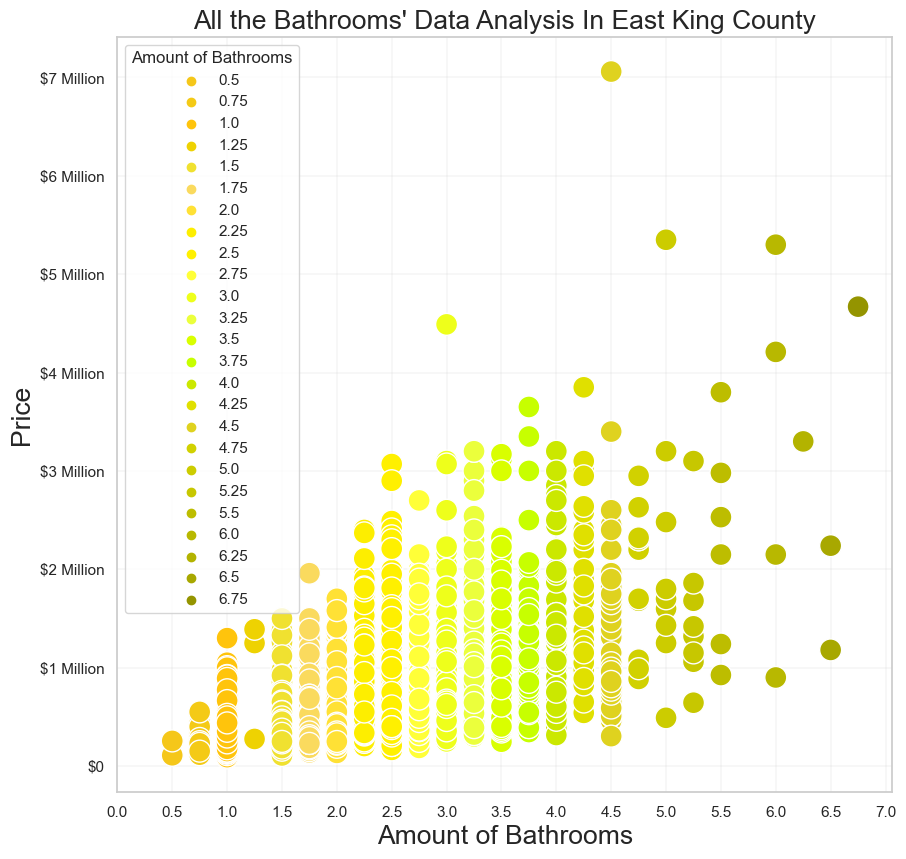

In [225]:
x = regressiondata2['Amount_of_Bathrooms']
y = regressiondata2['Price']
flatui = [
'#f5c71a', '#f4ca16','#ffc40c','#eed202','#f0e130',
'#fada5e','#ffe135','#fdee00','#fff000','#ffff38',
'#eeff1b','#ebff3c', '#d9ff00','#c7ff00','#cbe800',
'#e0e000','#dfd21f','#d1d100','#cccc00','#c7c700','#bdbd00',
'#b8b800','#b3b300','#a8a800','#949400']



plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
ax = sns.scatterplot(data=regressiondata2, x=x, y=y,s=250, linewidth = 1,
                     hue='Amount_of_Bathrooms',palette=flatui)
plt.grid(linestyle='-', linewidth=0.2)
ax.set_title('All the Bathrooms\' Data Analysis In East King County',size=19)
plt.xlabel("Amount of Bathrooms", size=19)
plt.legend(title='Amount of Bathrooms')
plt.ylabel("Price", size=19)
plt.xticks(np.arange(0,7.5,0.5))
ax.set_yticklabels(['0','$0','$1 Million','$2 Million','$3 Million','$4 Million',
                    '$5 Million', '$6 Million','$7 Million'])
plt.gcf().set_size_inches((10,10))
xticks=ax.xaxis.get_major_ticks()

plt.show()

In [226]:
train_df, test_df = train_test_split(regressiondata2, test_size=0.10, shuffle=False)

In [227]:
X_train, y_train = train_df[['Amount_of_Bathrooms']], train_df[['Price']]
X_test, y_test = test_df[['Amount_of_Bathrooms']], test_df[['Price']]

In [228]:
classifiers = {}
for tau in [0.1, 0.5, 0.9]:
    clf = LGBMRegressor(objective='quantile', alpha=tau)
    clf.fit(X_train, y_train)
    preds = pd.DataFrame(clf.predict(X_test), columns = [str(tau)])
    classifiers[str(tau)] = {'clf': clf, 'predictions': preds}

In [229]:
Quantile_regression1 = pd.DataFrame({'Amount_of_Bathrooms': X_test.reset_index()['Amount_of_Bathrooms'],
              '0.1': classifiers['0.1']['predictions']['0.1'],
              '0.5': classifiers['0.5']['predictions']['0.5'],
              '0.9': classifiers['0.9']['predictions']['0.9'],
              'Price': y_test.reset_index()['Price']})

In [230]:
Quantile_regression1

Amount_of_Bathrooms            0.1            0.5           0.9  \
0                   3.50  536188.282156  854990.305089  1.612980e+06   
1                   3.50  536188.282156  854990.305089  1.612980e+06   
2                   3.50  536188.282156  854990.305089  1.612980e+06   
3                   3.50  536188.282156  854990.305089  1.612980e+06   
4                   3.50  536188.282156  854990.305089  1.612980e+06   
..                   ...            ...            ...           ...   
830                 0.50  200002.046717  325004.382631  5.500085e+05   
831                 6.25  536188.282156  854990.305089  1.612980e+06   
832                 6.75  536188.282156  854990.305089  1.612980e+06   
833                 6.50  536188.282156  854990.305089  1.612980e+06   
834                 6.50  536188.282156  854990.305089  1.612980e+06   

         Price  
0    1610000.0  
1    1700000.0  
2    1040000.0  
3     935000.0  
4    3170000.0  
..         ...  
830   255000.0  
831  3300000.0  
832  4670000.0  
833  1180000.0  
834  2240000.0  

[835 rows x 5 columns]

In [231]:
Quantileregression_updated = pd.DataFrame({'Amount_of_Bathrooms':[0.50,0.25,0.75,1.0,1.25,1.5,
                                                                  1.75,2.0,2.5,2.25,2.75,
                                                                  
                                                                  3.0,3.25,3.5,3.75,4.0,
                                                                  4.25,4.5,4.75,5.0,5.25,5.5,5.75,
                                                                  6.0,6.25,6.5,7.0],
    '0.1':[200002.046717,200002.046717,200002.046717,200002.046717,200002.046717,200002.046717,
          200002.046717,200002.046717,200002.046717,200002.046717,200002.046717,
           
        536188.282156,536188.282156,536188.282156,536188.282156,536188.282156,536188.282156,
        536188.282156,536188.282156,536188.282156,536188.282156,536188.282156,536188.282156,
        536188.282156,536188.282156,536188.282156,536188.282156],
                                           
 '0.5':[325004.382631,325004.382631,325004.382631,325004.382631,325004.382631,325004.382631,
       325004.382631,325004.382631,325004.382631,325004.382631,325004.382631,
       
       854990.305089,854990.305089,854990.305089,854990.305089,854990.305089,854990.305089,
       854990.305089,854990.305089,854990.305089,854990.305089,854990.305089,854990.305089,
      854990.305089,854990.305089,854990.305089,854990.305089],
   
    '0.9':[5.500085e+05,5.500085e+05,5.500085e+05,5.500085e+05,5.500085e+05,5.500085e+05,
         5.500085e+05,5.500085e+05,5.500085e+05,5.500085e+05,5.500085e+05,
          
          1.612980e+06,1.612980e+06,1.612980e+06,1.612980e+06,1.612980e+06,1.612980e+06,
          1.612980e+06,1.612980e+06,1.612980e+06,1.612980e+06,1.612980e+06,1.612980e+06,
          1.612980e+06,1.612980e+06,1.612980e+06,1.612980e+06]})
Quantileregression_updated

Amount_of_Bathrooms            0.1            0.5        0.9
0                  0.50  200002.046717  325004.382631   550008.5
1                  0.25  200002.046717  325004.382631   550008.5
2                  0.75  200002.046717  325004.382631   550008.5
3                  1.00  200002.046717  325004.382631   550008.5
4                  1.25  200002.046717  325004.382631   550008.5
5                  1.50  200002.046717  325004.382631   550008.5
6                  1.75  200002.046717  325004.382631   550008.5
7                  2.00  200002.046717  325004.382631   550008.5
8                  2.50  200002.046717  325004.382631   550008.5
9                  2.25  200002.046717  325004.382631   550008.5
10                 2.75  200002.046717  325004.382631   550008.5
11                 3.00  536188.282156  854990.305089  1612980.0
12                 3.25  536188.282156  854990.305089  1612980.0
13                 3.50  536188.282156  854990.305089  1612980.0
14                 3.75  536188.282156  854990.305089  1612980.0
15                 4.00  536188.282156  854990.305089  1612980.0
16                 4.25  536188.282156  854990.305089  1612980.0
17                 4.50  536188.282156  854990.305089  1612980.0
18                 4.75  536188.282156  854990.305089  1612980.0
19                 5.00  536188.282156  854990.305089  1612980.0
20                 5.25  536188.282156  854990.305089  1612980.0
21                 5.50  536188.282156  854990.305089  1612980.0
22                 5.75  536188.282156  854990.305089  1612980.0
23                 6.00  536188.282156  854990.305089  1612980.0
24                 6.25  536188.282156  854990.305089  1612980.0
25                 6.50  536188.282156  854990.305089  1612980.0
26                 7.00  536188.282156  854990.305089  1612980.0

In [232]:
melted_data = pd.melt(Quantileregression_updated, id_vars=['Amount_of_Bathrooms'])
melted_data = melted_data.dropna()
melted_data = melted_data.rename(columns={'variable': 'Percentile'})
melted_data

Amount_of_Bathrooms Percentile         value
0                  0.50        0.1  2.000020e+05
1                  0.25        0.1  2.000020e+05
2                  0.75        0.1  2.000020e+05
3                  1.00        0.1  2.000020e+05
4                  1.25        0.1  2.000020e+05
..                  ...        ...           ...
76                 5.75        0.9  1.612980e+06
77                 6.00        0.9  1.612980e+06
78                 6.25        0.9  1.612980e+06
79                 6.50        0.9  1.612980e+06
80                 7.00        0.9  1.612980e+06

[81 rows x 3 columns]

<ipython-input-233-9e94b322be01>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$200,000','$400,000','$600,000',


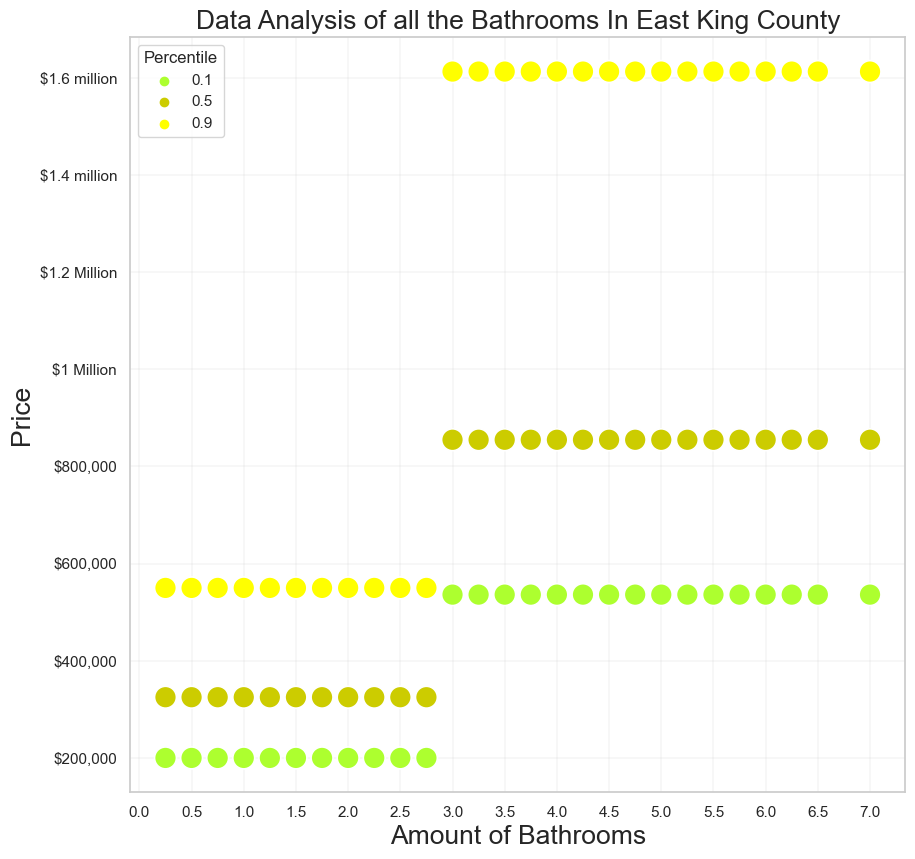

In [233]:
plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
flatui = ["#ADFF2F","#CCCC00","#FFFF00"]
ax =sns.scatterplot(data=melted_data, x="Amount_of_Bathrooms",palette=flatui,y='value',s=250,
                    hue='Percentile')
plt.xticks(np.arange(0,7.5,0.5))    
plt.grid(linestyle='-', linewidth=0.2)
ax.set_title('Data Analysis of all the Bathrooms In East King County',size=19)
plt.xlabel("Amount of Bathrooms", size=19)
plt.ylabel("Price", size=19)
ax.set_yticklabels(['0','$200,000','$400,000','$600,000',
         '$800,000','$1 Million', '$1.2 Million','$1.4 million','$1.6 million'])
ylabel = plt.ylabel("Price")
xlabel = plt.xlabel("Amount of Bathrooms")
plt.gcf().set_size_inches((10,10))

<ipython-input-234-7cac7862e204>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$200,000','$400,000','$600,000',


[Text(0, 0.0, '0'),
 Text(0, 200000.0, '$200,000'),
 Text(0, 400000.0, '$400,000'),
 Text(0, 600000.0, '$600,000'),
 Text(0, 800000.0, '$800,000'),
 Text(0, 1000000.0, '$1 Million'),
 Text(0, 1200000.0, '$1.2 Million'),
 Text(0, 1400000.0, '$1.4 million'),
 Text(0, 1600000.0, '$1.6 million'),
 Text(0, 1800000.0, '')]

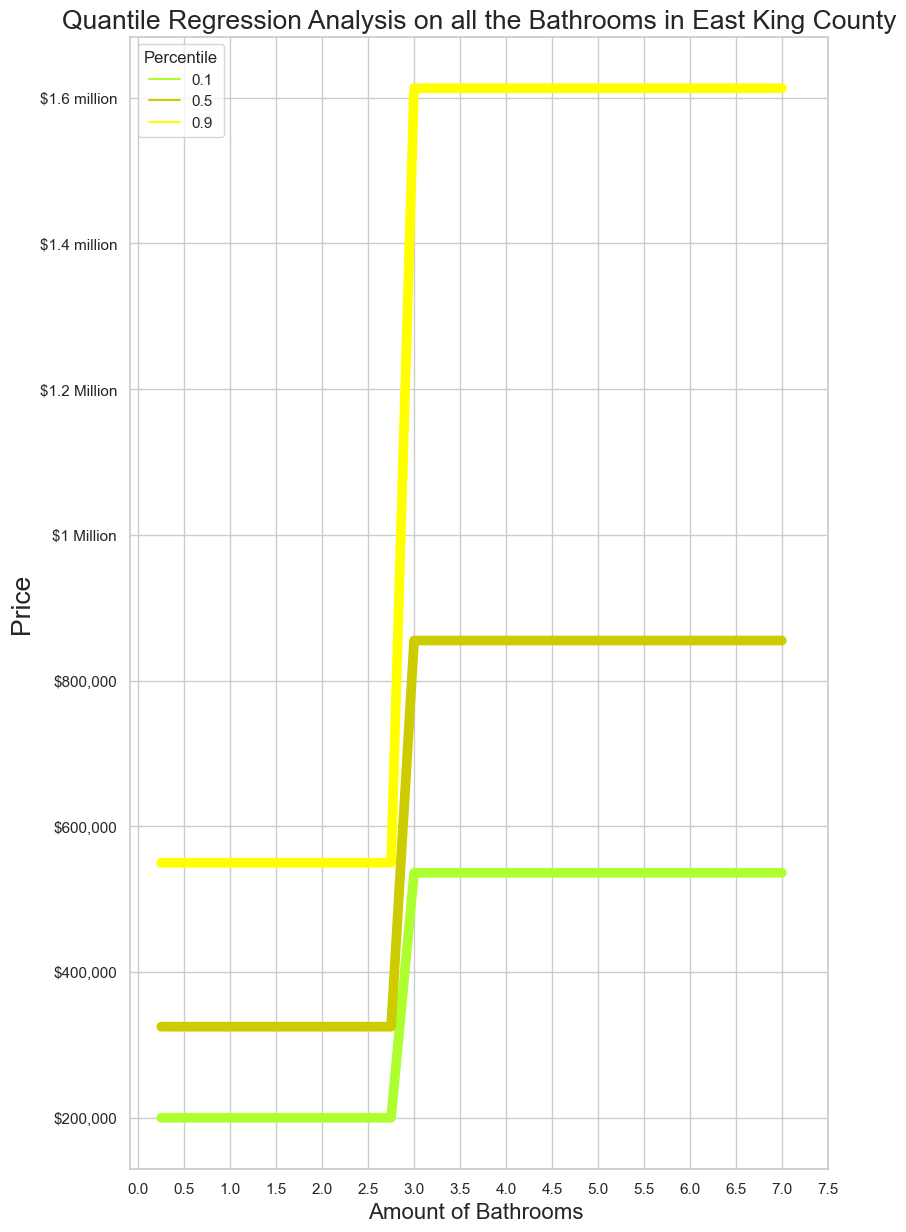

In [234]:
sns.set_style("whitegrid")
flatui = ["#ADFF2F","#CCCC00","#FFFF00"]
ax=sns.lineplot( data=melted_data, x="Amount_of_Bathrooms",y="value",
                linewidth = 7,palette=flatui,hue='Percentile')
plt.gcf().set_size_inches((10,10))
plt.xticks(np.arange(0,7.75,0.5))
plt.gcf().set_size_inches(9, 15)
plt.legend(title='Percentile')
ax.set_title('Quantile Regression Analysis on all the Bathrooms in East King County',size=19)
plt.xlabel("Amount of Bathrooms ", size=16)
plt.ylabel("Price", size=19)
ax.set_yticklabels(['0','$200,000','$400,000','$600,000',
         '$800,000','$1 Million', '$1.2 Million','$1.4 million','$1.6 million'])

In [203]:
(Quantile_regression1['Price'] > Quantile_regression1['0.1']).value_counts()

True     769
False     66
dtype: int64

In [204]:
i = 0
y= 0
x = []
while i < 769:
    x.append('How Many Times The Prediction Was Right')
    i+=1
while y < 66:
    x.append('How Many Times The Prediction Was Wrong')
    y+=1
len(x)
df1 = pd.DataFrame({'Prediction Accuracy':x})

Text(0, 0.5, 'Count')

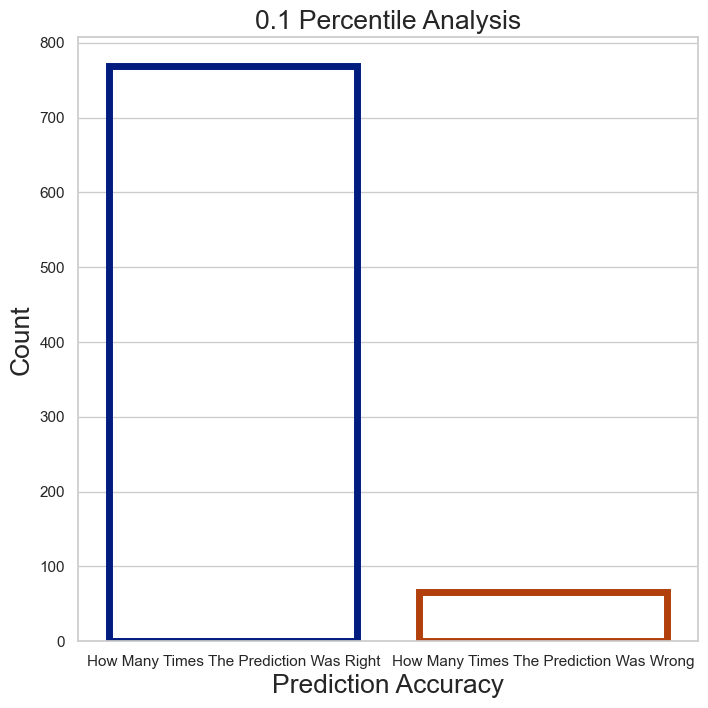

In [205]:
sns.set_style("whitegrid")
plt.gcf().set_size_inches((8,8))
ax = sns.countplot(x="Prediction Accuracy", data=df1,
                   palette=flatui,
                   #title = '0.1 Percentile Analysis',
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))
ax.set_title('0.1 Percentile Analysis',size=19)
plt.xlabel("Prediction Accuracy", size=19)
plt.ylabel("Count", size=19)

In [206]:
(Quantile_regression1['Price'] > Quantile_regression1['0.5']).value_counts()

True     541
False    294
dtype: int64

In [207]:
i = 0
y= 0
x = []
while i < 541:
    x.append('How Many Times The Prediction Was Right')
    i+=1
while y < 294:
    x.append('How Many Times The Prediction Was Wrong')
    y+=1
len(x)
df2 = pd.DataFrame({'Prediction Accuracy':x})

Text(0, 0.5, 'Count')

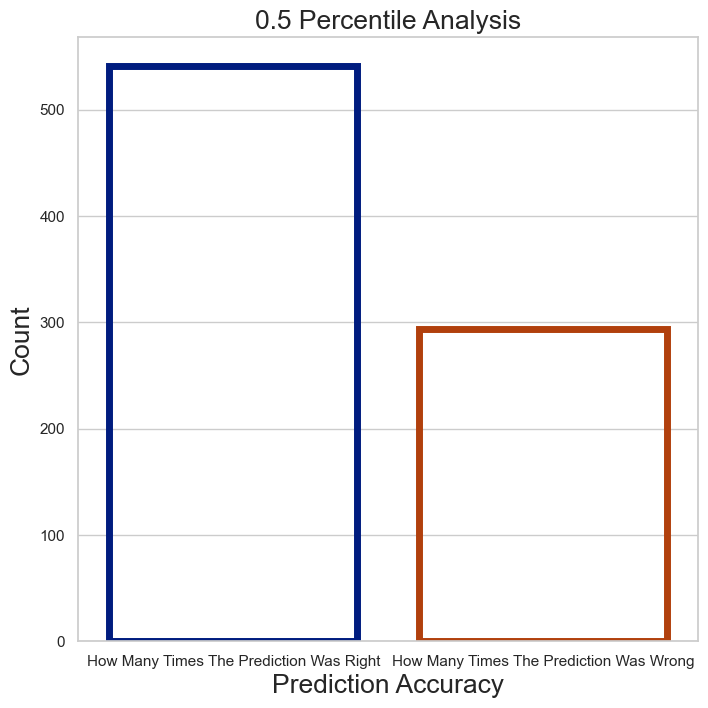

In [208]:
sns.set_style("whitegrid")
plt.gcf().set_size_inches((8,8))
ax = sns.countplot(x="Prediction Accuracy", data=df2,
                   palette=flatui,
                   #title = '0.1 Percentile Analysis',
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))
ax.set_title('0.5 Percentile Analysis',size=19)
plt.xlabel("Prediction Accuracy", size=19)
plt.ylabel("Count", size=19)

In [209]:
(Quantile_regression1['Price'] > Quantile_regression1['0.9']).value_counts()

False    669
True     166
dtype: int64

In [210]:
i = 0
y= 0
x = []
while i < 669:
    x.append('How Many Times The Prediction Was Right')
    i+=1
while y < 166:
    x.append('How Many Times The Prediction Was Wrong')
    y+=1
len(x)
df3 = pd.DataFrame({'Prediction Accuracy':x})

Text(0, 0.5, 'Count')

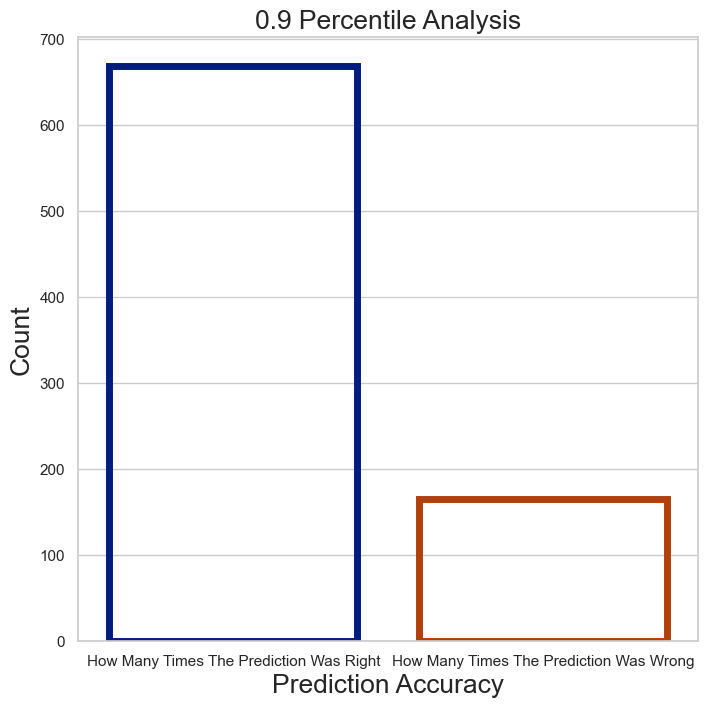

In [211]:
sns.set_style("whitegrid")
plt.gcf().set_size_inches((8,8))
ax = sns.countplot(x="Prediction Accuracy", data=df3,
                   palette=flatui,
                   #title = '0.1 Percentile Analysis',
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))
ax.set_title('0.9 Percentile Analysis',size=19)
plt.xlabel("Prediction Accuracy", size=19)
plt.ylabel("Count", size=19)

In [253]:
bathrooms = []
for i in index2:
    bathrooms.append(raw_info.bathrooms[i])
len(bathrooms)

8349

In [213]:
Predictions1 = []
for i in bathrooms:
    if i == 0:Predictions1.append('$200,002 - $550,008')
    if i == 0.5:Predictions1.append('$200,002 - $550,008')
    if i == 0.25:Predictions1.append('$200,002 - $550,008')
    if i == 0.75: Predictions1.append('$200,002 - $550,008')
    if i == 1.0:Predictions1.append('$200,002 - $550,008')
    if i == 1.25:Predictions1.append('$200,002 - $550,008')
    if i == 1.5:Predictions1.append('$200,002 - $550,008') 
    if i == 1.75:Predictions1.append('$200,002 - $550,008')
    if i == 2.0:Predictions1.append('$200,002 - $550,008')
    if i == 2.25:Predictions1.append('$200,002 - $550,008')
    if i == 2.5:Predictions1.append('$200,002 - $550,008') 
    if i == 2.75:Predictions1.append('$200,002 - $550,008')
    if i == 3.0: Predictions1.append('$536,188 - $1,612,980')
    if i == 3.25:Predictions1.append('$536,188 - $1,612,980')
    if i == 3.5:Predictions1.append('$536,188 - $1,612,980') 
    if i == 3.75:Predictions1.append('$536,188 - $1,612,980')
    if i == 4.0:Predictions1.append('$536,188 - $1,612,980')
    if i == 4.25:Predictions1.append('$536,188 - $1,612,980')
    if i == 4.5:Predictions1.append('$536,188 - $1,612,980')
    if i == 4.75: Predictions1.append('$536,188 - $1,612,980')
    if i == 5.0:Predictions1.append('$536,188 - $1,612,980')
    if i == 5.25:Predictions1.append('$536,188 - $1,612,980') 
    if i == 5.5:Predictions1.append('$536,188 - $1,612,980') 
    if i == 5.75:Predictions1.append('$536,188 - $1,612,980') 
    if i == 6.0:Predictions1.append('$536,188 - $1,612,980')
    if i == 6.25:Predictions1.append('$536,188 - $1,612,980')
    if i == 6.5:Predictions1.append('$536,188 - $1,612,980') 
    if i == 6.75:Predictions1.append('$200,002 - $550,008')
    if i == 7:Predictions1.append('$536,188 - $1,612,980')
    if i == 7.25:Predictions1.append('$536,188 - $1,612,980')
    if i == 7.5:Predictions1.append('$536,188 - $1,612,980') 
    if i == 7.75:Predictions1.append('$200,002 - $550,008')
len(Predictions1)

8349

In [214]:
Prediction1 = pd.DataFrame({'Amount of Bathrooms':bathrooms,
                           'Prediction':Predictions1,'Actual Price':price1})
Prediction1

Amount of Bathrooms             Prediction Actual Price
0                     1.0    $200,002 - $550,008     $221,900
1                     3.0  $536,188 - $1,612,980     $604,000
2                     1.0    $200,002 - $550,008     $229,500
3                     3.0  $536,188 - $1,612,980     $650,000
4                     2.0    $200,002 - $550,008     $395,000
...                   ...                    ...          ...
8344                  2.5    $200,002 - $550,008     $610,685
8345                  3.5  $536,188 - $1,612,980   $1,010,000
8346                  2.5    $200,002 - $550,008     $475,000
8347                  2.5    $200,002 - $550,008     $400,000
8348                  2.5    $200,002 - $550,008     $400,000

[8349 rows x 3 columns]

In [255]:
count =  collections.Counter(bathrooms)
for i in count:print(i,WEIGHTED_AVERAGE(i,regressiondata2.Amount_of_Bathrooms,regressiondata2.Price))

1.0 351193.33617021376
3.0 769416.6699346416
2.0 496506.9339622654
2.75 731200.0037523464
1.75 496520.3428571434
2.5 625122.8899253566
2.25 611193.5803108814
4.0 1269576.0256410271
1.5 460761.8888888897
3.25 978283.410526317
3.5 951672.865979383
4.25 1604965.1162790703
4.5 1373231.7894736857
5.0 2105999.9999999995
3.75 1215957.5731707332
6.0 3140000.0
1.25 971666.6666666666
0.75 280195.6521739129
5.5 2270833.3333333335
5.25 1529187.5
4.75 1912171.818181818
6.75 4670000.0
0.5 182000.0
6.25 3300000.0
6.5 1710000.0000000002


In [215]:
%store Prediction1

Stored 'Prediction1' (DataFrame)


In [216]:
def PRICE_FLOORS(AMOUNT_FLOORS):
    
    locations = house_info['Location'].tolist()
    locationzip =raw_info.zipcode

    amount_floors = house_info['Floors'].tolist()

    floors_index = []
    for i,x in enumerate(amount_floors):
        if x == AMOUNT_FLOORS:floors_index.append(i)
    len(floors_index)
    
    index = []
    for i,x in enumerate(raw_info.lat):
        if x == 47.618:index.append(i)
        if x == 47.528:index.append(i)
        if x == 47.502:index.append(i)  
        if x == 47.530:index.append(i)
        if x == 47.567:index.append(i)
        if x == 47.733:index.append(i)   
        if x == 47.648:index.append(i)
    
    zip_loca = []
    for i in index:zip_loca.append(locationzip[i])

    floors_eastking = []
    for i in floors_index:
        if locations[i] == zip_loca[0] : floors_eastking.append(i)
        elif locations[i] == zip_loca[1] : floors_eastking.append(i)
        elif locations[i] == zip_loca[2] : floors_eastking.append(i)
        elif locations[i] == zip_loca[3] : floors_eastking.append(i)
        elif locations[i] == zip_loca[4]: floors_eastking.append(i)
        elif locations[i] == zip_loca[5] : floors_eastking.append(i)
        elif locations[i] == zip_loca[6] : floors_eastking.append(i)
        elif locations[i] == zip_loca[7]: floors_eastking.append(i)
        elif locations[i] == zip_loca[8] : floors_eastking.append(i)
        elif locations[i] == zip_loca[9] : floors_eastking.append(i)
        elif locations[i] == zip_loca[10] : floors_eastking.append(i)
        elif locations[i] == zip_loca[11] : floors_eastking.append(i)
        elif locations[i] == zip_loca[12]: floors_eastking.append(i)
        elif locations[i] == zip_loca[13] : floors_eastking.append(i)
        elif locations[i] == zip_loca[14] : floors_eastking.append(i)
        elif locations[i] == zip_loca[15] : floors_eastking.append(i)
        elif locations[i] == zip_loca[16]: floors_eastking.append(i)
        elif locations[i] == zip_loca[17] : floors_eastking.append(i)
        elif locations[i] == zip_loca[18]: floors_eastking.append(i)
        elif locations[i] == zip_loca[19] : floors_eastking.append(i)
        elif locations[i] == zip_loca[20]: floors_eastking.append(i)
        elif locations[i] == zip_loca[21] : floors_eastking.append(i)
        elif locations[i] == zip_loca[22] : floors_eastking.append(i)
        elif locations[i] == zip_loca[23] : floors_eastking.append(i)
        elif locations[i] == zip_loca[24] : floors_eastking.append(i)
        elif locations[i] == zip_loca[25] : floors_eastking.append(i)
        elif locations[i] == zip_loca[26] : floors_eastking.append(i)
        elif locations[i] == zip_loca[27] : floors_eastking.append(i)
        elif locations[i] == zip_loca[28]: floors_eastking.append(i)
        elif locations[i] == zip_loca[29] : floors_eastking.append(i)
        elif locations[i] == zip_loca[30] : floors_eastking.append(i)
        elif locations[i] == zip_loca[31]: floors_eastking.append(i)
        elif locations[i] == zip_loca[32] : floors_eastking.append(i)
        elif locations[i] == zip_loca[33] : floors_eastking.append(i)
        elif locations[i] == zip_loca[34] : floors_eastking.append(i)
        elif locations[i] == zip_loca[35]: floors_eastking.append(i)
        elif locations[i] == zip_loca[36] : floors_eastking.append(i)
        elif locations[i] == zip_loca[37] : floors_eastking.append(i)
        elif locations[i] == zip_loca[38] : floors_eastking.append(i)
        elif locations[i] == zip_loca[39] : floors_eastking.append(i)
        elif locations[i] == zip_loca[40] : floors_eastking.append(i)
        elif locations[i] == zip_loca[41] : floors_eastking.append(i)
        elif locations[i] == zip_loca[42] : floors_eastking.append(i)
        elif locations[i] == zip_loca[43]: floors_eastking.append(i)
        elif locations[i] == zip_loca[44] : floors_eastking.append(i)
        elif locations[i] == zip_loca[45] : floors_eastking.append(i)

    price = house_info["Price"].tolist()

    price_eastking = []
    for i in floors_eastking:price_eastking.append(price[i])
    return(price_eastking)

no_of_floors = house_info["Floors"].value_counts().index.tolist()
price_floors_eastking = []
for i in no_of_floors:
    price_floors_eastking.append(PRICE_FLOORS(i))
price_floors_eastking = sum(price_floors_eastking, [])
len(price_floors_eastking)

8349

In [217]:
def AMOUNT_FLOORS(AMOUNT_FLOORS):
    locations = house_info['Location'].tolist()
    locationzip =raw_info.zipcode

    amount_floors = house_info["Floors"].tolist()
    X_value = []
    floors_index = []
    for i,x in enumerate(amount_floors):
        if x == AMOUNT_FLOORS:floors_index.append(i)
            
    index = []
    for i,x in enumerate(raw_info.lat):
        if x == 47.618:index.append(i)
        if x == 47.528:index.append(i)
        if x == 47.502:index.append(i)  
        if x == 47.530:index.append(i)
        if x == 47.567:index.append(i)
        if x == 47.733:index.append(i)   
        if x == 47.648:index.append(i)
    
    zip_loca = []
    for i in index:zip_loca.append(locationzip[i])

    for i in floors_index:
        if locations[i] == zip_loca[0] : X_value.append(AMOUNT_FLOORS)
        elif locations[i] == zip_loca[1]: X_value.append(AMOUNT_FLOORS)
        elif locations[i] == zip_loca[2] : X_value.append(AMOUNT_FLOORS)
        elif locations[i] == zip_loca[3] : X_value.append(AMOUNT_FLOORS)
        elif locations[i] == zip_loca[4] : X_value.append(AMOUNT_FLOORS)
        elif locations[i] == zip_loca[5]: X_value.append(AMOUNT_FLOORS)
        elif locations[i] == zip_loca[6] : X_value.append(AMOUNT_FLOORS)
        elif locations[i] == zip_loca[7]: X_value.append(AMOUNT_FLOORS)
        elif locations[i] == zip_loca[8] : X_value.append(AMOUNT_FLOORS)
        elif locations[i] == zip_loca[9]: X_value.append(AMOUNT_FLOORS)
        elif locations[i] == zip_loca[10] : X_value.append(AMOUNT_FLOORS)
        elif locations[i] == zip_loca[11] : X_value.append(AMOUNT_FLOORS)
        elif locations[i] == zip_loca[12] : X_value.append(AMOUNT_FLOORS)
        elif locations[i] == zip_loca[13]: X_value.append(AMOUNT_FLOORS)
        elif locations[i] == zip_loca[14] : X_value.append(AMOUNT_FLOORS)
        elif locations[i] == zip_loca[15]: X_value.append(AMOUNT_FLOORS)
        elif locations[i] == zip_loca[16] : X_value.append(AMOUNT_FLOORS)
        elif locations[i] == zip_loca[17]: X_value.append(AMOUNT_FLOORS)
        elif locations[i] == zip_loca[18] : X_value.append(AMOUNT_FLOORS)
        elif locations[i] == zip_loca[19] : X_value.append(AMOUNT_FLOORS)
        elif locations[i] == zip_loca[20] : X_value.append(AMOUNT_FLOORS)
        elif locations[i] == zip_loca[21]: X_value.append(AMOUNT_FLOORS)
        elif locations[i] == zip_loca[22] : X_value.append(AMOUNT_FLOORS)
        elif locations[i] == zip_loca[23]: X_value.append(AMOUNT_FLOORS)
        elif locations[i] == zip_loca[24] : X_value.append(AMOUNT_FLOORS)
        elif locations[i] == zip_loca[25] : X_value.append(AMOUNT_FLOORS)
        elif locations[i] == zip_loca[26]: X_value.append(AMOUNT_FLOORS)
        elif locations[i] == zip_loca[27] : X_value.append(AMOUNT_FLOORS)
        elif locations[i] == zip_loca[28]: X_value.append(AMOUNT_FLOORS)
        elif locations[i] == zip_loca[29] : X_value.append(AMOUNT_FLOORS)
        elif locations[i] == zip_loca[30]: X_value.append(AMOUNT_FLOORS)
        elif locations[i] == zip_loca[31] : X_value.append(AMOUNT_FLOORS)
        elif locations[i] == zip_loca[32] : X_value.append(AMOUNT_FLOORS)
        elif locations[i] == zip_loca[33] : X_value.append(AMOUNT_FLOORS)
        elif locations[i] == zip_loca[34]: X_value.append(AMOUNT_FLOORS)
        elif locations[i] == zip_loca[35] : X_value.append(AMOUNT_FLOORS)
        elif locations[i] == zip_loca[36]: X_value.append(AMOUNT_FLOORS)
        elif locations[i] == zip_loca[37] : X_value.append(AMOUNT_FLOORS)
        elif locations[i] == zip_loca[38] : X_value.append(AMOUNT_FLOORS)
        elif locations[i] == zip_loca[39] : X_value.append(AMOUNT_FLOORS)
        elif locations[i] == zip_loca[40]: X_value.append(AMOUNT_FLOORS)
        elif locations[i] == zip_loca[41] : X_value.append(AMOUNT_FLOORS)
        elif locations[i] == zip_loca[42]: X_value.append(AMOUNT_FLOORS)
        elif locations[i] == zip_loca[43] : X_value.append(AMOUNT_FLOORS)
        elif locations[i] == zip_loca[44]: X_value.append(AMOUNT_FLOORS)
        elif locations[i] == zip_loca[45] : X_value.append(AMOUNT_FLOORS)
    return X_value
no_of_floors = house_info["Floors"].value_counts().index.tolist()
amount_floors_eastking = []
for i in no_of_floors:
    amount_floors_eastking.append(AMOUNT_FLOORS(i))
amount_floors_eastking= sum(amount_floors_eastking, [])
len(amount_floors_eastking)

8349

In [218]:
regressiondata3 = pd.DataFrame({'Amount_of_Floors':amount_floors_eastking,
                                'Price':price_floors_eastking})
#regressiondata3.Amount_of_Floors.value_counts()
regressiondata3

Amount_of_Floors      Price
0                  1.0   221900.0
1                  1.0   604000.0
2                  1.0   229500.0
3                  1.0  2000000.0
4                  1.0   550000.0
...                ...        ...
8344               2.5   645000.0
8345               2.5   680000.0
8346               2.5   669950.0
8347               2.5   453000.0
8348               3.5   479000.0

[8349 rows x 2 columns]

2021-08-24 12:21:55,051 [19516] WARNING  py.warnings:109: [JupyterRequire] <ipython-input-219-d25546f2b5ed>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$0','$1 Million','$2 Million','$3 Million',



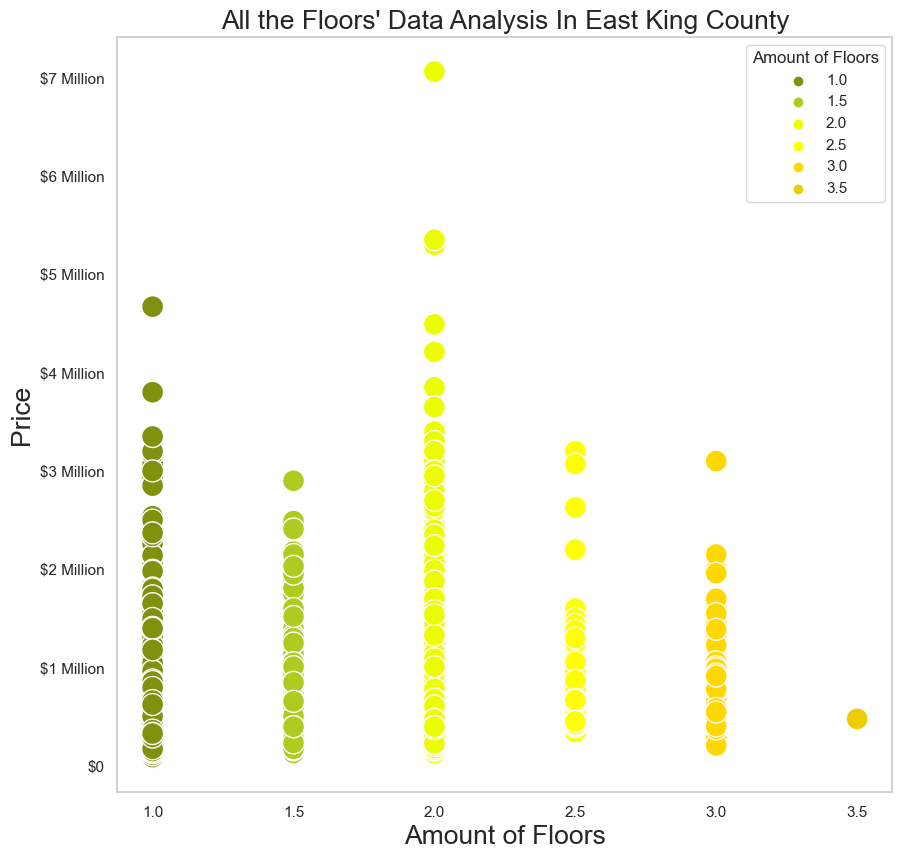

In [219]:
x = regressiondata3['Amount_of_Floors']
y = regressiondata3['Price']
flatui = ['#80910E','#AFCB20','#ECFD00','#FFFF00','#ffd800','#efcc00']
#sns.set_palette(flatui)
plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
ax = sns.scatterplot(data=regressiondata3, x=x, y=y,s=250, linewidth = 1,
                     hue='Amount_of_Floors', palette=flatui)
plt.grid(linestyle='-', linewidth=0.2)
ax.set_title('All the Floors\' Data Analysis In East King County',size=19)
plt.xlabel("Amount of Floors", size=19)
plt.legend(title='Amount of Floors')
plt.ylabel("Price", size=19)
ax.set_yticklabels(['0','$0','$1 Million','$2 Million','$3 Million',
                    '$4 Million','$5 Million','$6 Million','$7 Million'])
plt.gcf().set_size_inches((10,10))
xticks=ax.xaxis.get_major_ticks()
plt.show()

In [220]:
train_df, test_df = train_test_split(regressiondata3, test_size=0.10, shuffle=False)

In [221]:
X_train, y_train = train_df[['Amount_of_Floors']], train_df[['Price']]
X_test, y_test = test_df[['Amount_of_Floors']], test_df[['Price']]

In [222]:
classifiers = {}
for tau in [0.1, 0.5, 0.9]:
    clf = LGBMRegressor(objective='quantile', alpha=tau)
    clf.fit(X_train, y_train)
    preds = pd.DataFrame(clf.predict(X_test), columns = [str(tau)])
    classifiers[str(tau)] = {'clf': clf, 'predictions': preds}

In [223]:
Quantile_regression2 = pd.DataFrame({'Amount_of_Floors': X_test.reset_index()['Amount_of_Floors'],
              '0.1': classifiers['0.1']['predictions']['0.1'],
              '0.5': classifiers['0.5']['predictions']['0.5'],
              '0.9': classifiers['0.9']['predictions']['0.9'],
              'Price': y_test.reset_index()['Price']})

In [224]:
Quantile_regression2

Amount_of_Floors            0.1            0.5           0.9     Price
0                 1.5  340198.533079  470001.195263  1.316791e+06  795000.0
1                 1.5  340198.533079  470001.195263  1.316791e+06  400000.0
2                 1.5  340198.533079  470001.195263  1.316791e+06  385200.0
3                 1.5  340198.533079  470001.195263  1.316791e+06  428750.0
4                 1.5  340198.533079  470001.195263  1.316791e+06  425000.0
..                ...            ...            ...           ...       ...
830               2.5  359998.002585  614997.343860  1.189995e+06  645000.0
831               2.5  359998.002585  614997.343860  1.189995e+06  680000.0
832               2.5  359998.002585  614997.343860  1.189995e+06  669950.0
833               2.5  359998.002585  614997.343860  1.189995e+06  453000.0
834               3.5  359998.002585  614997.343860  1.189995e+06  479000.0

[835 rows x 5 columns]

In [225]:
Quantileregression_updated = pd.DataFrame({'Amount_of_Floors':[1.0,1.5,2.0,2.5,3.0,3.5],
    '0.1':[340198.533079,340198.533079,340198.533079,359998.002585,359998.002585,359998.002585],
'0.5':[470001.195263,470001.195263,470001.195263,614997.343860,614997.343860,614997.343860],
'0.9':[1.316791e+06,1.316791e+06,1.316791e+06,1.189995e+06,1.189995e+06,1.189995e+06]})
Quantileregression_updated

Amount_of_Floors            0.1            0.5        0.9
0               1.0  340198.533079  470001.195263  1316791.0
1               1.5  340198.533079  470001.195263  1316791.0
2               2.0  340198.533079  470001.195263  1316791.0
3               2.5  359998.002585  614997.343860  1189995.0
4               3.0  359998.002585  614997.343860  1189995.0
5               3.5  359998.002585  614997.343860  1189995.0

In [226]:
melted_data = pd.melt(Quantileregression_updated, id_vars=['Amount_of_Floors'])
melted_data = melted_data.dropna()
melted_data = melted_data.rename(columns={'variable': 'Percentile'})
melted_data

Amount_of_Floors Percentile         value
0                1.0        0.1  3.401985e+05
1                1.5        0.1  3.401985e+05
2                2.0        0.1  3.401985e+05
3                2.5        0.1  3.599980e+05
4                3.0        0.1  3.599980e+05
5                3.5        0.1  3.599980e+05
6                1.0        0.5  4.700012e+05
7                1.5        0.5  4.700012e+05
8                2.0        0.5  4.700012e+05
9                2.5        0.5  6.149973e+05
10               3.0        0.5  6.149973e+05
11               3.5        0.5  6.149973e+05
12               1.0        0.9  1.316791e+06
13               1.5        0.9  1.316791e+06
14               2.0        0.9  1.316791e+06
15               2.5        0.9  1.189995e+06
16               3.0        0.9  1.189995e+06
17               3.5        0.9  1.189995e+06

2021-08-24 12:21:57,754 [19516] WARNING  py.warnings:109: [JupyterRequire] <ipython-input-227-109f261c515f>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$400,000','$600,000','$800,000','$1 Million','$1.2 Million'])



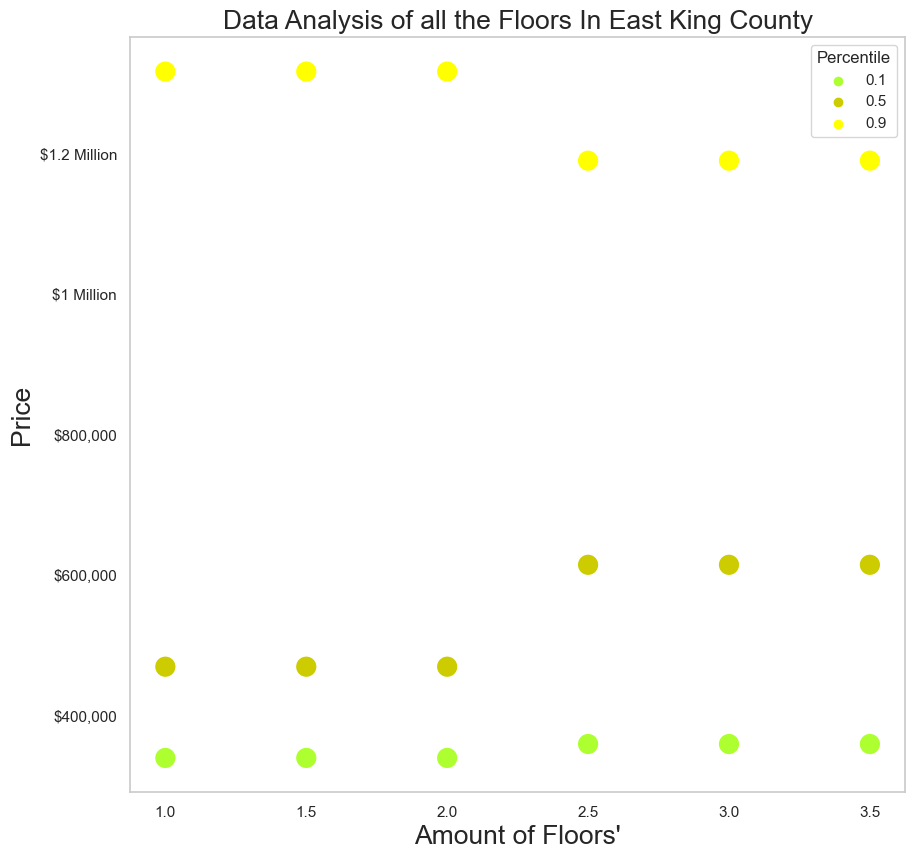

In [227]:
plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
flatui = ["#ADFF2F","#CCCC00","#FFFF00"]
ax =sns.scatterplot(data=melted_data, x="Amount_of_Floors",y='value',s=250,palette=flatui,
                    hue='Percentile')          
plt.grid(linestyle='-', linewidth=0.2)
ax.set_title('Data Analysis of all the Floors In East King County',size=19)
plt.xlabel("Amount of Floors'", size=19)
plt.ylabel("Price", size=19)
ax.set_yticklabels(['0','$400,000','$600,000','$800,000','$1 Million','$1.2 Million'])
ylabel = plt.ylabel("Price")
xlabel = plt.xlabel("Amount of Floors'")
plt.gcf().set_size_inches((10,10))

2021-08-24 12:21:58,375 [19516] WARNING  py.warnings:109: [JupyterRequire] <ipython-input-228-96cee7ba1360>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$400,000','$600,000','$800,000','$1 Million','$1.2 Million'])



[Text(0, 200000.0, '0'),
 Text(0, 400000.0, '$400,000'),
 Text(0, 600000.0, '$600,000'),
 Text(0, 800000.0, '$800,000'),
 Text(0, 1000000.0, '$1 Million'),
 Text(0, 1200000.0, '$1.2 Million'),
 Text(0, 1400000.0, '')]

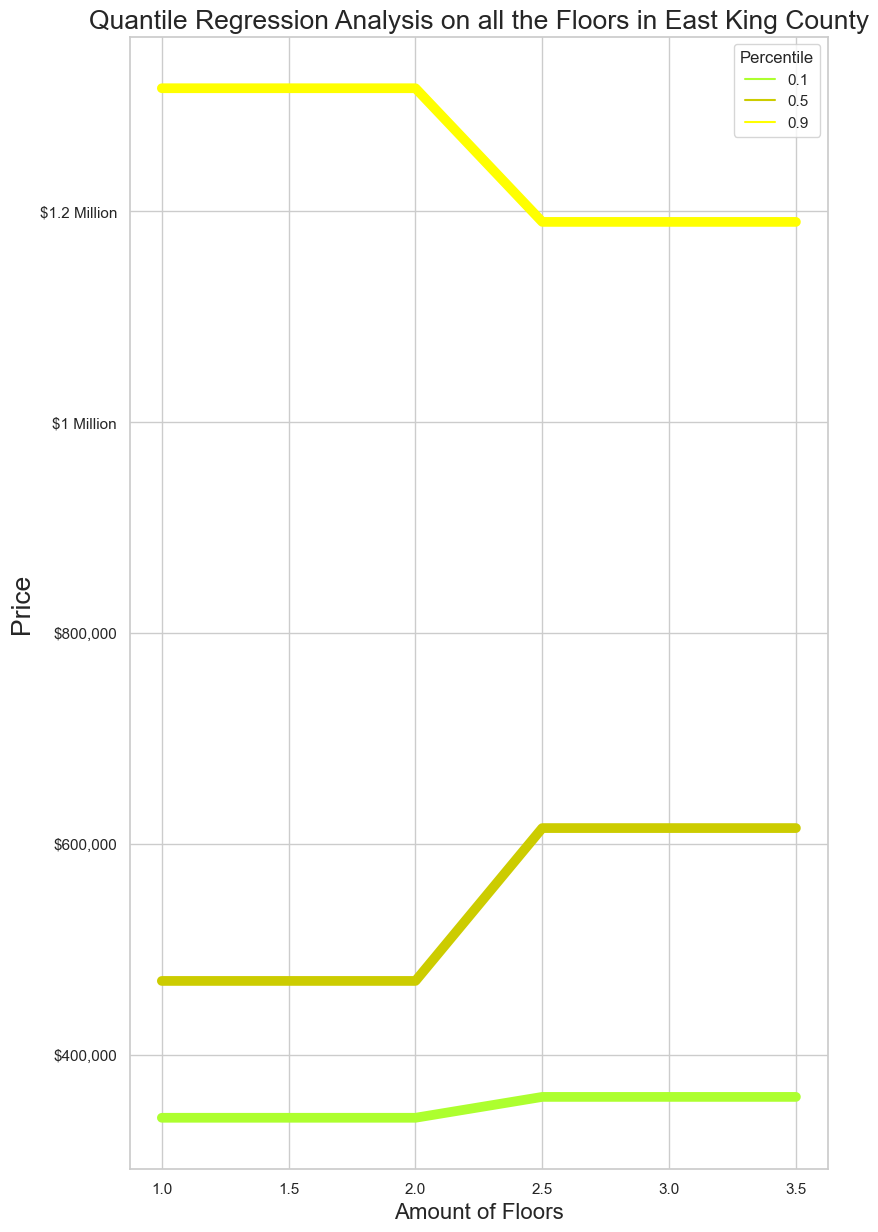

In [228]:
sns.set_style("whitegrid")
flatui = ["#ADFF2F","#CCCC00","#FFFF00"]
ax=sns.lineplot( data=melted_data, x="Amount_of_Floors",y="value",
                linewidth = 7,palette=flatui,hue='Percentile')
plt.gcf().set_size_inches((10,10))
plt.gcf().set_size_inches(9, 15)
plt.legend(title='Percentile')
ax.set_title('Quantile Regression Analysis on all the Floors in East King County',size=19)
plt.xlabel("Amount of Floors", size=16)
plt.ylabel("Price", size=19)
ax.set_yticklabels(['0','$400,000','$600,000','$800,000','$1 Million','$1.2 Million'])

In [229]:
(Quantile_regression2['Price'] > Quantile_regression2['0.1']).value_counts()

True     689
False    146
dtype: int64

In [230]:
i = 0
y= 0
x = []
while i < 689:
    x.append('How Many Times The Prediction Was Right')
    i+=1
while y < 146:
    x.append('How Many Times The Prediction Was Wrong')
    y+=1
len(x)
df1 = pd.DataFrame({'Prediction Accuracy':x})

In [231]:
(Quantile_regression2['Price'] > Quantile_regression2['0.5']).value_counts()

True     447
False    388
dtype: int64

In [232]:
i = 0
y= 0
x = []
while i < 447:
    x.append('How Many Times The Prediction Was Right')
    i+=1
while y < 388:
    x.append('How Many Times The Prediction Was Wrong')
    y+=1
len(x)
df2 = pd.DataFrame({'Prediction Accuracy':x})

In [233]:
(Quantile_regression2['Price'] > Quantile_regression2['0.9']).value_counts()

False    782
True      53
dtype: int64

In [234]:
i = 0
y= 0
x = []
while i < 782:
    x.append('How Many Times The Prediction Was Right')
    i+=1
while y < 53:
    x.append('How Many Times The Prediction Was Wrong')
    y+=1
len(x)
df3 = pd.DataFrame({'Prediction Accuracy':x})

Text(0, 0.5, 'Count')

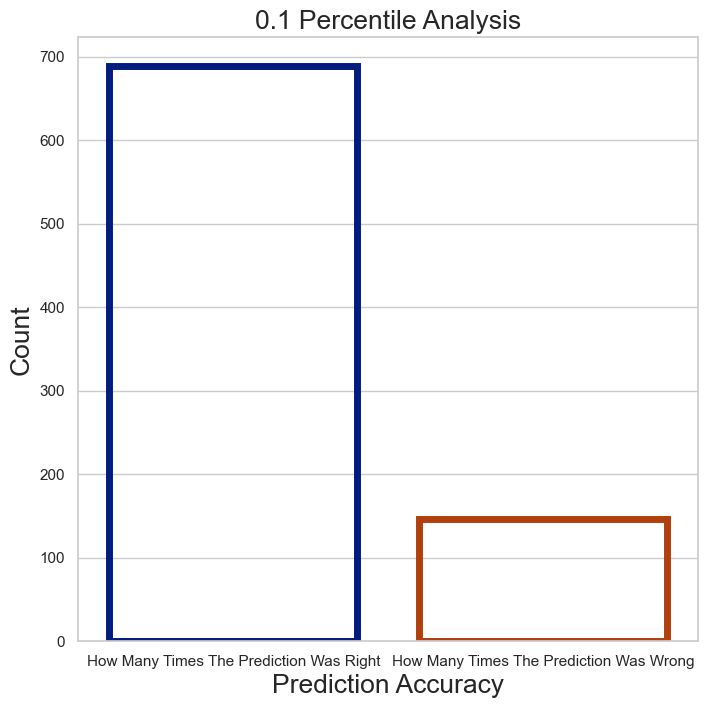

In [235]:
sns.set_style("whitegrid")
plt.gcf().set_size_inches((8,8))
ax = sns.countplot(x="Prediction Accuracy", data=df1,
                   palette=flatui,
                   #title = '0.1 Percentile Analysis',
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))
ax.set_title('0.1 Percentile Analysis',size=19)
plt.xlabel("Prediction Accuracy", size=19)
plt.ylabel("Count", size=19)

Text(0, 0.5, 'Count')

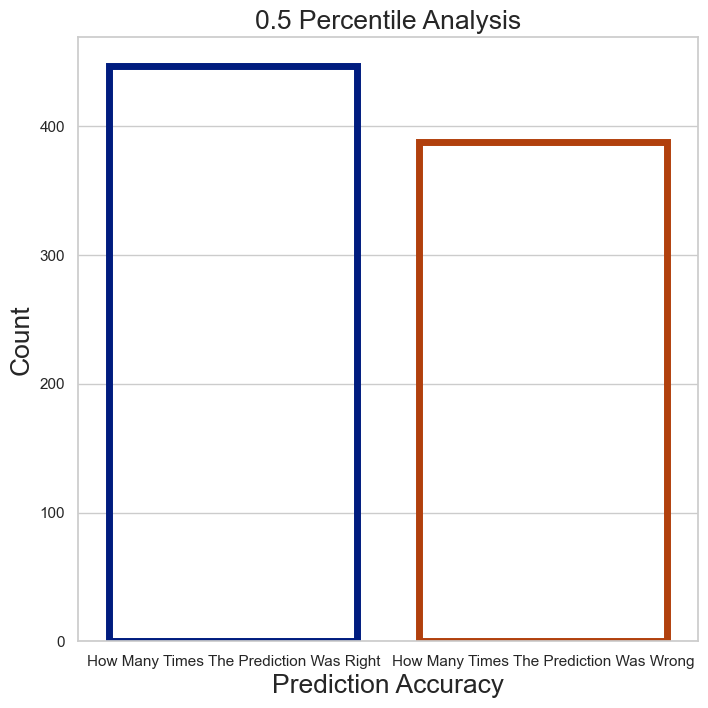

In [236]:
sns.set_style("whitegrid")
plt.gcf().set_size_inches((8,8))
ax = sns.countplot(x="Prediction Accuracy", data=df2,
                   palette=flatui,
                   #title = '0.1 Percentile Analysis',
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))
ax.set_title('0.5 Percentile Analysis',size=19)
plt.xlabel("Prediction Accuracy", size=19)
plt.ylabel("Count", size=19)

Text(0, 0.5, 'Count')

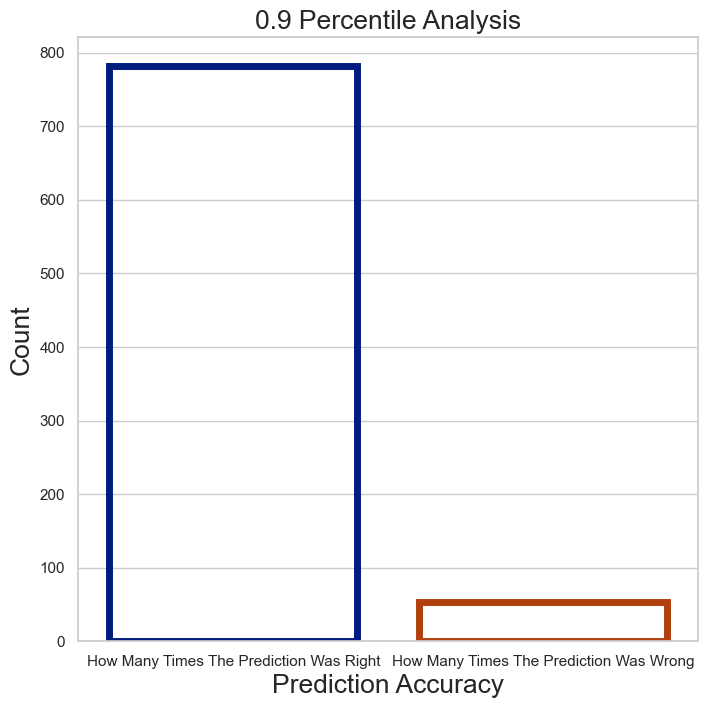

In [237]:
sns.set_style("whitegrid")
plt.gcf().set_size_inches((8,8))
ax = sns.countplot(x="Prediction Accuracy", data=df3,
                   palette=flatui,
                   #title = '0.1 Percentile Analysis',
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))
ax.set_title('0.9 Percentile Analysis',size=19)
plt.xlabel("Prediction Accuracy", size=19)
plt.ylabel("Count", size=19)

In [238]:
floors = []
for i in index2:
    floors.append(raw_info.floors[i])
len(floors)

8349

In [239]:
Predictions2 = []
for i in floors:
    if i == 1.0:Predictions2.append('$340,198 - $1,316,791') 
    if i == 1.5:Predictions2.append('$340,198 - $1,316,791') 
    if i == 2.0:Predictions2.append('$340,198 - $1,316,791')
    if i == 2.5:Predictions2.append('$359,998 - $1,189,995') 
    if i == 3.0: Predictions2.append('$359,998 - $1,189,995')
    if i == 3.5: Predictions2.append('$359,998 - $1,189,995')
len(Predictions2)

8349

In [240]:
Prediction2 = pd.DataFrame({'Amount of Floors':floors,
                           'Prediction':Predictions2,'Actual Price':price1})
Prediction2

Amount of Floors             Prediction Actual Price
0                  1.0  $340,198 - $1,316,791     $221,900
1                  1.0  $340,198 - $1,316,791     $604,000
2                  1.0  $340,198 - $1,316,791     $229,500
3                  2.0  $340,198 - $1,316,791     $650,000
4                  2.0  $340,198 - $1,316,791     $395,000
...                ...                    ...          ...
8344               2.0  $340,198 - $1,316,791     $610,685
8345               2.0  $340,198 - $1,316,791   $1,010,000
8346               2.0  $340,198 - $1,316,791     $475,000
8347               2.0  $340,198 - $1,316,791     $400,000
8348               2.0  $340,198 - $1,316,791     $400,000

[8349 rows x 3 columns]

In [241]:
%store Prediction2

Stored 'Prediction2' (DataFrame)


In [242]:
def PRICE_YEARS_BUILT(YEAR_BUILT):
    
    locations = house_info['Location'].tolist()
    locationzip =raw_info.zipcode
    year_built = house_info['Year Built'].tolist()

    years_built_index = []
    for i,x in enumerate(year_built):
        if x == YEAR_BUILT:years_built_index.append(i)
            
    index = []
    for i,x in enumerate(raw_info.lat):
        if x == 47.618:index.append(i)
        if x == 47.528:index.append(i)
        if x == 47.502:index.append(i)  
        if x == 47.530:index.append(i)
        if x == 47.567:index.append(i)
        if x == 47.733:index.append(i)   
        if x == 47.648:index.append(i)
    
    zip_loca = []
    for i in index:zip_loca.append(locationzip[i]) 

    years_built_eastking = []
    for i in years_built_index:
        if locations[i] == zip_loca[0] : years_built_eastking.append(i)
        elif locations[i] == zip_loca[1] : years_built_eastking.append(i)
        elif locations[i] == zip_loca[2] : years_built_eastking.append(i)
        elif locations[i] == zip_loca[3] : years_built_eastking.append(i)
        elif locations[i] == zip_loca[4]: years_built_eastking.append(i)
        elif locations[i] == zip_loca[5] : years_built_eastking.append(i)
        elif locations[i] == zip_loca[6] : years_built_eastking.append(i)
        elif locations[i] == zip_loca[7]: years_built_eastking.append(i)
        elif locations[i] == zip_loca[8] : years_built_eastking.append(i)
        elif locations[i] == zip_loca[9] : years_built_eastking.append(i)
        elif locations[i] == zip_loca[10] : years_built_eastking.append(i)
        elif locations[i] == zip_loca[11] : years_built_eastking.append(i)
        elif locations[i] == zip_loca[12]: years_built_eastking.append(i)
        elif locations[i] == zip_loca[13] : years_built_eastking.append(i)
        elif locations[i] == zip_loca[14] : years_built_eastking.append(i)
        elif locations[i] == zip_loca[15] : years_built_eastking.append(i)
        elif locations[i] == zip_loca[16]: years_built_eastking.append(i)
        elif locations[i] == zip_loca[17] : years_built_eastking.append(i)
        elif locations[i] == zip_loca[18]: years_built_eastking.append(i)
        elif locations[i] == zip_loca[19] : years_built_eastking.append(i)
        elif locations[i] == zip_loca[20]: years_built_eastking.append(i)
        elif locations[i] == zip_loca[21] : years_built_eastking.append(i)
        elif locations[i] == zip_loca[22] : years_built_eastking.append(i)
        elif locations[i] == zip_loca[23] : years_built_eastking.append(i)
        elif locations[i] == zip_loca[24] : years_built_eastking.append(i)
        elif locations[i] == zip_loca[25] : years_built_eastking.append(i)
        elif locations[i] == zip_loca[26] : years_built_eastking.append(i)
        elif locations[i] == zip_loca[27] : years_built_eastking.append(i)
        elif locations[i] == zip_loca[28]: years_built_eastking.append(i)
        elif locations[i] == zip_loca[29] : years_built_eastking.append(i)
        elif locations[i] == zip_loca[30] : years_built_eastking.append(i)
        elif locations[i] == zip_loca[31]: years_built_eastking.append(i)
        elif locations[i] == zip_loca[32] : years_built_eastking.append(i)
        elif locations[i] == zip_loca[33] : years_built_eastking.append(i)
        elif locations[i] == zip_loca[34] : years_built_eastking.append(i)
        elif locations[i] == zip_loca[35]: years_built_eastking.append(i)
        elif locations[i] == zip_loca[36] : years_built_eastking.append(i)
        elif locations[i] == zip_loca[37] : years_built_eastking.append(i)
        elif locations[i] == zip_loca[38] : years_built_eastking.append(i)
        elif locations[i] == zip_loca[39] : years_built_eastking.append(i)
        elif locations[i] == zip_loca[40] : years_built_eastking.append(i)
        elif locations[i] == zip_loca[41] : years_built_eastking.append(i)
        elif locations[i] == zip_loca[42] : years_built_eastking.append(i)
        elif locations[i] == zip_loca[43]: years_built_eastking.append(i)
        elif locations[i] == zip_loca[44] : years_built_eastking.append(i)
        elif locations[i] == zip_loca[45] : years_built_eastking.append(i)


    price = house_info["Price"].tolist()

    price_eastking = []
    for i in years_built_eastking:price_eastking.append(price[i])
    return(price_eastking)

no_of_Year = house_info["Year Built"].value_counts().index.tolist()
price_Year_eastking = []
for i in no_of_Year:
    price_Year_eastking.append(PRICE_YEARS_BUILT(i))
price_Year_eastking = sum(price_Year_eastking, [])
len(price_Year_eastking)

8349

In [243]:
def AMOUNT_YEARS_BUILT(AMOUNT_YEARS):
    locations = house_info['Location'].tolist()
    locationzip =raw_info.zipcode
    years_built = house_info["Year Built"].tolist()
    X_value = []
    years_index = []
    for i,x in enumerate(years_built):
        if x == AMOUNT_YEARS:years_index.append(i)
            
    index = []
    for i,x in enumerate(raw_info.lat):
        if x == 47.618:index.append(i)
        if x == 47.528:index.append(i)
        if x == 47.502:index.append(i)  
        if x == 47.530:index.append(i)
        if x == 47.567:index.append(i)
        if x == 47.733:index.append(i)   
        if x == 47.648:index.append(i)
    
    zip_loca = []
    for i in index:zip_loca.append(locationzip[i])

    for i in years_index:
        if locations[i] == zip_loca[0] : X_value.append(AMOUNT_YEARS)
        elif locations[i] == zip_loca[1]: X_value.append(AMOUNT_YEARS)
        elif locations[i] == zip_loca[2] : X_value.append(AMOUNT_YEARS)
        elif locations[i] == zip_loca[3] : X_value.append(AMOUNT_YEARS)
        elif locations[i] == zip_loca[4] : X_value.append(AMOUNT_YEARS)
        elif locations[i] == zip_loca[5]: X_value.append(AMOUNT_YEARS)
        elif locations[i] == zip_loca[6] : X_value.append(AMOUNT_YEARS)
        elif locations[i] == zip_loca[7]: X_value.append(AMOUNT_YEARS)
        elif locations[i] == zip_loca[8] : X_value.append(AMOUNT_YEARS)
        elif locations[i] == zip_loca[9]: X_value.append(AMOUNT_YEARS)
        elif locations[i] == zip_loca[10] : X_value.append(AMOUNT_YEARS)
        elif locations[i] == zip_loca[11] : X_value.append(AMOUNT_YEARS)
        elif locations[i] == zip_loca[12] : X_value.append(AMOUNT_YEARS)
        elif locations[i] == zip_loca[13]: X_value.append(AMOUNT_YEARS)
        elif locations[i] == zip_loca[14] : X_value.append(AMOUNT_YEARS)
        elif locations[i] == zip_loca[15]: X_value.append(AMOUNT_YEARS)
        elif locations[i] == zip_loca[16] : X_value.append(AMOUNT_YEARS)
        elif locations[i] == zip_loca[17]: X_value.append(AMOUNT_YEARS)
        elif locations[i] == zip_loca[18] : X_value.append(AMOUNT_YEARS)
        elif locations[i] == zip_loca[19] : X_value.append(AMOUNT_YEARS)
        elif locations[i] == zip_loca[20] : X_value.append(AMOUNT_YEARS)
        elif locations[i] == zip_loca[21]: X_value.append(AMOUNT_YEARS)
        elif locations[i] == zip_loca[22] : X_value.append(AMOUNT_YEARS)
        elif locations[i] == zip_loca[23]: X_value.append(AMOUNT_YEARS)
        elif locations[i] == zip_loca[24] : X_value.append(AMOUNT_YEARS)
        elif locations[i] == zip_loca[25] : X_value.append(AMOUNT_YEARS)
        elif locations[i] == zip_loca[26]: X_value.append(AMOUNT_YEARS)
        elif locations[i] == zip_loca[27] : X_value.append(AMOUNT_YEARS)
        elif locations[i] == zip_loca[28]: X_value.append(AMOUNT_YEARS)
        elif locations[i] == zip_loca[29] : X_value.append(AMOUNT_YEARS)
        elif locations[i] == zip_loca[30]: X_value.append(AMOUNT_YEARS)
        elif locations[i] == zip_loca[31] : X_value.append(AMOUNT_YEARS)
        elif locations[i] == zip_loca[32] : X_value.append(AMOUNT_YEARS)
        elif locations[i] == zip_loca[33] : X_value.append(AMOUNT_YEARS)
        elif locations[i] == zip_loca[34]: X_value.append(AMOUNT_YEARS)
        elif locations[i] == zip_loca[35] : X_value.append(AMOUNT_YEARS)
        elif locations[i] == zip_loca[36]: X_value.append(AMOUNT_YEARS)
        elif locations[i] == zip_loca[37] : X_value.append(AMOUNT_YEARS)
        elif locations[i] == zip_loca[38] : X_value.append(AMOUNT_YEARS)
        elif locations[i] == zip_loca[39] : X_value.append(AMOUNT_YEARS)
        elif locations[i] == zip_loca[40]: X_value.append(AMOUNT_YEARS)
        elif locations[i] == zip_loca[41] : X_value.append(AMOUNT_YEARS)
        elif locations[i] == zip_loca[42]: X_value.append(AMOUNT_YEARS)
        elif locations[i] == zip_loca[43] : X_value.append(AMOUNT_YEARS)
        elif locations[i] == zip_loca[44]: X_value.append(AMOUNT_YEARS)
        elif locations[i] == zip_loca[45] : X_value.append(AMOUNT_YEARS)

    return X_value
no_of_years = house_info["Year Built"].value_counts().index.tolist()
amount_years_eastking = []
for i in no_of_years:
    amount_years_eastking.append(AMOUNT_YEARS_BUILT(i))
amount_years_eastking= sum(amount_years_eastking, [])
len(amount_years_eastking)

8349

In [244]:
regressiondata4 = pd.DataFrame({'Year_Built':amount_years_eastking,
                                'Price':price_Year_eastking})
regressiondata4

Year_Built      Price
0           2014   453246.0
1           2014   802541.0
2           2014  1220000.0
3           2014  1680000.0
4           2014   599950.0
...          ...        ...
8344        1934   750000.0
8345        1934   275000.0
8346        1934   529000.0
8347        1934  2030000.0
8348        1934   240000.0

[8349 rows x 2 columns]

In [245]:
year = regressiondata4['Year_Built'].value_counts()
year

2014    243
2006    217
2005    205
2007    204
2004    202
       ... 
1936     14
1902     12
1901     11
1935      8
1934      6
Name: Year_Built, Length: 116, dtype: int64

In [246]:
reg1,year1 = [],[]
for i,x in enumerate(amount_years_eastking):
    if x == 1900:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1901:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1902:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1903:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1904:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1905:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1906:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1907:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1908:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1909:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1910:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1911:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1912:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1913:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1914:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1915:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1916:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1917:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1918:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1919:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1920:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1921:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1922:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1923:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1924:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1925:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1926:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1927:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1928:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1929:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1930:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1931:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1932:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1933:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if i == 1934:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1935:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1936:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1937:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
reg1.remove(431000.0)
year1.remove(1967) 

In [247]:
regressiondata44 = pd.DataFrame({'Year_Built':year1,
                                'Price':reg1})
x= regressiondata44.Year_Built.value_counts()
len(x)
#for i,x in enumerate(regressiondata44.Year_Built):print(i,x,regressiondata44.Price[i])

37

In [248]:
reg1 = []
year1 = []
for i,x in enumerate(amount_years_eastking):
    if x == 1938:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1939:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1940:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1941:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1942:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1943:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1944:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1945:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1946:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1947:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1948:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1949:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1950:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1951:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1952:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1953:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1954:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1955:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1956:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1957:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1958:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1959:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1960:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1961:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1962:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1963:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1964:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1965:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1966:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1967:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1968:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1969:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1970:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1971:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if i == 1972:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1973:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1974:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1975:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
reg1.remove(425000.0)
year1.remove(1979) 

In [249]:
regressiondata45 = pd.DataFrame({'Year_Built':year1,
                                'Price':reg1})
regressiondata45
for i,x in enumerate(regressiondata45.Year_Built):print(i,x,reg1[i])

0 1968 2000000.0
1 1968 527700.0
2 1968 320000.0
3 1968 940000.0
4 1968 560000.0
5 1968 400000.0
6 1968 426700.0
7 1968 226000.0
8 1968 718000.0
9 1968 499000.0
10 1968 235000.0
11 1968 445950.0
12 1968 389000.0
13 1968 957500.0
14 1968 495000.0
15 1968 830000.0
16 1968 530000.0
17 1968 850000.0
18 1968 485000.0
19 1968 585000.0
20 1968 380000.0
21 1968 385000.0
22 1968 330000.0
23 1968 441500.0
24 1968 769000.0
25 1968 830000.0
26 1968 491500.0
27 1968 374500.0
28 1968 980000.0
29 1968 495000.0
30 1968 575000.0
31 1968 445000.0
32 1968 387000.0
33 1968 357823.0
34 1968 439000.0
35 1968 326500.0
36 1968 371000.0
37 1968 765000.0
38 1968 375000.0
39 1968 525000.0
40 1968 340000.0
41 1968 575000.0
42 1968 354000.0
43 1968 406430.0
44 1968 450000.0
45 1968 335000.0
46 1968 625700.0
47 1968 420200.0
48 1968 440000.0
49 1968 554000.0
50 1968 525000.0
51 1968 524400.0
52 1968 430000.0
53 1968 555000.0
54 1968 1160000.0
55 1968 499950.0
56 1968 395000.0
57 1968 1170000.0
58 1968 860000.0
59 1

591 1969 416000.0
592 1969 467500.0
593 1969 1100000.0
594 1969 528000.0
595 1969 380000.0
596 1969 460000.0
597 1969 600000.0
598 1969 500000.0
599 1969 985000.0
600 1969 315500.0
601 1969 455000.0
602 1969 950000.0
603 1969 1080000.0
604 1969 265000.0
605 1969 339888.0
606 1969 525000.0
607 1969 397500.0
608 1969 600000.0
609 1969 325000.0
610 1969 1900000.0
611 1969 1940000.0
612 1969 460000.0
613 1969 410000.0
614 1969 565000.0
615 1969 310000.0
616 1969 395000.0
617 1969 465000.0
618 1969 455000.0
619 1969 675000.0
620 1969 310650.0
621 1969 350000.0
622 1969 525000.0
623 1969 290000.0
624 1969 607500.0
625 1969 679000.0
626 1969 339900.0
627 1969 650000.0
628 1969 306000.0
629 1969 365000.0
630 1969 367500.0
631 1969 1100000.0
632 1969 998000.0
633 1969 386000.0
634 1969 555000.0
635 1969 2380000.0
636 1969 308000.0
637 1969 1350000.0
638 1969 1140000.0
639 1969 306000.0
640 1969 450000.0
641 1969 330000.0
642 1969 800000.0
643 1969 350000.0
644 1969 525000.0
645 1969 449500.0
64

1703 1953 353000.0
1704 1953 825000.0
1705 1953 1270000.0
1706 1953 299950.0
1707 1953 378500.0
1708 1953 476500.0
1709 1953 330000.0
1710 1953 238000.0
1711 1953 1590000.0
1712 1953 325000.0
1713 1953 843500.0
1714 1953 865000.0
1715 1953 780000.0
1716 1953 875000.0
1717 1953 689000.0
1718 1953 880000.0
1719 1953 951250.0
1720 1953 770000.0
1721 1953 545000.0
1722 1953 685000.0
1723 1953 415000.0
1724 1953 700000.0
1725 1953 895000.0
1726 1953 760250.0
1727 1953 350000.0
1728 1953 287000.0
1729 1953 395000.0
1730 1953 402000.0
1731 1953 667500.0
1732 1953 253200.0
1733 1953 875000.0
1734 1953 920000.0
1735 1953 508000.0
1736 1953 1440000.0
1737 1953 420000.0
1738 1953 310000.0
1739 1953 970000.0
1740 1953 675000.0
1741 1953 880000.0
1742 1953 325000.0
1743 1953 865000.0
1744 1953 497300.0
1745 1953 210000.0
1746 1953 1150000.0
1747 1953 704000.0
1748 1953 825000.0
1749 1953 209995.0
1750 1953 310000.0
1751 1953 1320000.0
1752 1953 465000.0
1753 1953 725000.0
1754 1953 187000.0
1755 19

2318 1943 90000.0
2319 1943 220000.0
2320 1943 770000.0
2321 1943 290000.0
2322 1943 275000.0
2323 1943 330000.0
2324 1943 430000.0
2325 1943 480000.0
2326 1943 330000.0
2327 1943 115000.0
2328 1943 400000.0
2329 1943 238000.0
2330 1943 685000.0
2331 1943 240000.0
2332 1943 325000.0
2333 1943 419000.0
2334 1943 202500.0
2335 1943 269500.0
2336 1943 480000.0
2337 1943 190000.0
2338 1943 395000.0
2339 1974 315000.0
2340 1974 425000.0
2341 1974 645000.0
2342 1974 459000.0
2343 1974 491500.0
2344 1974 935000.0
2345 1974 544500.0
2346 1974 415000.0
2347 1974 463000.0
2348 1974 525000.0
2349 1974 739000.0
2350 1974 425000.0
2351 1974 200000.0
2352 1974 732000.0
2353 1974 1060000.0
2354 1974 305000.0
2355 1974 1090000.0
2356 1974 393000.0
2357 1974 865000.0
2358 1974 596000.0
2359 1974 475000.0
2360 1974 1250000.0
2361 1974 600000.0
2362 1974 440000.0
2363 1974 652450.0
2364 1974 535000.0
2365 1974 595000.0
2366 1974 515000.0
2367 1974 438000.0
2368 1974 987500.0
2369 1974 317000.0
2370 1974 

2869 1945 435000.0
2870 1945 492000.0
2871 1945 299980.0
2872 1945 200000.0
2873 1945 218000.0
2874 1945 253000.0
2875 1945 255000.0
2876 1945 334000.0
2877 1945 357500.0
2878 1945 550000.0
2879 1938 400000.0
2880 1938 659000.0
2881 1938 1390000.0
2882 1938 708000.0
2883 1938 235750.0
2884 1938 452000.0
2885 1938 650000.0
2886 1938 208417.0
2887 1938 250000.0
2888 1938 559000.0
2889 1938 490000.0
2890 1938 550000.0
2891 1938 825000.0
2892 1938 879950.0


In [250]:
x= regressiondata45.Year_Built.value_counts()
len(x)

37

In [251]:
reg1 = []
year1 = []
for i,x in enumerate(amount_years_eastking):
    if x == 1976:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1977:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1978:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1979:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1980:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1981:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1982:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1983:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1984:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1985:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1986:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1987:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1988:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1989:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1990:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1991:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1992:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1993:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1994:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1995:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1996:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1997:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1998:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 1999:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 2001:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 2002:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 2003:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 2004:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 2005:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 2006:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 2007:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 2008:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 2009:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 2010:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if i == 2011:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 2012:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 2013:
        reg1.append(price_Year_eastking[i])
        year1.append(x)
    if x == 2014:
        reg1.append(price_Year_eastking[i])
        year1.append(x)

In [252]:
regressiondata46 = pd.DataFrame({'Year_Built':year1,
                                'Price':reg1})
regressiondata46
x= regressiondata46.Year_Built.value_counts()
len(x)
#for i,x in enumerate(regressiondata46.Year_Built):print(i,x,reg1[i])

37

In [253]:
flatui1 = [ '#f7d64e','#f3d451','#fad94f','#fbcc06','#f5c80a','#f0c718',
          '#eed04f','#e3bf27','#E9DB0D','#E1D41E','#DBD14B','#D0C318',
           
           '#dcc358','#d3c278','#e0cd7f', '#E8E3C1','#E6E3CA','#F4F3ED',
           '#E8E7DE','#F4F3ED','#F4F3ED','#E8E3C1','#DFD8AD','#d1aa06', 
           
           '#b7960c','#b39519','#a78d21','#937704','#9d810c', '#86721e',
           '#806b12','#7d6c23','#645102','#635108','#666600', '#333300','#3c3723']
len(flatui1)#37

37

In [254]:
flatui2 = ['#ffff00','#ffff1a','#ffff33','#ffff4d','#ffff66','#ffff66',
           '#fdf623','#ede622','#ebe775','#e8e110','#e4e063','#e5df34',
           
           '#d8d22a','#e7e59c','#ebe891','#e9e8cb','#f0efd9','#ECEADE',
           '#f2f2e4', '#F4F3ED','#E8E5D4','#E6E3CA','#E6E5A8','#c6c639',
           
           '#bfbf40','#c5c035','#9e990e','#97942b','#757613','#6a6716',
          '#6d6a10','#686913','#39390C','#373805','#3C3C18','#494A25','#4D4E1E']#38
len(flatui2)

37

In [255]:
flatui3 = ['#D6FF00','#D6F825','#DBF844','#C1E504','#C3E21E','#DDF65C',
          '#C5E130','#CBE448','#BBD62E','#ACCD03','#A1BD0D','#95AE15',
          
          '#94AE0B','#8DA50F','#B3C169',
           '#DBE1BC','#E5E8D4','#ECF2CB',
          '#F2F4E5','#EEF0E5','#E3E8C7','#E5E8D4','#DDE6A8','#819806',
          
          '#768524','#768916','#708501','#5E6920','#586612','#536204',
          '#444C1E','#424A15','#3A430B','#323B03','#303511','#323A09','#2E3603']#37

2021-08-24 12:22:12,008 [19516] WARNING  py.warnings:109: [JupyterRequire] <ipython-input-256-1e12734c6257>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$0','$500,000','$1 Million','$1.5 Million','$2 Million','$2.5 Million','$3 Million'])

2021-08-24 12:22:12,035 [19516] WARNING  py.warnings:109: [JupyterRequire] <ipython-input-256-1e12734c6257>:17: MatplotlibDeprecationWarning: Passing the pad parameter of tight_layout() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
  plt.tight_layout(1)

2021-08-24 12:22:12,593 [19516] WARNING  py.warnings:109: [JupyterRequire] <ipython-input-256-1e12734c6257>:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$0','$1 Million','$2 Million','$3 Million','$4 Million','$5 Million','$6 Million','$7 Million'])

2021-08-24 12:22:12,624 [19516] WARNING  py.warnings:109: [Jupyt

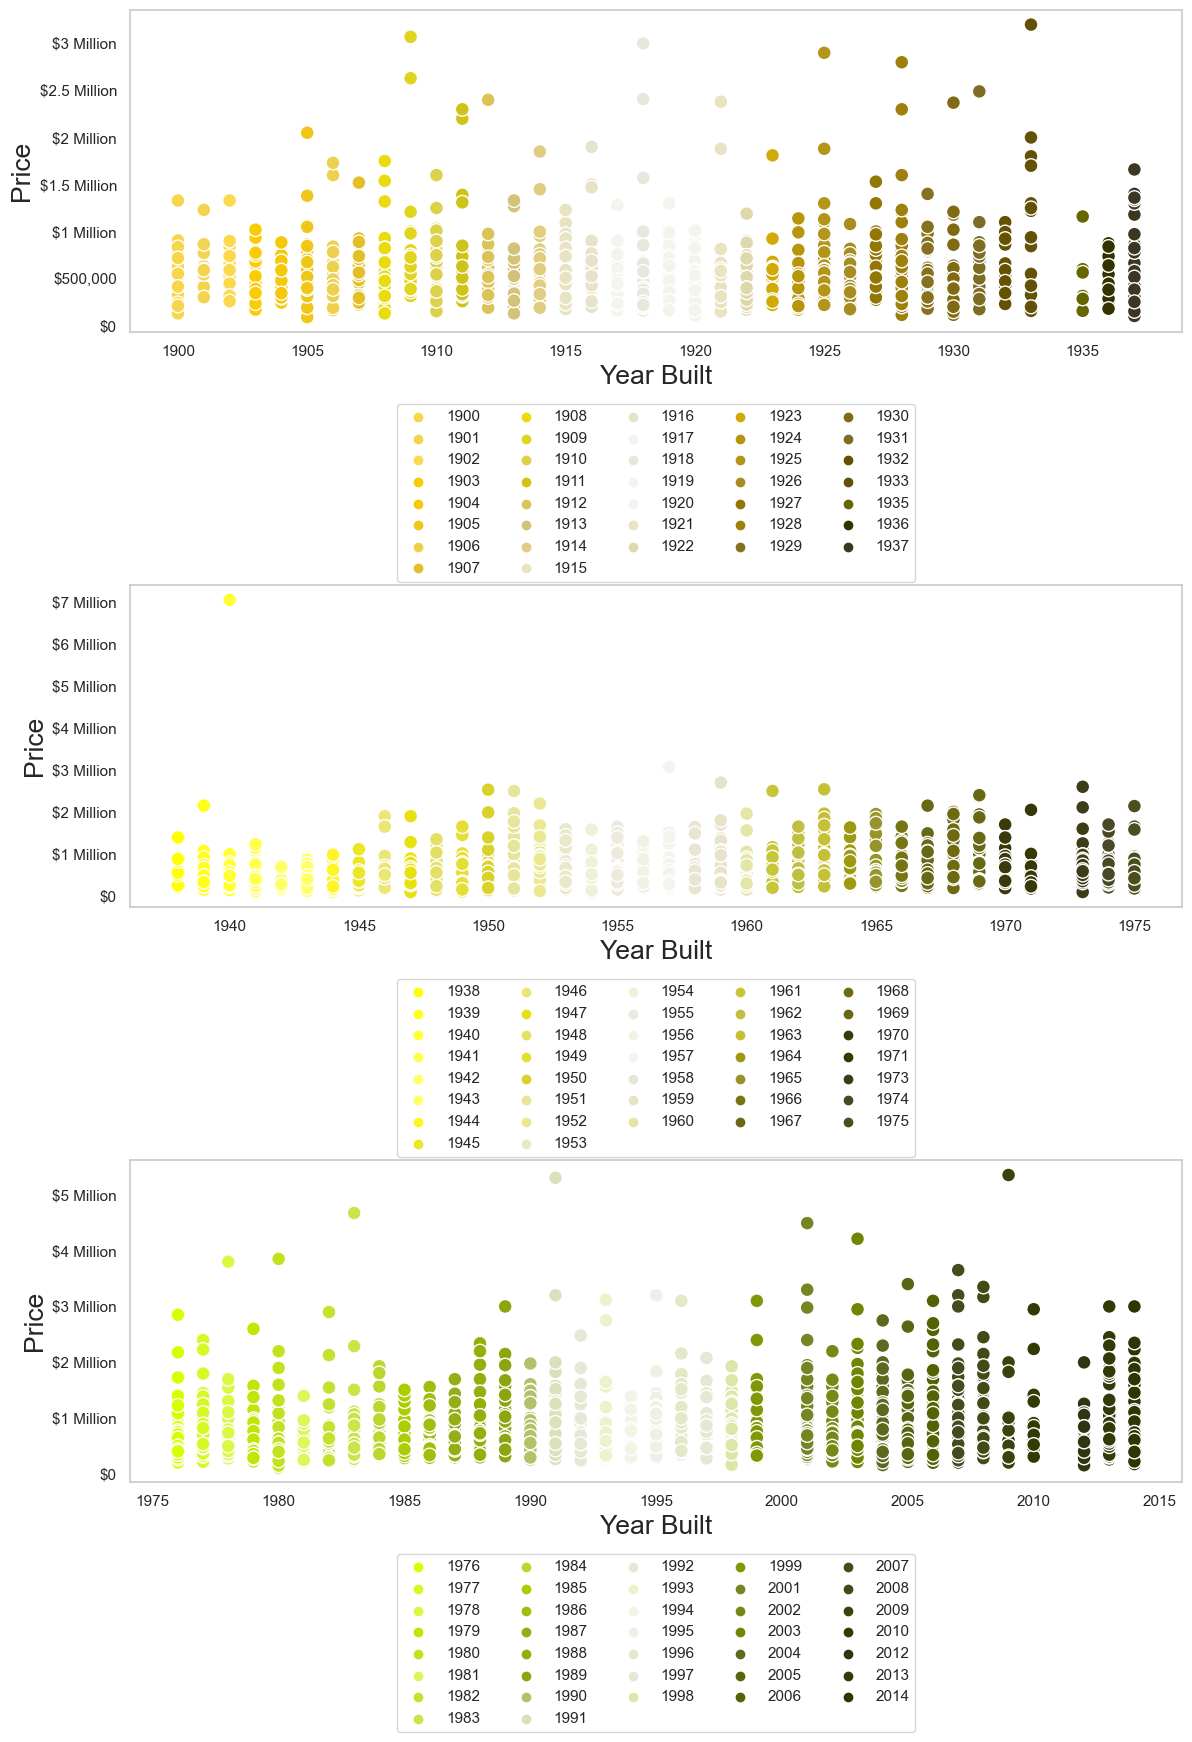

In [256]:
plt.subplot(3,1,1) #35 years in tottal
x = regressiondata44['Year_Built']
y = regressiondata44['Price']
data=regressiondata44
plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
ax = sns.scatterplot(data=regressiondata44, x=x, y=y,s=100, linewidth = 1, hue='Year_Built',
                    palette=flatui1)
plt.grid(linestyle='-', linewidth=0.2)
#ax.set_title('All the Floors\' Data Analysis In North King County',size=19)
plt.xlabel("Year Built", size=19)
plt.legend(title='Year Built')
plt.ylabel("Price", size=19)
ax.set_yticklabels(['0','$0','$500,000','$1 Million','$1.5 Million','$2 Million','$2.5 Million','$3 Million'])
plt.legend(loc="lower center", bbox_to_anchor=(0.5, -0.80), ncol= 5)
plt.gcf().set_size_inches((10,10))
plt.gcf().set_size_inches(12, 15)
plt.tight_layout(1)

#xticks=ax.xaxis.get_major_ticks()

plt.subplot(3,1,2)
x = regressiondata45['Year_Built']
y = regressiondata45['Price']
plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
ax = sns.scatterplot(data=regressiondata45, x=x, y=y,s=100, linewidth = 1, hue='Year_Built'
                    ,palette=flatui2)
plt.grid(linestyle='-', linewidth=0.2)

plt.xlabel("Year Built", size=19)
plt.legend(title='Year Built')
plt.ylabel("Price", size=19)
ax.set_yticklabels(['0','$0','$1 Million','$2 Million','$3 Million','$4 Million','$5 Million','$6 Million','$7 Million'])
plt.legend(loc="lower center", bbox_to_anchor=(0.5, -0.80), ncol= 5)
plt.gcf().set_size_inches((10,10))
plt.gcf().set_size_inches(12, 15)
plt.tight_layout(1)

#xticks=ax.xaxis.get_major_ticks(1930,1995)
#plt.xticks(np.arange(1930,1995)) 

plt.subplot(3,1,3)
sns.set(style="whitegrid")
x = regressiondata46['Year_Built']
y = regressiondata46['Price']
plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
ax = sns.scatterplot(data=regressiondata46, x=x, y=y,s=100, linewidth = 1, hue='Year_Built',
                    palette=flatui3)
plt.grid(linestyle='-', linewidth=0.2)
#ax.set_title('All the Floors\' Data Analysis In South King County',size=19)
plt.xlabel("Year Built", size=19)
plt.legend(title='Year Built')
plt.ylabel("Price", size=19)
ax.set_yticklabels(['0','$0','$1 Million','$2 Million','$3 Million','$4 Million','$5 Million'])
plt.legend(loc="lower center", bbox_to_anchor=(0.5, -0.80), ncol= 5)
plt.gcf().set_size_inches((10,10))
plt.gcf().set_size_inches(12, 15)
#plt.tight_layout(1)
plt.show()


In [257]:
train_df, test_df = train_test_split(regressiondata4, test_size=0.90, shuffle=False)

In [258]:
X_train, y_train = train_df[['Year_Built']], train_df[['Price']]
X_test, y_test = test_df[['Year_Built']], test_df[['Price']]

In [259]:
classifiers = {}
for tau in [0.1, 0.5, 0.9]:
    clf = LGBMRegressor(objective='quantile', alpha=tau)
    clf.fit(X_train, y_train)
    preds = pd.DataFrame(clf.predict(X_test), columns = [str(tau)])
    classifiers[str(tau)] = {'clf': clf, 'predictions': preds}

In [260]:
Quantile_regression3 = pd.DataFrame({'Year_Built': X_test.reset_index()['Year_Built'],
              '0.1': classifiers['0.1']['predictions']['0.1'],
              '0.5': classifiers['0.5']['predictions']['0.5'],
              '0.9': classifiers['0.9']['predictions']['0.9'],
              'Price': y_test.reset_index()['Price']})

In [261]:
Quantile_regression3[4600:]

Year_Built            0.1            0.5           0.9      Price
4600        2013  359232.913265  640490.420027  1.216998e+06  1750000.0
4601        2013  359232.913265  640490.420027  1.216998e+06   620000.0
4602        2013  359232.913265  640490.420027  1.216998e+06   474950.0
4603        2013  359232.913265  640490.420027  1.216998e+06   445000.0
4604        2013  359232.913265  640490.420027  1.216998e+06   915000.0
...          ...            ...            ...           ...        ...
7510        1934  361699.872731  602499.929134  1.003203e+06   750000.0
7511        1934  361699.872731  602499.929134  1.003203e+06   275000.0
7512        1934  361699.872731  602499.929134  1.003203e+06   529000.0
7513        1934  361699.872731  602499.929134  1.003203e+06  2030000.0
7514        1934  361699.872731  602499.929134  1.003203e+06   240000.0

[2915 rows x 5 columns]

In [262]:
melted_data = pd.melt(Quantile_regression3, id_vars=['Year_Built'])
melted_data = melted_data.dropna()
#melted_data = melted_data.drop(range(2505,3340))#0.1 
melted_data = melted_data.drop(range(22545,30060))#0.9
melted_data = melted_data.rename(columns={'variable': 'Percentile'})
melted_data

Year_Built Percentile         value
0            2004        0.1  3.616999e+05
1            2004        0.1  3.616999e+05
2            2004        0.1  3.616999e+05
3            2004        0.1  3.616999e+05
4            2004        0.1  3.616999e+05
...           ...        ...           ...
22540        1934        0.9  1.003203e+06
22541        1934        0.9  1.003203e+06
22542        1934        0.9  1.003203e+06
22543        1934        0.9  1.003203e+06
22544        1934        0.9  1.003203e+06

[22545 rows x 3 columns]

In [263]:
Quantileregression_updated = pd.DataFrame({'Year_Built':[1900,1901,1902,1903,1904,1905,1906,1907,1908,
                                                         1909,
                                                        1910,1911,1912,1913,1914,1915,1916,1917,1918,
                                                        1919,
                                                        1920,1921,1922,1923,1924,1925,1926,1927,1928,
                                                         1929,
                                                        1930,1931,1932,1933,1934,1935,1935,1936,1937],
'0.1':[361699.872731,361699.872731,361699.872731,361699.872731,361699.872731,361699.872731,
      361699.872731,361699.872731,361699.872731,361699.872731,361699.872731,361699.872731,
      361699.872731,361699.872731,361699.872731,361699.872731,361699.872731,361699.872731,
      361699.872731,361699.872731,361699.872731,361699.872731,361699.872731,361699.872731,
      361699.872731,361699.872731,361699.872731,361699.872731,361699.872731,361699.872731,
      361699.872731,361699.872731,361699.872731,361699.872731,361699.872731,361699.872731,
      361699.872731,361699.872731,361699.872731],
'0.5':[602499.929134,602499.929134,602499.929134,602499.929134,602499.929134,602499.929134,
      602499.929134,602499.929134,602499.929134,602499.929134,602499.929134,602499.929134,
      602499.929134,602499.929134,602499.929134,602499.929134,602499.929134,602499.929134,
      602499.929134,602499.929134,602499.929134,602499.929134,602499.929134,602499.929134,
      602499.929134,602499.929134,602499.929134,602499.929134,602499.929134,602499.929134,
      602499.929134,602499.929134,602499.929134,602499.929134,602499.929134,602499.929134,
      602499.929134,602499.929134,602499.929134], 
'0.9':[1.003203e+06,1.003203e+06,1.003203e+06,1.003203e+06,1.003203e+06,1.003203e+06,
       1.003203e+06,1.003203e+06,1.003203e+06,1.003203e+06,1.003203e+06,1.003203e+06, 
       1.003203e+06,1.003203e+06,1.003203e+06,1.003203e+06,1.003203e+06,1.003203e+06,
       1.003203e+06,1.003203e+06,1.003203e+06,1.003203e+06,1.003203e+06,1.003203e+06,
       1.003203e+06,1.003203e+06,1.003203e+06,1.003203e+06,1.003203e+06,1.003203e+06,
       1.003203e+06,1.003203e+06,1.003203e+06,1.003203e+06,1.003203e+06,1.003203e+06,
       1.003203e+06,1.003203e+06,1.003203e+06]})
Quantileregression_updated

Year_Built            0.1            0.5        0.9
0         1900  361699.872731  602499.929134  1003203.0
1         1901  361699.872731  602499.929134  1003203.0
2         1902  361699.872731  602499.929134  1003203.0
3         1903  361699.872731  602499.929134  1003203.0
4         1904  361699.872731  602499.929134  1003203.0
5         1905  361699.872731  602499.929134  1003203.0
6         1906  361699.872731  602499.929134  1003203.0
7         1907  361699.872731  602499.929134  1003203.0
8         1908  361699.872731  602499.929134  1003203.0
9         1909  361699.872731  602499.929134  1003203.0
10        1910  361699.872731  602499.929134  1003203.0
11        1911  361699.872731  602499.929134  1003203.0
12        1912  361699.872731  602499.929134  1003203.0
13        1913  361699.872731  602499.929134  1003203.0
14        1914  361699.872731  602499.929134  1003203.0
15        1915  361699.872731  602499.929134  1003203.0
16        1916  361699.872731  602499.929134  1003203.0
17        1917  361699.872731  602499.929134  1003203.0
18        1918  361699.872731  602499.929134  1003203.0
19        1919  361699.872731  602499.929134  1003203.0
20        1920  361699.872731  602499.929134  1003203.0
21        1921  361699.872731  602499.929134  1003203.0
22        1922  361699.872731  602499.929134  1003203.0
23        1923  361699.872731  602499.929134  1003203.0
24        1924  361699.872731  602499.929134  1003203.0
25        1925  361699.872731  602499.929134  1003203.0
26        1926  361699.872731  602499.929134  1003203.0
27        1927  361699.872731  602499.929134  1003203.0
28        1928  361699.872731  602499.929134  1003203.0
29        1929  361699.872731  602499.929134  1003203.0
30        1930  361699.872731  602499.929134  1003203.0
31        1931  361699.872731  602499.929134  1003203.0
32        1932  361699.872731  602499.929134  1003203.0
33        1933  361699.872731  602499.929134  1003203.0
34        1934  361699.872731  602499.929134  1003203.0
35        1935  361699.872731  602499.929134  1003203.0
36        1935  361699.872731  602499.929134  1003203.0
37        1936  361699.872731  602499.929134  1003203.0
38        1937  361699.872731  602499.929134  1003203.0

In [264]:
melted_data1 = pd.melt(Quantileregression_updated, id_vars=['Year_Built'])
melted_data1 = melted_data1.rename(columns={'variable': 'Percentile'})
melted_data1

Year_Built Percentile         value
0          1900        0.1  3.616999e+05
1          1901        0.1  3.616999e+05
2          1902        0.1  3.616999e+05
3          1903        0.1  3.616999e+05
4          1904        0.1  3.616999e+05
..          ...        ...           ...
112        1934        0.9  1.003203e+06
113        1935        0.9  1.003203e+06
114        1935        0.9  1.003203e+06
115        1936        0.9  1.003203e+06
116        1937        0.9  1.003203e+06

[117 rows x 3 columns]

In [265]:
Quantileregression_updated1 = pd.DataFrame({'Year_Built':[1938,1939,1940,1941,1942,1943,1944,1945,
                                                        1946,1947,1948,1949,1950,1951,1952,1953,
                                                        1954,1955,1956,1957,1958,1959,1960,1961,
                                                        1962,1963,1964,1965,1966,1967,1968,1969,
                                                        1970,1971,1972,1973,1974,1975],
    '0.1':[361699.872731,361699.872731,361699.872731,361699.872731,361699.872731,361699.872731,
      361699.872731,361699.872731,361699.872731,361699.872731,361699.872731,361699.872731,
      361699.872731,361699.872731,361699.872731,361699.872731,361699.872731,361699.872731,
      361699.872731,361699.872731,361699.872731,361699.872731,361699.872731,361699.872731,
      361699.872731,361699.872731,361699.872731,361699.872731,361699.872731,361699.872731,
      361699.872731,361699.872731,361699.872731,361699.872731,361699.872731,361699.872731,
      361699.872731,361699.872731],
'0.5':[602499.929134,602499.929134,602499.929134,602499.929134,602499.929134,602499.929134,
      602499.929134,602499.929134,602499.929134,602499.929134,602499.929134,602499.929134,
      602499.929134,602499.929134,602499.929134,602499.929134,602499.929134,602499.929134,
      602499.929134,602499.929134,602499.929134,602499.929134,602499.929134,602499.929134,
      602499.929134,602499.929134,602499.929134,602499.929134,602499.929134,602499.929134,
      602499.929134,602499.929134,602499.929134,602499.929134,602499.929134,602499.929134,
      602499.929134,602499.929134], 
'0.9':[1.003203e+06,1.003203e+06,1.003203e+06,1.003203e+06,1.003203e+06,1.003203e+06,
       1.003203e+06,1.003203e+06,1.003203e+06,1.003203e+06,1.003203e+06,1.003203e+06, 
       1.003203e+06,1.003203e+06,1.003203e+06,1.003203e+06,1.003203e+06,1.003203e+06,
       1.003203e+06,1.003203e+06,1.003203e+06,1.003203e+06,1.003203e+06,1.003203e+06,
       1.003203e+06,1.003203e+06,1.003203e+06,1.003203e+06,1.003203e+06,1.003203e+06,
       1.003203e+06,1.003203e+06,1.003203e+06,1.003203e+06,1.003203e+06,1.003203e+06,
       1.003203e+06,1.003203e+06]})
Quantileregression_updated1

Year_Built            0.1            0.5        0.9
0         1938  361699.872731  602499.929134  1003203.0
1         1939  361699.872731  602499.929134  1003203.0
2         1940  361699.872731  602499.929134  1003203.0
3         1941  361699.872731  602499.929134  1003203.0
4         1942  361699.872731  602499.929134  1003203.0
5         1943  361699.872731  602499.929134  1003203.0
6         1944  361699.872731  602499.929134  1003203.0
7         1945  361699.872731  602499.929134  1003203.0
8         1946  361699.872731  602499.929134  1003203.0
9         1947  361699.872731  602499.929134  1003203.0
10        1948  361699.872731  602499.929134  1003203.0
11        1949  361699.872731  602499.929134  1003203.0
12        1950  361699.872731  602499.929134  1003203.0
13        1951  361699.872731  602499.929134  1003203.0
14        1952  361699.872731  602499.929134  1003203.0
15        1953  361699.872731  602499.929134  1003203.0
16        1954  361699.872731  602499.929134  1003203.0
17        1955  361699.872731  602499.929134  1003203.0
18        1956  361699.872731  602499.929134  1003203.0
19        1957  361699.872731  602499.929134  1003203.0
20        1958  361699.872731  602499.929134  1003203.0
21        1959  361699.872731  602499.929134  1003203.0
22        1960  361699.872731  602499.929134  1003203.0
23        1961  361699.872731  602499.929134  1003203.0
24        1962  361699.872731  602499.929134  1003203.0
25        1963  361699.872731  602499.929134  1003203.0
26        1964  361699.872731  602499.929134  1003203.0
27        1965  361699.872731  602499.929134  1003203.0
28        1966  361699.872731  602499.929134  1003203.0
29        1967  361699.872731  602499.929134  1003203.0
30        1968  361699.872731  602499.929134  1003203.0
31        1969  361699.872731  602499.929134  1003203.0
32        1970  361699.872731  602499.929134  1003203.0
33        1971  361699.872731  602499.929134  1003203.0
34        1972  361699.872731  602499.929134  1003203.0
35        1973  361699.872731  602499.929134  1003203.0
36        1974  361699.872731  602499.929134  1003203.0
37        1975  361699.872731  602499.929134  1003203.0

In [266]:
melted_data2 = pd.melt(Quantileregression_updated1, id_vars=['Year_Built'])
melted_data2 = melted_data2.rename(columns={'variable': 'Percentile'})
melted_data2

Year_Built Percentile         value
0          1938        0.1  3.616999e+05
1          1939        0.1  3.616999e+05
2          1940        0.1  3.616999e+05
3          1941        0.1  3.616999e+05
4          1942        0.1  3.616999e+05
..          ...        ...           ...
109        1971        0.9  1.003203e+06
110        1972        0.9  1.003203e+06
111        1973        0.9  1.003203e+06
112        1974        0.9  1.003203e+06
113        1975        0.9  1.003203e+06

[114 rows x 3 columns]

In [267]:
Quantileregression_updated = pd.DataFrame({'Year_Built':[1976,1977,1978,1979,1980,1981,1982,1983,
                                                         1984,1985,1986,1987,1988,1989,1990,1991,
                                                         1992,1993,1994,1995,1996,1997,1998,1999,
                                                         2000,2001,2002,2003,2004,
                                                         
                                                         2005,2006,2007,
                                                         2008,2009,2010,2011,2012,2013,2014,2015],
                                           
'0.1':[361699.872731,361699.872731,361699.872731,361699.872731,361699.872731,361699.872731,
      361699.872731,361699.872731,361699.872731,361699.872731,361699.872731,361699.872731,
      361699.872731,361699.872731,361699.872731,361699.872731,361699.872731,361699.872731,
      361699.872731,361699.872731,361699.872731,361699.872731,361699.872731,361699.872731,
      361699.872731,361699.872731,361699.872731,361699.872731,361699.872731,
      
      359232.913265,359232.913265,359232.913265,359232.913265,359232.913265,359232.913265,
      359232.913265,359232.913265,359232.913265,359232.913265,359232.913265],
                                           
'0.5':[602499.929134,602499.929134,602499.929134,602499.929134,602499.929134,602499.929134,
      602499.929134,602499.929134,602499.929134,602499.929134,602499.929134,602499.929134,
      602499.929134,602499.929134,602499.929134,602499.929134,602499.929134,602499.929134,
      602499.929134,602499.929134,602499.929134,602499.929134,602499.929134,602499.929134,
      602499.929134,602499.929134,602499.929134,602499.929134,602499.929134,
      
      640490.420027,640490.420027,640490.420027,640490.420027,640490.420027,640490.420027,
      640490.420027,640490.420027,640490.420027,640490.420027,640490.420027],

'0.9':[1.003203e+06,1.003203e+06,1.003203e+06,1.003203e+06,1.003203e+06,1.003203e+06,
       1.003203e+06,1.003203e+06,1.003203e+06,1.003203e+06,1.003203e+06,1.003203e+06, 
       1.003203e+06,1.003203e+06,1.003203e+06,1.003203e+06,1.003203e+06,1.003203e+06,
       1.003203e+06,1.003203e+06,1.003203e+06,1.003203e+06,1.003203e+06,1.003203e+06,
       1.003203e+06,1.003203e+06,1.003203e+06,1.003203e+06,1.003203e+06,
      
      1.216998e+06,1.216998e+06,1.216998e+06,1.216998e+06,1.216998e+06,1.216998e+06,
      1.216998e+06,1.216998e+06,1.216998e+06,1.216998e+06,1.216998e+06]})
Quantileregression_updated

Year_Built            0.1            0.5        0.9
0         1976  361699.872731  602499.929134  1003203.0
1         1977  361699.872731  602499.929134  1003203.0
2         1978  361699.872731  602499.929134  1003203.0
3         1979  361699.872731  602499.929134  1003203.0
4         1980  361699.872731  602499.929134  1003203.0
5         1981  361699.872731  602499.929134  1003203.0
6         1982  361699.872731  602499.929134  1003203.0
7         1983  361699.872731  602499.929134  1003203.0
8         1984  361699.872731  602499.929134  1003203.0
9         1985  361699.872731  602499.929134  1003203.0
10        1986  361699.872731  602499.929134  1003203.0
11        1987  361699.872731  602499.929134  1003203.0
12        1988  361699.872731  602499.929134  1003203.0
13        1989  361699.872731  602499.929134  1003203.0
14        1990  361699.872731  602499.929134  1003203.0
15        1991  361699.872731  602499.929134  1003203.0
16        1992  361699.872731  602499.929134  1003203.0
17        1993  361699.872731  602499.929134  1003203.0
18        1994  361699.872731  602499.929134  1003203.0
19        1995  361699.872731  602499.929134  1003203.0
20        1996  361699.872731  602499.929134  1003203.0
21        1997  361699.872731  602499.929134  1003203.0
22        1998  361699.872731  602499.929134  1003203.0
23        1999  361699.872731  602499.929134  1003203.0
24        2000  361699.872731  602499.929134  1003203.0
25        2001  361699.872731  602499.929134  1003203.0
26        2002  361699.872731  602499.929134  1003203.0
27        2003  361699.872731  602499.929134  1003203.0
28        2004  361699.872731  602499.929134  1003203.0
29        2005  359232.913265  640490.420027  1216998.0
30        2006  359232.913265  640490.420027  1216998.0
31        2007  359232.913265  640490.420027  1216998.0
32        2008  359232.913265  640490.420027  1216998.0
33        2009  359232.913265  640490.420027  1216998.0
34        2010  359232.913265  640490.420027  1216998.0
35        2011  359232.913265  640490.420027  1216998.0
36        2012  359232.913265  640490.420027  1216998.0
37        2013  359232.913265  640490.420027  1216998.0
38        2014  359232.913265  640490.420027  1216998.0
39        2015  359232.913265  640490.420027  1216998.0

In [268]:
melted_data3 = pd.melt(Quantileregression_updated, id_vars=['Year_Built'])
melted_data3 = melted_data3.rename(columns={'variable': 'Percentile'})
melted_data3

Year_Built Percentile         value
0          1976        0.1  3.616999e+05
1          1977        0.1  3.616999e+05
2          1978        0.1  3.616999e+05
3          1979        0.1  3.616999e+05
4          1980        0.1  3.616999e+05
..          ...        ...           ...
115        2011        0.9  1.216998e+06
116        2012        0.9  1.216998e+06
117        2013        0.9  1.216998e+06
118        2014        0.9  1.216998e+06
119        2015        0.9  1.216998e+06

[120 rows x 3 columns]

2021-08-24 12:22:22,243 [19516] WARNING  py.warnings:109: [JupyterRequire] <ipython-input-269-3ab6261ec913>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$400,000','$500,000','$600,000',

2021-08-24 12:22:22,356 [19516] WARNING  py.warnings:109: [JupyterRequire] <ipython-input-269-3ab6261ec913>:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$400,000','$500,000','$600,000','$700,000',

2021-08-24 12:22:22,464 [19516] WARNING  py.warnings:109: [JupyterRequire] <ipython-input-269-3ab6261ec913>:43: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$400,000','$600,000','$800,000',



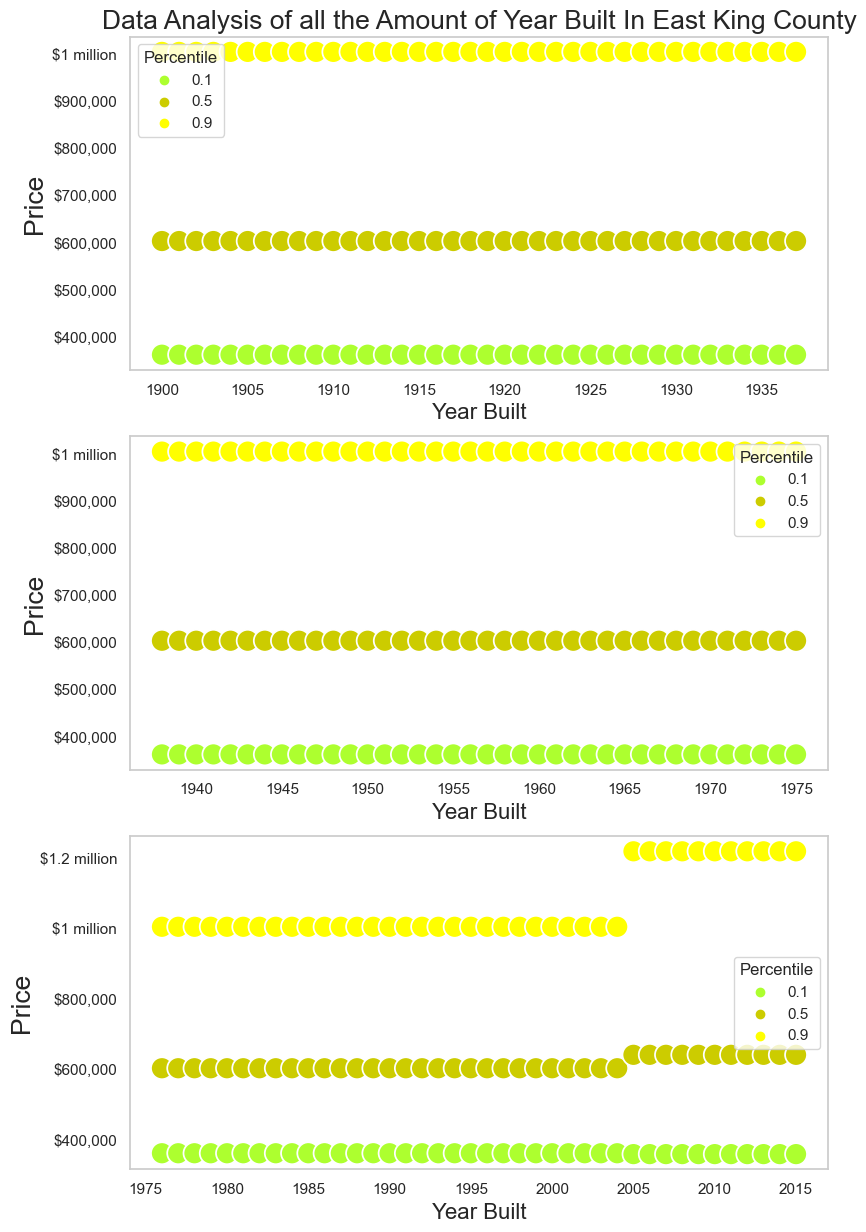

In [269]:
plt.subplot(3,1,1)
plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
flatui = ["#ADFF2F","#CCCC00","#FFFF00"]
ax =sns.scatterplot(data=melted_data1, x="Year_Built",palette=flatui,y='value',s=250,
                    hue='Percentile')
plt.grid(linestyle='-', linewidth=0.2)
ax.set_title('Data Analysis of all the Amount of Year Built In East King County',size=19)
plt.xlabel("Year Built", size=16)
plt.ylabel("Price", size=19)
ax.set_yticklabels(['0','$400,000','$500,000','$600,000',
               '$700,000','$800,000', '$900,000','$1 million'])
ylabel = plt.ylabel("Price")
xlabel = plt.xlabel("Year Built")
plt.gcf().set_size_inches((10,10))
plt.gcf().set_size_inches(9, 15)


plt.subplot(3,1,2)
plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
flatui = ["#ADFF2F","#CCCC00","#FFFF00"]
ax =sns.scatterplot(data=melted_data2, x="Year_Built",palette=flatui,y='value',s=250,
                    hue='Percentile')
plt.grid(linestyle='-', linewidth=0.2)
#ax.set_title('Data Analysis of all the Amount of Year Built In South King County',size=19)
plt.xlabel("Year Built", size=16)
plt.ylabel("Price", size=19)
ax.set_yticklabels(['0','$400,000','$500,000','$600,000','$700,000',
                    '$800,000', '$900,000','$1 million'])
xlabel = plt.xlabel("Year Built")
plt.gcf().set_size_inches((10,10))
plt.gcf().set_size_inches(9, 15)


plt.subplot(3,1,3)
plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
flatui = ["#ADFF2F","#CCCC00","#FFFF00"]
ax =sns.scatterplot(data=melted_data3, x="Year_Built",palette=flatui,y='value',s=250,
                    hue='Percentile')
plt.grid(linestyle='-', linewidth=0.2)
#ax.set_title('Data Analysis of all the Amount of Year Built In South King County',size=19)
plt.xlabel("Year Built", size=16)
plt.ylabel("Price", size=19)
ax.set_yticklabels(['0','$400,000','$600,000','$800,000', 
                    '$1 million','$1.2 million'])
ylabel = plt.ylabel("Price")
xlabel = plt.xlabel("Year Built")
plt.gcf().set_size_inches((10,10))
plt.gcf().set_size_inches(9, 15)

2021-08-24 12:22:24,244 [19516] WARNING  py.warnings:109: [JupyterRequire] <ipython-input-270-ae5e77e2623d>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$400,000','$500,000','$600,000',

2021-08-24 12:22:24,373 [19516] WARNING  py.warnings:109: [JupyterRequire] <ipython-input-270-ae5e77e2623d>:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$400,000','$500,000','$600,000','$700,000',

2021-08-24 12:22:24,512 [19516] WARNING  py.warnings:109: [JupyterRequire] <ipython-input-270-ae5e77e2623d>:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$400,000','$600,000','$800,000',



[Text(0, 200000.0, '0'),
 Text(0, 400000.0, '$400,000'),
 Text(0, 600000.0, '$600,000'),
 Text(0, 800000.0, '$800,000'),
 Text(0, 1000000.0, '$1 million'),
 Text(0, 1200000.0, '$1.2 million'),
 Text(0, 1400000.0, '')]

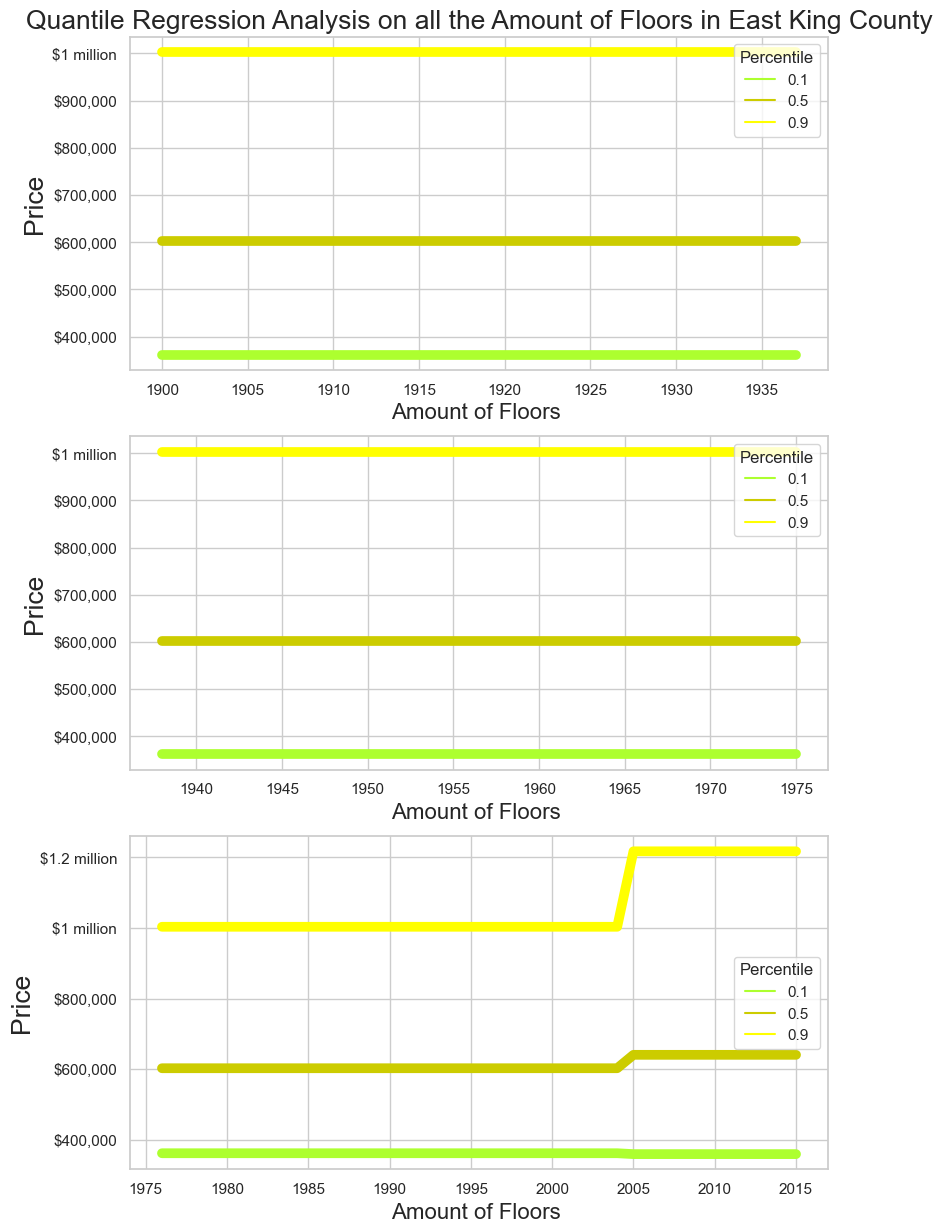

In [270]:
plt.subplot(3,1,1)
sns.set_style("whitegrid")
flatui = ["#ADFF2F","#CCCC00","#FFFF00"]
ax=sns.lineplot( data=melted_data1, x="Year_Built",y="value",
                linewidth = 7,palette=flatui,hue='Percentile')
plt.gcf().set_size_inches((10,10))
plt.gcf().set_size_inches(9, 15) 
plt.legend(title='Percentile')
ax.set_title('Quantile Regression Analysis on all the Amount of Floors in East King County',size=19)
plt.xlabel("Amount of Floors ", size=16)
plt.ylabel("Price", size=19)
ax.set_yticklabels(['0','$400,000','$500,000','$600,000',
               '$700,000','$800,000', '$900,000','$1 million'])


plt.subplot(3,1,2)
sns.set_style("whitegrid")
flatui = ["#ADFF2F","#CCCC00","#FFFF00"]
ax=sns.lineplot(  data=melted_data2, x="Year_Built",y="value",
                linewidth = 7,palette=flatui,hue='Percentile')
plt.gcf().set_size_inches((10,10))
plt.gcf().set_size_inches(9, 15)  
plt.legend(title='Percentile')
plt.xlabel("Amount of Floors ", size=16)
plt.ylabel("Price", size=19)
ax.set_yticklabels(['0','$400,000','$500,000','$600,000','$700,000',
                    '$800,000', '$900,000','$1 million'])


plt.subplot(3,1,3)
sns.set_style("whitegrid")
flatui = ["#ADFF2F","#CCCC00","#FFFF00"]
ax=sns.lineplot( data=melted_data3, x="Year_Built",y="value",
                linewidth = 7,palette=flatui,hue='Percentile')
plt.gcf().set_size_inches((10,10))
plt.gcf().set_size_inches(9, 15)
plt.legend(title='Percentile')
plt.xlabel("Amount of Floors ", size=16)
plt.ylabel("Price", size=19)
ax.set_yticklabels(['0','$400,000','$600,000','$800,000', 
                    '$1 million','$1.2 million'])

In [271]:
(Quantile_regression3['Price'] > Quantile_regression3['0.1']).value_counts()

True     5721
False    1794
dtype: int64

In [272]:
i = 0
y= 0
x = []
while i < 5721:
    x.append('How Many Times The Prediction Was Right')
    i+=1
while y < 1794:
    x.append('How Many Times The Prediction Was Wrong')
    y+=1
len(x)
df1 = pd.DataFrame({'Prediction Accuracy':x})

In [273]:
(Quantile_regression3['Price'] > Quantile_regression3['0.5']).value_counts()

False    4814
True     2701
dtype: int64

In [274]:
i = 0
y= 0
x = []
while i < 4814:
    x.append('How Many Times The Prediction Was Right')
    i+=1
while y < 2701:
    x.append('How Many Times The Prediction Was Wrong')
    y+=1
len(x)
df1 = pd.DataFrame({'Prediction Accuracy':x})

In [275]:
(Quantile_regression3['Price'] > Quantile_regression3['0.9']).value_counts()

False    6856
True      659
dtype: int64

In [276]:
i = 0
y= 0
x = []
while i < 6856:
    x.append('How Many Times The Prediction Was Right')
    i+=1
while y < 659:
    x.append('How Many Times The Prediction Was Wrong')
    y+=1
len(x)
df1 = pd.DataFrame({'Prediction Accuracy':x})

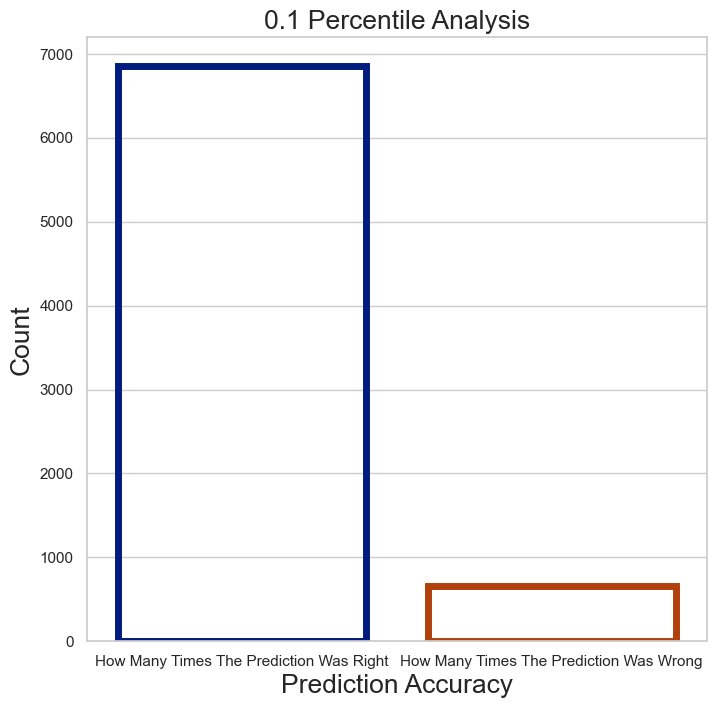

In [277]:
fig = plt.figure()
sns.set_style("whitegrid")
plt.gcf().set_size_inches((8,8))
ax = sns.countplot(x="Prediction Accuracy", data=df1,
                   palette=flatui,
                   #title = '0.1 Percentile Analysis',
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))
ax.set_title('0.1 Percentile Analysis',size=19)
plt.xlabel("Prediction Accuracy", size=19)
plt.ylabel("Count", size=19)
plt.show()

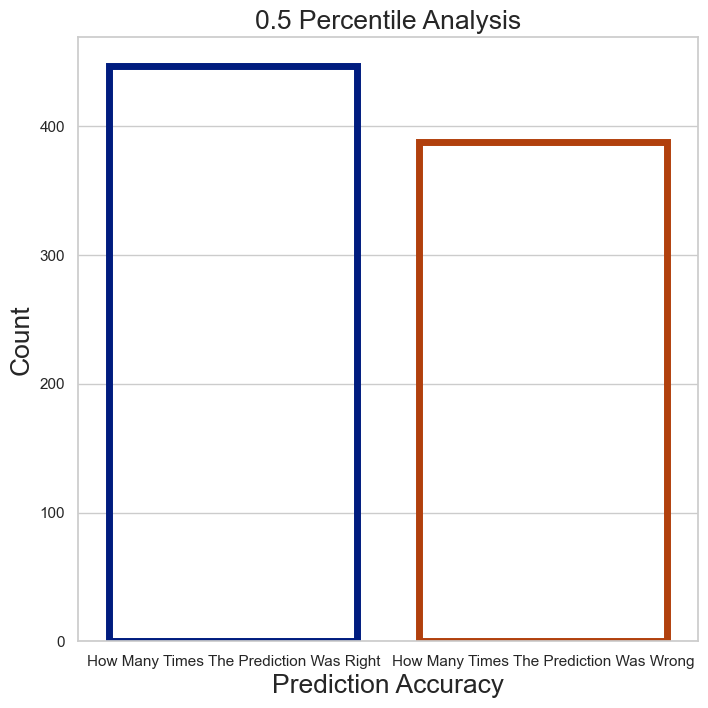

In [278]:
fig = plt.figure()
sns.set_style("whitegrid")
plt.gcf().set_size_inches((8,8))
ax = sns.countplot(x="Prediction Accuracy", data=df2,
                   palette=flatui,
                   #title = '0.1 Percentile Analysis',
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))
ax.set_title('0.5 Percentile Analysis',size=19)
plt.xlabel("Prediction Accuracy", size=19)
plt.ylabel("Count", size=19)
plt.show()

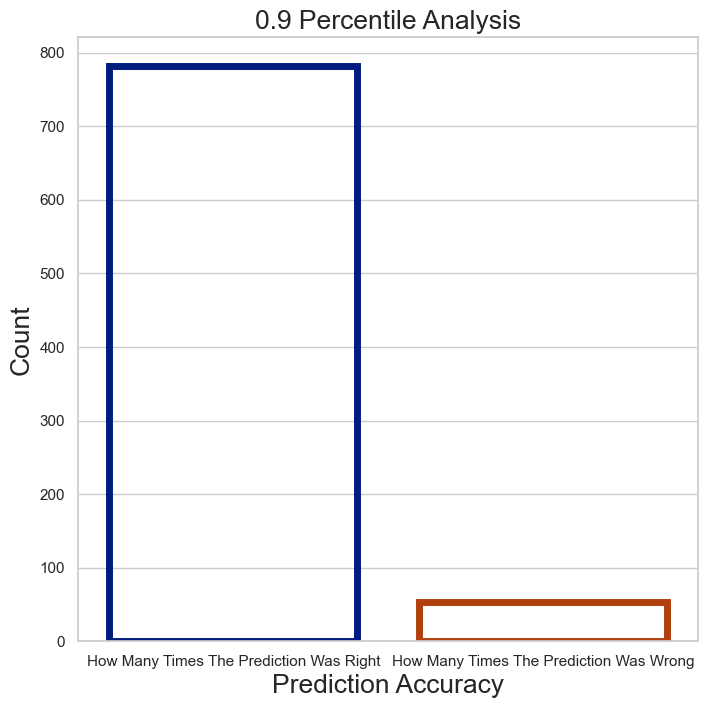

In [279]:
fig = plt.figure()
sns.set_style("whitegrid")
plt.gcf().set_size_inches((8,8))
ax = sns.countplot(x="Prediction Accuracy", data=df3,
                   palette=flatui,
                   #title = '0.1 Percentile Analysis',
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))
ax.set_title('0.9 Percentile Analysis',size=19)
plt.xlabel("Prediction Accuracy", size=19)
plt.ylabel("Count", size=19)
plt.show()

In [280]:
yr_built = []
for i in index2:
    yr_built.append(raw_info.yr_built[i])
len(yr_built)

8349

In [281]:
Predictions3 = []
for i in yr_built:
    if i == 1900:Predictions3.append('$361,699 - $1,003,203') 
    if i == 1901:Predictions3.append('$361,699 - $1,003,203') 
    if i == 1902:Predictions3.append('$361,699 - $1,003,203') 
    if i == 1903:Predictions3.append('$361,699 - $1,003,203') 
    if i == 1904:Predictions3.append('$361,699 - $1,003,203') 
    if i == 1905:Predictions3.append('$361,699 - $1,003,203') 
    if i == 1906:Predictions3.append('$361,699 - $1,003,203') 
    if i == 1907:Predictions3.append('$361,699 - $1,003,203')
    if i == 1908:Predictions3.append('$361,699 - $1,003,203') 
    if i == 1909:Predictions3.append('$361,699 - $1,003,203') 
    if i == 1910:Predictions3.append('$361,699 - $1,003,203') 
    if i == 1911:Predictions3.append('$361,699 - $1,003,203') 
    if i == 1912:Predictions3.append('$361,699 - $1,003,203') 
    if i == 1913:Predictions3.append('$361,699 - $1,003,203') 
    if i == 1914:Predictions3.append('$361,699 - $1,003,203') 
    if i == 1915:Predictions3.append('$361,699 - $1,003,203')
    if i == 1916:Predictions3.append('$361,699 - $1,003,203') 
    if i == 1917:Predictions3.append('$361,699 - $1,003,203') 
    if i == 1918:Predictions3.append('$361,699 - $1,003,203') 
    if i == 1919:Predictions3.append('$361,699 - $1,003,203') 
    if i == 1920:Predictions3.append('$361,699 - $1,003,203') 
    if i == 1921:Predictions3.append('$361,699 - $1,003,203') 
    if i == 1922:Predictions3.append('$361,699 - $1,003,203') 
    if i == 1923:Predictions3.append('$361,699 - $1,003,203')
    if i == 1924:Predictions3.append('$361,699 - $1,003,203') 
    if i == 1925:Predictions3.append('$361,699 - $1,003,203') 
    if i == 1926:Predictions3.append('$361,699 - $1,003,203') 
    if i == 1927:Predictions3.append('$361,699 - $1,003,203') 
    if i == 1928:Predictions3.append('$361,699 - $1,003,203') 
    if i == 1929:Predictions3.append('$361,699 - $1,003,203') 
    if i == 1930:Predictions3.append('$361,699 - $1,003,203') 
    if i == 1931:Predictions3.append('$361,699 - $1,003,203')
    if i == 1932:Predictions3.append('$361,699 - $1,003,203') 
    if i == 1933:Predictions3.append('$361,699 - $1,003,203') 
    if i == 1934:Predictions3.append('$361,699 - $1,003,203') 
    if i == 1935:Predictions3.append('$361,699 - $1,003,203') 
    if i == 1936:Predictions3.append('$361,699 - $1,003,203') 
    if i == 1937:Predictions3.append('$361,699 - $1,003,203') 
    if i == 1938:Predictions3.append('$361,699 - $1,003,203') 
    if i == 1939:Predictions3.append('$361,699 - $1,003,203')
    if i == 1940:Predictions3.append('$361,699 - $1,003,203') 
    if i == 1941:Predictions3.append('$361,699 - $1,003,203') 
    if i == 1942:Predictions3.append('$361,699 - $1,003,203') 
    if i == 1943:Predictions3.append('$361,699 - $1,003,203') 
    if i == 1944:Predictions3.append('$361,699 - $1,003,203') 
    if i == 1945:Predictions3.append('$361,699 - $1,003,203') 
    if i == 1946:Predictions3.append('$361,699 - $1,003,203') 
    if i == 1947:Predictions3.append('$361,699 - $1,003,203')
    if i == 1948:Predictions3.append('$361,699 - $1,003,203') 
    if i == 1949:Predictions3.append('$361,699 - $1,003,203') 
    if i == 1950:Predictions3.append('$361,699 - $1,003,203') 
    if i == 1951:Predictions3.append('$361,699 - $1,003,203') 
    if i == 1952:Predictions3.append('$361,699 - $1,003,203') 
    if i == 1953:Predictions3.append('$361,699 - $1,003,203') 
    if i == 1954:Predictions3.append('$361,699 - $1,003,203') 
    if i == 1955:Predictions3.append('$361,699 - $1,003,203')
    if i == 1956:Predictions3.append('$361,699 - $1,003,203') 
    if i == 1957:Predictions3.append('$361,699 - $1,003,203') 
    if i == 1958:Predictions3.append('$361,699 - $1,003,203') 
    if i == 1959:Predictions3.append('$361,699 - $1,003,203') 
    if i == 1960:Predictions3.append('$361,699 - $1,003,203') 
    if i == 1961:Predictions3.append('$361,699 - $1,003,203') 
    if i == 1962:Predictions3.append('$361,699 - $1,003,203') 
    if i == 1963:Predictions3.append('$361,699 - $1,003,203')
    if i == 1964:Predictions3.append('$361,699 - $1,003,203')
    if i == 1965:Predictions3.append('$361,699 - $1,003,203') 
    if i == 1966:Predictions3.append('$361,699 - $1,003,203') 
    if i == 1967:Predictions3.append('$361,699 - $1,003,203') 
    if i == 1968:Predictions3.append('$361,699 - $1,003,203') 
    if i == 1969:Predictions3.append('$361,699 - $1,003,203') 
    if i == 1970:Predictions3.append('$361,699 - $1,003,203') 
    if i == 1971:Predictions3.append('$361,699 - $1,003,203') 
    if i == 1972:Predictions3.append('$361,699 - $1,003,203')
    if i == 1973:Predictions3.append('$361,699 - $1,003,203') 
    if i == 1974:Predictions3.append('$361,699 - $1,003,203') 
    if i == 1975:Predictions3.append('$361,699 - $1,003,203') 
    if i == 1976:Predictions3.append('$361,699 - $1,003,203') 
    if i == 1977:Predictions3.append('$361,699 - $1,003,203') 
    if i == 1978:Predictions3.append('$361,699 - $1,003,203') 
    if i == 1979:Predictions3.append('$361,699 - $1,003,203') 
    if i == 1980:Predictions3.append('$361,699 - $1,003,203')
    if i == 1981:Predictions3.append('$361,699 - $1,003,203') 
    if i == 1982:Predictions3.append('$361,699 - $1,003,203') 
    if i == 1983:Predictions3.append('$361,699 - $1,003,203') 
    if i == 1984:Predictions3.append('$361,699 - $1,003,203') 
    if i == 1985:Predictions3.append('$361,699 - $1,003,203') 
    if i == 1986:Predictions3.append('$361,699 - $1,003,203') 
    if i == 1987:Predictions3.append('$361,699 - $1,003,203') 
    if i == 1988:Predictions3.append('$361,699 - $1,003,203') 
    if i == 1989:Predictions3.append('$361,699 - $1,003,203') 
    if i == 1990:Predictions3.append('$361,699 - $1,003,203') 
    if i == 1991:Predictions3.append('$361,699 - $1,003,203') 
    if i == 1992:Predictions3.append('$361,699 - $1,003,203') 
    if i == 1993:Predictions3.append('$361,699 - $1,003,203')
    if i == 1994:Predictions3.append('$361,699 - $1,003,203') 
    if i == 1995:Predictions3.append('$361,699 - $1,003,203') 
    if i == 1996:Predictions3.append('$361,699 - $1,003,203') 
    if i == 1997:Predictions3.append('$361,699 - $1,003,203') 
    if i == 1998:Predictions3.append('$361,699 - $1,003,203') 
    if i == 1999:Predictions3.append('$361,699 - $1,003,203') 
    if i == 2000:Predictions3.append('$361,699 - $1,003,203') 
    if i == 2001:Predictions3.append('$361,699 - $1,003,203')
    if i == 2002:Predictions3.append('$361,699 - $1,003,203') 
    if i == 2003:Predictions3.append('$361,699 - $1,003,203') 
    if i == 2004:Predictions3.append('$361,699 - $1,003,203') 
    if i == 2005:Predictions3.append('$359,232- $1,216,998')
    if i == 2006:Predictions3.append('$359,232- $1,216,998') 
    if i == 2007:Predictions3.append('$359,232- $1,216,998')
    if i == 2008:Predictions3.append('$359,232- $1,216,998') 
    if i == 2009:Predictions3.append('$359,232- $1,216,998') 
    if i == 2010:Predictions3.append('$359,232- $1,216,998') 
    if i == 2011:Predictions3.append('$359,232- $1,216,998')
    if i == 2012:Predictions3.append('$359,232- $1,216,998') 
    if i == 2013:Predictions3.append('$359,232- $1,216,998') 
    if i == 2014:Predictions3.append('$359,232- $1,216,998') 
    if i == 2015:Predictions3.append('$359,232- $1,216,998')
len(Predictions3)

8349

In [282]:
Prediction3 = pd.DataFrame({'Year Built':yr_built,
                           'Prediction':Predictions3,'Actual Price':price1})
Prediction3

Year Built             Prediction Actual Price
0           1955  $361,699 - $1,003,203     $221,900
1           1965  $361,699 - $1,003,203     $604,000
2           1960  $361,699 - $1,003,203     $229,500
3           1979  $361,699 - $1,003,203     $650,000
4           1994  $361,699 - $1,003,203     $395,000
...          ...                    ...          ...
8344        2014   $359,232- $1,216,998     $610,685
8345        2009   $359,232- $1,216,998   $1,010,000
8346        2008   $359,232- $1,216,998     $475,000
8347        2014   $359,232- $1,216,998     $400,000
8348        2004  $361,699 - $1,003,203     $400,000

[8349 rows x 3 columns]

In [283]:
%store Prediction3

Stored 'Prediction3' (DataFrame)


In [284]:
def YEAR_RENOVATED(YEAR):
    
    locations = house_info['Location'].tolist()
    locationzip =raw_info.zipcode
    year = house_info['Year Renoveted'].tolist()

    year_index = []
    for i,x in enumerate(year):
        if x == YEAR:year_index.append(i)
            
    for i,x in enumerate(raw_info.lat):
        if x == 47.618:index.append(i)
        if x == 47.528:index.append(i)
        if x == 47.502:index.append(i)  
        if x == 47.530:index.append(i)
        if x == 47.567:index.append(i)
        if x == 47.733:index.append(i)   
        if x == 47.648:index.append(i)
    
    zip_loca = []
    for i in index:zip_loca.append(locationzip[i]) 


    year_eastking = []
    for i in year_index:
        if locations[i] == zip_loca[0] : year_eastking.append(i)
        elif locations[i] == zip_loca[1] : year_eastking.append(i)
        elif locations[i] == zip_loca[2] : year_eastking.append(i)
        elif locations[i] == zip_loca[3] : year_eastking.append(i)
        elif locations[i] == zip_loca[4] : year_eastking.append(i)
        elif locations[i] == zip_loca[5] : year_eastking.append(i)
        elif locations[i] == zip_loca[6] : year_eastking.append(i)
        elif locations[i] == zip_loca[7]: year_eastking.append(i)
        elif locations[i] == zip_loca[8] : year_eastking.append(i)
        elif locations[i] == zip_loca[9] : year_eastking.append(i)
        elif locations[i] == zip_loca[10] : year_eastking.append(i)
        elif locations[i] == zip_loca[11] : year_eastking.append(i)
        elif locations[i] == zip_loca[12]: year_eastking.append(i)
        elif locations[i] == zip_loca[13] : year_eastking.append(i)
        elif locations[i] == zip_loca[14] : year_eastking.append(i)
        elif locations[i] == zip_loca[15] : year_eastking.append(i)
        elif locations[i] == zip_loca[16]: year_eastking.append(i)
        elif locations[i] == zip_loca[17] : year_eastking.append(i)
        elif locations[i] == zip_loca[18]: year_eastking.append(i)
        elif locations[i] == zip_loca[19] : year_eastking.append(i)
        elif locations[i] == zip_loca[20]: year_eastking.append(i)
        elif locations[i] == zip_loca[21] : year_eastking.append(i)
        elif locations[i] == zip_loca[22] : year_eastking.append(i)
        elif locations[i] == zip_loca[23] : year_eastking.append(i)
        elif locations[i] == zip_loca[24] : year_eastking.append(i)
        elif locations[i] == zip_loca[25] : year_eastking.append(i)
        elif locations[i] == zip_loca[26] : year_eastking.append(i)
        elif locations[i] == zip_loca[27] : year_eastking.append(i)
        elif locations[i] == zip_loca[28]: year_eastking.append(i)
        elif locations[i] == zip_loca[29] : year_eastking.append(i)
        elif locations[i] == zip_loca[30] : year_eastking.append(i)
        elif locations[i] == zip_loca[31]: year_eastking.append(i)
        elif locations[i] == zip_loca[32] : year_eastking.append(i)
        elif locations[i] == zip_loca[33] : year_eastking.append(i)
        elif locations[i] == zip_loca[34] : year_eastking.append(i)
        elif locations[i] == zip_loca[35]: year_eastking.append(i)
        elif locations[i] == zip_loca[36] : year_eastking.append(i)
        elif locations[i] == zip_loca[37] : year_eastking.append(i)
        elif locations[i] == zip_loca[38] : year_eastking.append(i)
        elif locations[i] == zip_loca[39] : year_eastking.append(i)
        elif locations[i] == zip_loca[40] : year_eastking.append(i)
        elif locations[i] == zip_loca[41] : year_eastking.append(i)
        elif locations[i] == zip_loca[42] : year_eastking.append(i)
        elif locations[i] == zip_loca[43]: year_eastking.append(i)
        elif locations[i] == zip_loca[44] : year_eastking.append(i)
        elif locations[i] == zip_loca[45] : year_eastking.append(i)

    price = house_info["Price"].tolist()

    price_eastking = []
    for i in year_eastking:price_eastking.append(price[i])
    return(price_eastking)

year_renovated = house_info["Year Renoveted"].value_counts().index.tolist()
yearrenov_Price_eastking = []
for i in year_renovated:
    yearrenov_Price_eastking.append(YEAR_RENOVATED(i))
yearrenov_Price_eastking = sum(yearrenov_Price_eastking, [])
len(yearrenov_Price_eastking)

6850

In [285]:
def AMOUNT_YEAR_RENOVATED(AMOUNT_YEAR):
    locations = house_info['Location'].tolist()
    locationzip =raw_info.zipcode
    year_renovated = house_info["Year Renoveted"].tolist()
    X_value = []
    year_index = []
    for i,x in enumerate(year_renovated):
        if x == AMOUNT_YEAR:year_index.append(i)
            
    for i,x in enumerate(raw_info.lat):
        if x == 47.618:index.append(i)
        if x == 47.528:index.append(i)
        if x == 47.502:index.append(i)  
        if x == 47.530:index.append(i)
        if x == 47.567:index.append(i)
        if x == 47.733:index.append(i)   
        if x == 47.648:index.append(i)
    
    zip_loca = []
    for i in index:zip_loca.append(locationzip[i]) 


    for i in year_index:
        if locations[i] == zip_loca[0] : X_value.append(AMOUNT_YEAR)
        elif locations[i] == zip_loca[1]: X_value.append(AMOUNT_YEAR)
        elif locations[i] == zip_loca[2] : X_value.append(AMOUNT_YEAR)
        elif locations[i] == zip_loca[3] : X_value.append(AMOUNT_YEAR)
        elif locations[i] == zip_loca[4] : X_value.append(AMOUNT_YEAR)
        elif locations[i] == zip_loca[5]: X_value.append(AMOUNT_YEAR)
        elif locations[i] == zip_loca[6] : X_value.append(AMOUNT_YEAR)
        elif locations[i] == zip_loca[7]: X_value.append(AMOUNT_YEAR)
        elif locations[i] == zip_loca[8] : X_value.append(AMOUNT_YEAR)
        elif locations[i] == zip_loca[9]: X_value.append(AMOUNT_YEAR)
        elif locations[i] == zip_loca[10] : X_value.append(AMOUNT_YEAR)
        elif locations[i] == zip_loca[11] : X_value.append(AMOUNT_YEAR)
        elif locations[i] == zip_loca[12] : X_value.append(AMOUNT_YEAR)
        elif locations[i] == zip_loca[13]: X_value.append(AMOUNT_YEAR)
        elif locations[i] == zip_loca[14] : X_value.append(AMOUNT_YEAR)
        elif locations[i] == zip_loca[15]: X_value.append(AMOUNT_YEAR)
        elif locations[i] == zip_loca[16] : X_value.append(AMOUNT_YEAR)
        elif locations[i] == zip_loca[17]: X_value.append(AMOUNT_YEAR)
        elif locations[i] == zip_loca[18] : X_value.append(AMOUNT_YEAR)
        elif locations[i] == zip_loca[19] : X_value.append(AMOUNT_YEAR)
        elif locations[i] == zip_loca[20] : X_value.append(AMOUNT_YEAR)
        elif locations[i] == zip_loca[21]: X_value.append(AMOUNT_YEAR)
        elif locations[i] == zip_loca[22] : X_value.append(AMOUNT_YEAR)
        elif locations[i] == zip_loca[23]: X_value.append(AMOUNT_YEAR)
        elif locations[i] == zip_loca[24] : X_value.append(AMOUNT_YEAR)
        elif locations[i] == zip_loca[25] : X_value.append(AMOUNT_YEAR)
        elif locations[i] == zip_loca[26]: X_value.append(AMOUNT_YEAR)
        elif locations[i] == zip_loca[27] : X_value.append(AMOUNT_YEAR)
        elif locations[i] == zip_loca[28]: X_value.append(AMOUNT_YEAR)
        elif locations[i] == zip_loca[29] : X_value.append(AMOUNT_YEAR)
        elif locations[i] == zip_loca[30]: X_value.append(AMOUNT_YEAR)
        elif locations[i] == zip_loca[31] : X_value.append(AMOUNT_YEAR)
        elif locations[i] == zip_loca[32] : X_value.append(AMOUNT_YEAR)
        elif locations[i] == zip_loca[33] : X_value.append(AMOUNT_YEAR)
        elif locations[i] == zip_loca[34]: X_value.append(AMOUNT_YEAR)
        elif locations[i] == zip_loca[35] : X_value.append(AMOUNT_YEAR)
        elif locations[i] == zip_loca[36]: X_value.append(AMOUNT_YEAR)
        elif locations[i] == zip_loca[37] : X_value.append(AMOUNT_YEAR)
        elif locations[i] == zip_loca[38] : X_value.append(AMOUNT_YEAR)
        elif locations[i] == zip_loca[39] : X_value.append(AMOUNT_YEAR)
        elif locations[i] == zip_loca[40]: X_value.append(AMOUNT_YEAR)
        elif locations[i] == zip_loca[41] : X_value.append(AMOUNT_YEAR)
        elif locations[i] == zip_loca[42]: X_value.append(AMOUNT_YEAR)
        elif locations[i] == zip_loca[43] : X_value.append(AMOUNT_YEAR)
        elif locations[i] == zip_loca[44]: X_value.append(AMOUNT_YEAR)
        elif locations[i] == zip_loca[45] : X_value.append(AMOUNT_YEAR)
    return X_value
year = house_info["Year Renoveted"].value_counts().index.tolist()
year_eastking = []
for i in year:
    year_eastking.append(AMOUNT_YEAR_RENOVATED(i))
year_eastking= sum(year_eastking, [])
len(year_eastking)

6850

In [286]:
regressiondata5 = pd.DataFrame({'Year_Renoveted':year_eastking,
                                'Price':yearrenov_Price_eastking})
regressiondata5[6532:]
re5 = regressiondata5[6532:]
re5
x = re5.Year_Renoveted.value_counts()
len(x)

58

In [287]:
flatui = ['#fef3d1','#f4eedb','#f6eed8','#f8eed1','#efe7d1',
          '#efe6ca','#e6dbb6','#ebe0bb','#f1e6c3','#f4e8c4',
          
          '#f6eac2','#f8eabe','#fcedbf','#fef1c8','#f0e3ba',
          '#f5e8c1','#faedc5','#fdf0c4','#f6e4ab','#fce6a1',
          
          '#f9de87','#e8d497','#e9d28a','#ecd280','#f4d77c',
          '#fadb7b','#fedc70','#ffd44f','#f9d050','#f4d061',
          
          '#fad664','#ffd75b','#fdc517','#f1b703','#f2c330',
          '#e5bd42','#f0b601','#cba018','#cca425','#c9a638',
          
          '#c99903','#bb8f08','#ad860c','#9d7d1a','#b89424',
          '#ac8f38','#a47d03','#8c6c08','#80640e','#7f6618',
          
          '#4f3d05','#534107','#564510','#4b3d11','#655522','#574b26','#3a2d02','#342906'
         ]
len(flatui)#58

58

2021-08-24 12:45:56,794 [19516] WARNING  py.warnings:109: [JupyterRequire] <ipython-input-288-7922acf35d87>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$0','$1 Million','$2 Million','$3 Million','$4 Million',



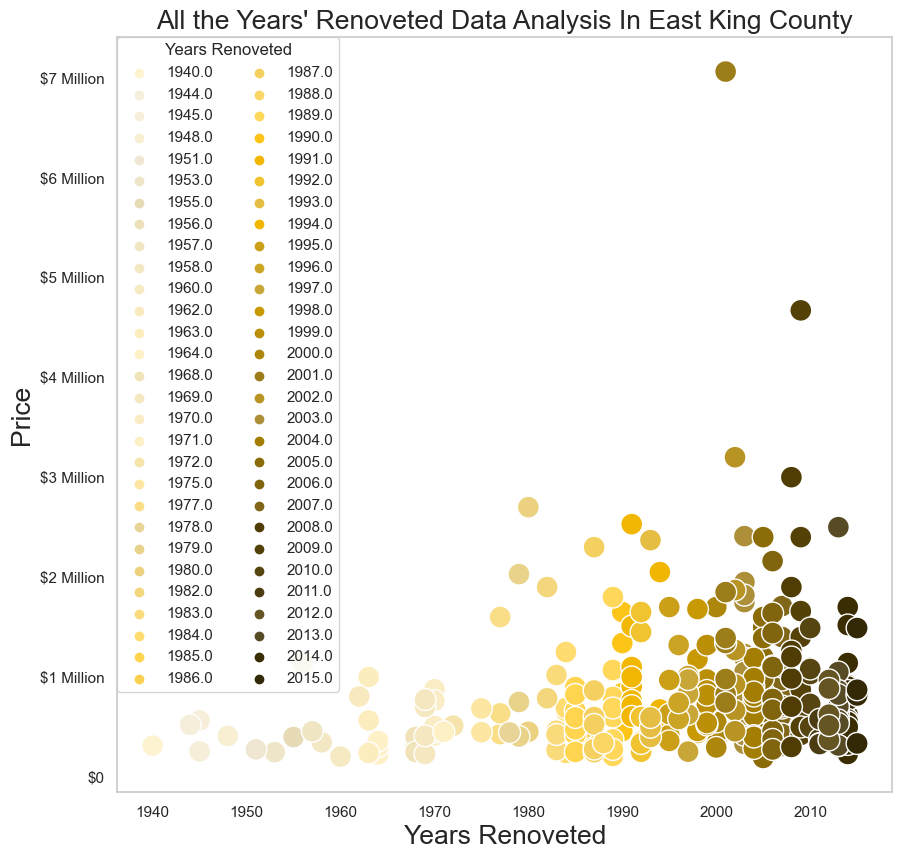

In [288]:
x = regressiondata5[6532:]['Year_Renoveted']
y = regressiondata5[6532:]['Price']
#plt.xticks(np.arange(1900,2000))
#sns.set_palette(flatui)
plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
ax = sns.scatterplot(data=re5, x=x, y=y,s=250, linewidth = 1,
                    hue='Year_Renoveted',palette=flatui)
plt.grid(linestyle='-', linewidth=0.2)
ax.set_title('All the Years\' Renoveted Data Analysis In East King County',size=19)
plt.xlabel("Years Renoveted", size=19)
plt.legend(title='Years Renoveted')
plt.ylabel("Price", size=19)
ax.set_yticklabels(['0','$0','$1 Million','$2 Million','$3 Million','$4 Million',
                         '$5 Million','$6 Million','$7 Million'])
plt.gcf().set_size_inches((10,10))
plt.legend( loc='upper left', borderaxespad=0,title="Years Renoveted",
          frameon=True, ncol=2)
xticks=ax.xaxis.get_major_ticks()
plt.show()

In [289]:
train_df, test_df = train_test_split(regressiondata5[6532:], test_size=0.10, shuffle=False)

In [290]:
X_train, y_train = train_df[['Year_Renoveted']], train_df[['Price']]
X_test, y_test = test_df[['Year_Renoveted']], test_df[['Price']]

In [291]:
classifiers = {}
for tau in [0.1, 0.5, 0.9]:
    clf = LGBMRegressor(objective='quantile', alpha=tau)
    clf.fit(X_train, y_train)
    preds = pd.DataFrame(clf.predict(X_test), columns = [str(tau)])
    classifiers[str(tau)] = {'clf': clf, 'predictions': preds}

In [292]:
Quantile_regression4 = pd.DataFrame({'Year_Renoveted': X_test.reset_index()['Year_Renoveted'],
              '0.1': classifiers['0.1']['predictions']['0.1'],
              '0.5': classifiers['0.5']['predictions']['0.5'],
              '0.9': classifiers['0.9']['predictions']['0.9'],
              'Price': y_test.reset_index()['Price']})

In [293]:
#Quantile_regression4 = Quantile_regression4.drop(range(0,277))
Quantile_regression4

Year_Renoveted            0.1            0.5           0.9      Price
0           1979.0  263411.414866  450359.936837  1.322038e+06  2030000.0
1           1977.0  263411.414866  450359.936837  1.322038e+06   428750.0
2           1977.0  263411.414866  450359.936837  1.322038e+06  1600000.0
3           1977.0  263411.414866  450359.936837  1.322038e+06   636100.0
4           1975.0  263411.414866  450359.936837  1.322038e+06   685000.0
5           1975.0  263411.414866  450359.936837  1.322038e+06   447500.0
6           1964.0  263411.414866  450359.936837  1.322038e+06   225000.0
7           1964.0  263411.414866  450359.936837  1.322038e+06   302100.0
8           1964.0  263411.414866  450359.936837  1.322038e+06   360000.0
9           1969.0  263411.414866  450359.936837  1.322038e+06   700000.0
10          1969.0  263411.414866  450359.936837  1.322038e+06   230000.0
11          1969.0  263411.414866  450359.936837  1.322038e+06   775000.0
12          1969.0  263411.414866  450359.936837  1.322038e+06   411500.0
13          1963.0  263411.414866  450359.936837  1.322038e+06  1000000.0
14          1963.0  263411.414866  450359.936837  1.322038e+06   240000.0
15          1963.0  263411.414866  450359.936837  1.322038e+06   565000.0
16          1945.0  263411.414866  450359.936837  1.322038e+06   565000.0
17          1945.0  263411.414866  450359.936837  1.322038e+06   256000.0
18          1955.0  263411.414866  450359.936837  1.322038e+06   399000.0
19          1958.0  263411.414866  450359.936837  1.322038e+06   346500.0
20          1972.0  263411.414866  450359.936837  1.322038e+06   512500.0
21          1978.0  263411.414866  450359.936837  1.322038e+06   445000.0
22          1960.0  263411.414866  450359.936837  1.322038e+06   203700.0
23          1956.0  263411.414866  450359.936837  1.322038e+06  1140000.0
24          1957.0  263411.414866  450359.936837  1.322038e+06   456700.0
25          1940.0  263411.414866  450359.936837  1.322038e+06   313300.0
26          1962.0  263411.414866  450359.936837  1.322038e+06   805000.0
27          1953.0  263411.414866  450359.936837  1.322038e+06   247500.0
28          1948.0  263411.414866  450359.936837  1.322038e+06   410000.0
29          1951.0  263411.414866  450359.936837  1.322038e+06   276000.0
30          1971.0  263411.414866  450359.936837  1.322038e+06   451555.0
31          1944.0  263411.414866  450359.936837  1.322038e+06   521000.0

In [294]:
melted_data5 = pd.melt(Quantile_regression4, id_vars=['Year_Renoveted'])
melted_data5 = melted_data5.drop(range(96,128))
melted_data5 = melted_data5.rename(columns={'variable': 'Percentile'})
melted_data5

Year_Renoveted Percentile         value
0           1979.0        0.1  2.634114e+05
1           1977.0        0.1  2.634114e+05
2           1977.0        0.1  2.634114e+05
3           1977.0        0.1  2.634114e+05
4           1975.0        0.1  2.634114e+05
..             ...        ...           ...
91          1953.0        0.9  1.322038e+06
92          1948.0        0.9  1.322038e+06
93          1951.0        0.9  1.322038e+06
94          1971.0        0.9  1.322038e+06
95          1944.0        0.9  1.322038e+06

[96 rows x 3 columns]

2021-08-24 12:47:55,813 [19516] WARNING  py.warnings:109: [JupyterRequire] <ipython-input-295-83f9f04c702d>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$400,000','$600,000','$800,000','$1 Million','1.2 Million'])



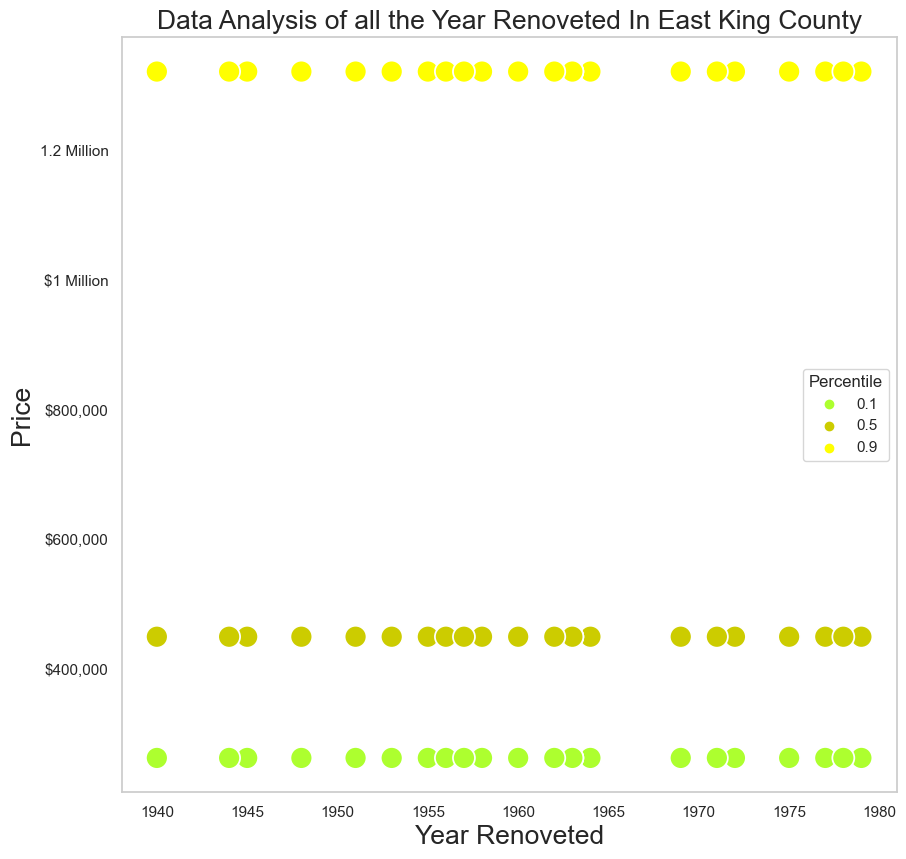

In [295]:
plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
flatui = ["#ADFF2F","#CCCC00","#FFFF00"]
ax =sns.scatterplot(data=melted_data5, x="Year_Renoveted",y='value',s=250,palette=flatui,
                    hue='Percentile')          
plt.grid(linestyle='-', linewidth=0.2)
ax.set_title('Data Analysis of all the Year Renoveted In East King County',size=19)
plt.xlabel("Year Renoveted'", size=19)
plt.ylabel("Price", size=19)
ax.set_yticklabels(['0','$400,000','$600,000','$800,000','$1 Million','1.2 Million'])
ylabel = plt.ylabel("Price")
xlabel = plt.xlabel("Year Renoveted")
plt.gcf().set_size_inches((10,10))

2021-08-24 12:47:58,302 [19516] WARNING  py.warnings:109: [JupyterRequire] <ipython-input-296-1a51d4f929d5>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$400,000','$600,000','$800,000','$1 Million','1.2 Million'])



[Text(0, 200000.0, '0'),
 Text(0, 400000.0, '$400,000'),
 Text(0, 600000.0, '$600,000'),
 Text(0, 800000.0, '$800,000'),
 Text(0, 1000000.0, '$1 Million'),
 Text(0, 1200000.0, '1.2 Million'),
 Text(0, 1400000.0, '')]

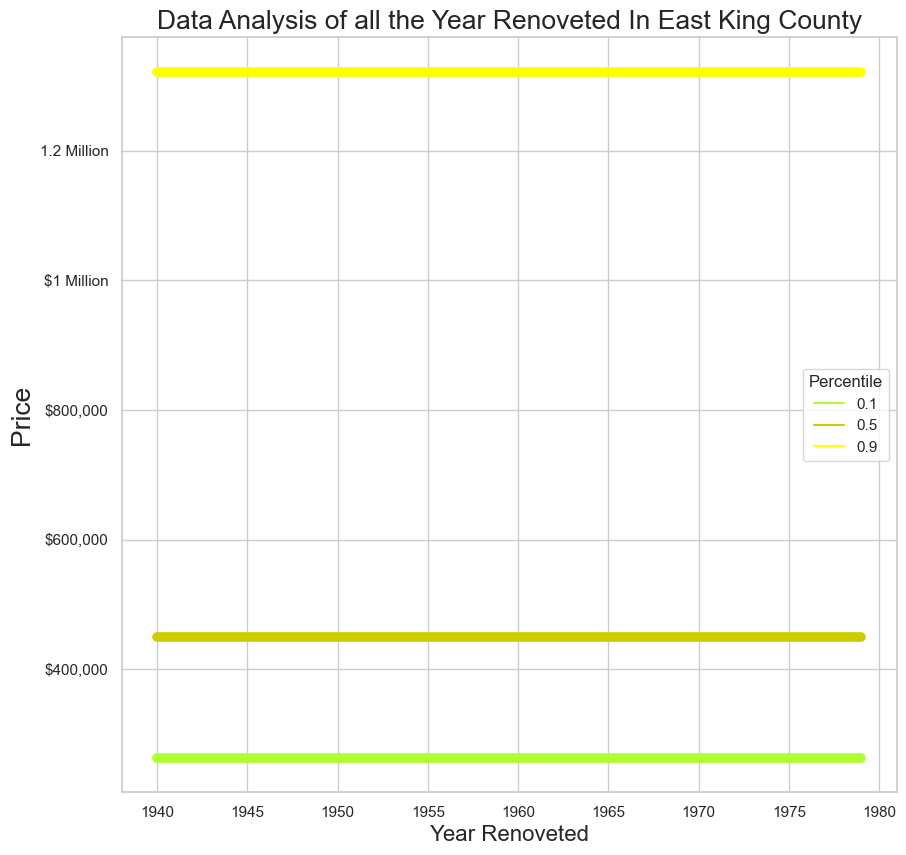

In [296]:
sns.set_style("whitegrid")
flatui = ["#ADFF2F","#CCCC00","#FFFF00"]
ax=sns.lineplot( data=melted_data5, x="Year_Renoveted",y="value",
                linewidth = 7,palette=flatui,hue='Percentile')
plt.gcf().set_size_inches((10,10))
ax.set_title('Data Analysis of all the Year Renoveted In East King County',size=19)
plt.legend(title='Percentile')
plt.xlabel("Year Renoveted", size=16)
plt.ylabel("Price", size=19)
ax.set_yticklabels(['0','$400,000','$600,000','$800,000','$1 Million','1.2 Million'])

In [297]:
(Quantile_regression4['Price'] > Quantile_regression4['0.1']).value_counts()

True     26
False     6
dtype: int64

In [298]:
i = 0
y= 0
x = []
while i < 26:
    x.append('How Many Times The Prediction Was Right')
    i+=1
while y < 6:
    x.append('How Many Times The Prediction Was Wrong')
    y+=1
len(x)
df1 = pd.DataFrame({'Prediction Accuracy':x})

In [299]:
(Quantile_regression4['Price'] > Quantile_regression4['0.5']).value_counts()

False    17
True     15
dtype: int64

In [300]:
i = 0
y= 0
x = []
while i < 17:
    x.append('How Many Times The Prediction Was Right')
    i+=1
while y < 15:
    x.append('How Many Times The Prediction Was Wrong')
    y+=1
len(x)
df2 = pd.DataFrame({'Prediction Accuracy':x})

In [301]:
(Quantile_regression4['Price'] > Quantile_regression4['0.9']).value_counts()

False    30
True      2
dtype: int64

In [302]:
i = 0
y= 0
x = []
while i < 30:
    x.append('How Many Times The Prediction Was Right')
    i+=1
while y < 2:
    x.append('How Many Times The Prediction Was Wrong')
    y+=1
len(x)
df3 = pd.DataFrame({'Prediction Accuracy':x})

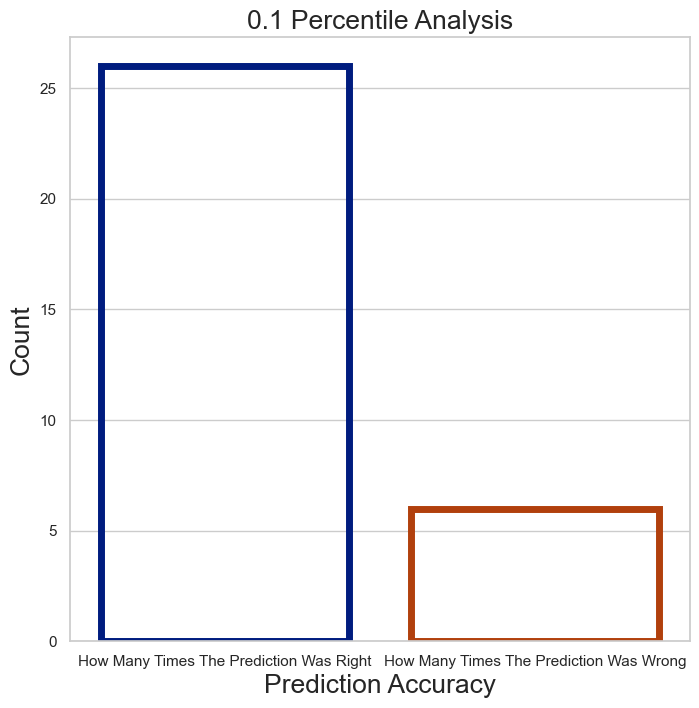

In [303]:
sns.set_style("whitegrid")
plt.gcf().set_size_inches((8,8))
ax = sns.countplot(x="Prediction Accuracy", data=df1,
                   palette=flatui,
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))
ax.set_title('0.1 Percentile Analysis',size=19)
plt.xlabel("Prediction Accuracy", size=19)
plt.ylabel("Count", size=19)
plt.show()

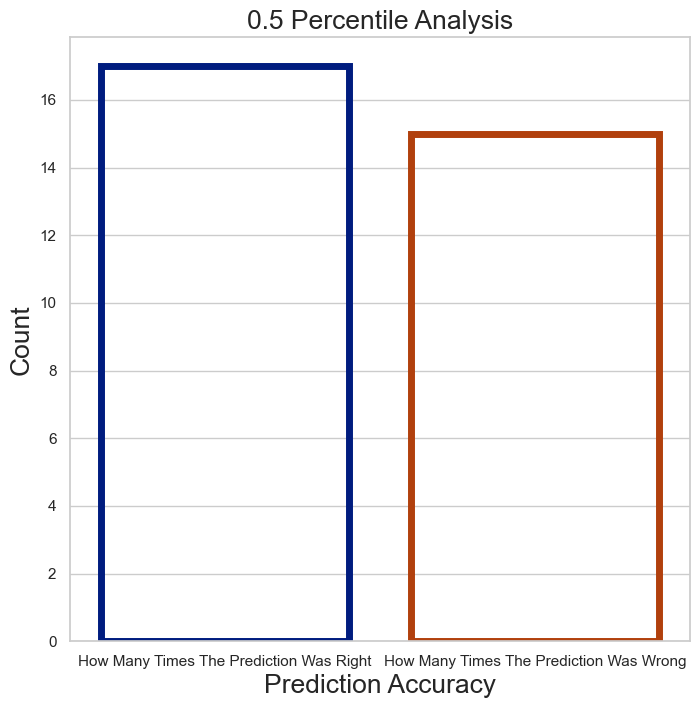

In [304]:
sns.set_style("whitegrid")
plt.gcf().set_size_inches((8,8))
ax = sns.countplot(x="Prediction Accuracy", data=df2,
                   palette=flatui,
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))
ax.set_title('0.5 Percentile Analysis',size=19)
plt.xlabel("Prediction Accuracy", size=19)
plt.ylabel("Count", size=19)
plt.show()

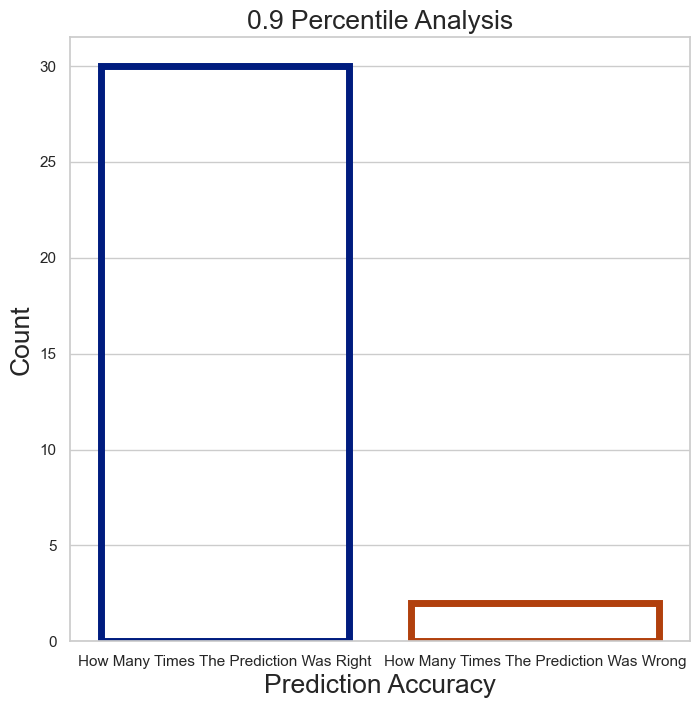

In [305]:
sns.set_style("whitegrid")
plt.gcf().set_size_inches((8,8))
ax = sns.countplot(x="Prediction Accuracy", data=df3,
                   palette=flatui,
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))
ax.set_title('0.9 Percentile Analysis',size=19)
plt.xlabel("Prediction Accuracy", size=19)
plt.ylabel("Count", size=19)
plt.show()

In [306]:
yr_renovated = []
for i in index2:
    yr_renovated.append(raw_info.yr_renovated[i])
len(yr_renovated)

8349

In [312]:
Predictions3 = []
for i in yr_renovated:
    if i == 'nan':Predictions3.append('$263,411 - $1,322,038')
    if i == 0 :Predictions3.append('$263,411 - $1,322,038')
    if i > 0 :Predictions3.append('$263,411 - $1,322,038')
len(Predictions3)

6850

In [313]:
for i in range(1499):
    Predictions3.append('$263,411 - $1,322,038')

In [314]:
Prediction4 = pd.DataFrame({'Year Renoveted':yr_renovated,
                           'Prediction':Predictions3,'Actual Price':price1})
Prediction4

Year Renoveted             Prediction Actual Price
0                0.0  $263,411 - $1,322,038     $221,900
1                0.0  $263,411 - $1,322,038     $604,000
2                0.0  $263,411 - $1,322,038     $229,500
3                0.0  $263,411 - $1,322,038     $650,000
4                0.0  $263,411 - $1,322,038     $395,000
...              ...                    ...          ...
8344             0.0  $263,411 - $1,322,038     $610,685
8345             0.0  $263,411 - $1,322,038   $1,010,000
8346             0.0  $263,411 - $1,322,038     $475,000
8347             0.0  $263,411 - $1,322,038     $400,000
8348             0.0  $263,411 - $1,322,038     $400,000

[8349 rows x 3 columns]

In [315]:
%store Prediction4

Stored 'Prediction4' (DataFrame)


In [256]:
def CONDITION(LEVEL_CONDITION):
    
    locations = house_info['Location'].tolist()
    locationzip =raw_info.zipcode
    condition_level = house_info['Condition'].tolist()

    condition_index = []
    for i,x in enumerate(condition_level):
        if x == LEVEL_CONDITION:condition_index.append(i)
            
    for i,x in enumerate(raw_info.lat):
        if x == 47.618:index.append(i)
        if x == 47.528:index.append(i)
        if x == 47.502:index.append(i)  
        if x == 47.530:index.append(i)
        if x == 47.567:index.append(i)
        if x == 47.733:index.append(i)   
        if x == 47.648:index.append(i)
    
    zip_loca = []
    for i in index:zip_loca.append(locationzip[i]) 


    level_eastking = []
    for i  in condition_index:
        if locations[i] == zip_loca[0] : level_eastking.append(i)
        elif locations[i] == zip_loca[1] : level_eastking.append(i)
        elif locations[i] == zip_loca[2] : level_eastking.append(i)
        elif locations[i] == zip_loca[3] : level_eastking.append(i)
        elif locations[i] == zip_loca[4] : level_eastking.append(i)
        elif locations[i] == zip_loca[5] : level_eastking.append(i)
        elif locations[i] == zip_loca[6] : level_eastking.append(i)
        elif locations[i] == zip_loca[7]: level_eastking.append(i)
        elif locations[i] == zip_loca[8] : level_eastking.append(i)
        elif locations[i] == zip_loca[9] : level_eastking.append(i)
        elif locations[i] == zip_loca[10] : level_eastking.append(i)
        elif locations[i] == zip_loca[11] : level_eastking.append(i)
        elif locations[i] == zip_loca[12]: level_eastking.append(i)
        elif locations[i] == zip_loca[13] : level_eastking.append(i)
        elif locations[i] == zip_loca[14] : level_eastking.append(i)
        elif locations[i] == zip_loca[15] : level_eastking.append(i)
        elif locations[i] == zip_loca[16]: level_eastking.append(i)
        elif locations[i] == zip_loca[17] : level_eastking.append(i)
        elif locations[i] == zip_loca[18]: level_eastking.append(i)
        elif locations[i] == zip_loca[19] : level_eastking.append(i)
        elif locations[i] == zip_loca[20]: level_eastking.append(i)
        elif locations[i] == zip_loca[21] : level_eastking.append(i)
        elif locations[i] == zip_loca[22] : level_eastking.append(i)
        elif locations[i] == zip_loca[23] : level_eastking.append(i)
        elif locations[i] == zip_loca[24] : level_eastking.append(i)
        elif locations[i] == zip_loca[25] : level_eastking.append(i)
        elif locations[i] == zip_loca[26] : level_eastking.append(i)
        elif locations[i] == zip_loca[27] : level_eastking.append(i)
        elif locations[i] == zip_loca[28]: level_eastking.append(i)
        elif locations[i] == zip_loca[29] : level_eastking.append(i)
        elif locations[i] == zip_loca[30] : level_eastking.append(i)
        elif locations[i] == zip_loca[31]: level_eastking.append(i)
        elif locations[i] == zip_loca[32] : level_eastking.append(i)
        elif locations[i] == zip_loca[33] : level_eastking.append(i)
        elif locations[i] == zip_loca[34] : level_eastking.append(i)
        elif locations[i] == zip_loca[35]: level_eastking.append(i)
        elif locations[i] == zip_loca[36] : level_eastking.append(i)
        elif locations[i] == zip_loca[37] : level_eastking.append(i)
        elif locations[i] == zip_loca[38] : level_eastking.append(i)
        elif locations[i] == zip_loca[39] : level_eastking.append(i)
        elif locations[i] == zip_loca[40] : level_eastking.append(i)
        elif locations[i] == zip_loca[41] : level_eastking.append(i)
        elif locations[i] == zip_loca[42] : level_eastking.append(i)
        elif locations[i] == zip_loca[43]: level_eastking.append(i)
        elif locations[i] == zip_loca[44] : level_eastking.append(i)
        elif locations[i] == zip_loca[45] : level_eastking.append(i)

    
    price = house_info["Price"].tolist()

    price_eastking = []
    for i in level_eastking:price_eastking.append(price[i])
    return(price_eastking)

condition_level = house_info["Condition"].value_counts().index.tolist()
level_eastking = []
for i in condition_level:
    level_eastking.append(CONDITION(i))
level_eastking= sum(level_eastking, [])
len(level_eastking)

11578

In [257]:
def AMOUNT_LEVEL(AMOUNT_LEVEL):
    locations = house_info['Location'].tolist()
    locationzip =raw_info.zipcode
    condtions = house_info["Condition"].tolist()
    X_value = []
    level_index = []
    for i,x in enumerate(condtions):
        if x == AMOUNT_LEVEL:level_index.append(i)
            
    for i,x in enumerate(raw_info.lat):
        if x == 47.618:index.append(i)
        if x == 47.528:index.append(i)
        if x == 47.502:index.append(i)  
        if x == 47.530:index.append(i)
        if x == 47.567:index.append(i)
        if x == 47.733:index.append(i)   
        if x == 47.648:index.append(i)
    
    zip_loca = []
    for i in index:zip_loca.append(locationzip[i]) 


    for i in level_index:
        if locations[i] == zip_loca[0] : X_value.append(AMOUNT_LEVEL)
        elif locations[i] == zip_loca[1]: X_value.append(AMOUNT_LEVEL)
        elif locations[i] == zip_loca[2] : X_value.append(AMOUNT_LEVEL)
        elif locations[i] == zip_loca[3] : X_value.append(AMOUNT_LEVEL)
        elif locations[i] == zip_loca[4] : X_value.append(AMOUNT_LEVEL)
        elif locations[i] == zip_loca[5]: X_value.append(AMOUNT_LEVEL)
        elif locations[i] == zip_loca[6] : X_value.append(AMOUNT_LEVEL)
        elif locations[i] == zip_loca[7]: X_value.append(AMOUNT_LEVEL)
        elif locations[i] == zip_loca[8] : X_value.append(AMOUNT_LEVEL)
        elif locations[i] == zip_loca[9]: X_value.append(AMOUNT_LEVEL)
        elif locations[i] == zip_loca[10] : X_value.append(AMOUNT_LEVEL)
        elif locations[i] == zip_loca[11] : X_value.append(AMOUNT_LEVEL)
        elif locations[i] == zip_loca[12] : X_value.append(AMOUNT_LEVEL)
        elif locations[i] == zip_loca[13]: X_value.append(AMOUNT_LEVEL)
        elif locations[i] == zip_loca[14] : X_value.append(AMOUNT_LEVEL)
        elif locations[i] == zip_loca[15]: X_value.append(AMOUNT_LEVEL)
        elif locations[i] == zip_loca[16] : X_value.append(AMOUNT_LEVEL)
        elif locations[i] == zip_loca[17]: X_value.append(AMOUNT_LEVEL)
        elif locations[i] == zip_loca[18] : X_value.append(AMOUNT_LEVEL)
        elif locations[i] == zip_loca[19] : X_value.append(AMOUNT_LEVEL)
        elif locations[i] == zip_loca[20] : X_value.append(AMOUNT_LEVEL)
        elif locations[i] == zip_loca[21]: X_value.append(AMOUNT_LEVEL)
        elif locations[i] == zip_loca[22] : X_value.append(AMOUNT_LEVEL)
        elif locations[i] == zip_loca[23]: X_value.append(AMOUNT_LEVEL)
        elif locations[i] == zip_loca[24] : X_value.append(AMOUNT_LEVEL)
        elif locations[i] == zip_loca[25] : X_value.append(AMOUNT_LEVEL)
        elif locations[i] == zip_loca[26]: X_value.append(AMOUNT_LEVEL)
        elif locations[i] == zip_loca[27] : X_value.append(AMOUNT_LEVEL)
        elif locations[i] == zip_loca[28]: X_value.append(AMOUNT_LEVEL)
        elif locations[i] == zip_loca[29] : X_value.append(AMOUNT_LEVEL)
        elif locations[i] == zip_loca[30]: X_value.append(AMOUNT_LEVEL)
        elif locations[i] == zip_loca[31] : X_value.append(AMOUNT_LEVEL)
        elif locations[i] == zip_loca[32] : X_value.append(AMOUNT_LEVEL)
        elif locations[i] == zip_loca[33] : X_value.append(AMOUNT_LEVEL)
        elif locations[i] == zip_loca[34]: X_value.append(AMOUNT_LEVEL)
        elif locations[i] == zip_loca[35] : X_value.append(AMOUNT_LEVEL)
        elif locations[i] == zip_loca[36]: X_value.append(AMOUNT_LEVEL)
        elif locations[i] == zip_loca[37] : X_value.append(AMOUNT_LEVEL)
        elif locations[i] == zip_loca[38] : X_value.append(AMOUNT_LEVEL)
        elif locations[i] == zip_loca[39] : X_value.append(AMOUNT_LEVEL)
        elif locations[i] == zip_loca[40]: X_value.append(AMOUNT_LEVEL)
        elif locations[i] == zip_loca[41] : X_value.append(AMOUNT_LEVEL)
        elif locations[i] == zip_loca[42]: X_value.append(AMOUNT_LEVEL)
        elif locations[i] == zip_loca[43] : X_value.append(AMOUNT_LEVEL)
        elif locations[i] == zip_loca[44]: X_value.append(AMOUNT_LEVEL)
        elif locations[i] == zip_loca[45] : X_value.append(AMOUNT_LEVEL)
    return X_value
level = house_info["Condition"].value_counts().index.tolist()
condtition_level_eastking = []
for i in level:
    condtition_level_eastking.append(AMOUNT_LEVEL(i))
condtition_level_eastking= sum(condtition_level_eastking, [])
len(condtition_level_eastking)

11578

In [258]:
regressiondata6 = pd.DataFrame({'Condition_Level':condtition_level_eastking,
                                'Price':level_eastking})
regressiondata6

Condition_Level      Price
0                    3   538000.0
1                    3  1230000.0
2                    3   257500.0
3                    3   291850.0
4                    3   229500.0
...                ...        ...
11573                1   432500.0
11574                1    78000.0
11575                1    81000.0
11576                1   380000.0
11577                1   575000.0

[11578 rows x 2 columns]

<ipython-input-670-50d39024307d>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$0','$1 Million','$2 Million',


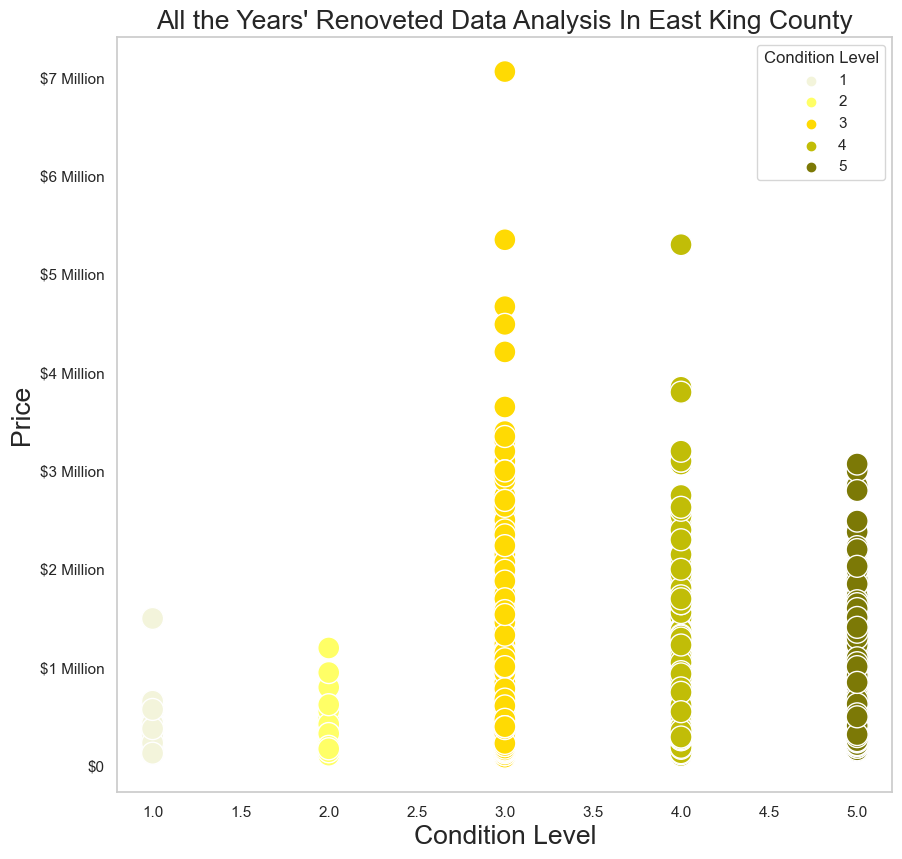

In [670]:
flatui = ['#F3F4DB','#FFFF66','#FFDA03','#c1bd07','#7c7906',]

x = regressiondata6['Condition_Level']
y = regressiondata6['Price']
plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
ax = sns.scatterplot(data=regressiondata6, x=x, y=y,s=250, linewidth = 1,
                    hue='Condition_Level',palette=flatui)
plt.grid(linestyle='-', linewidth=0.2)
ax.set_title('All the Years\' Renoveted Data Analysis In East King County',size=19)
plt.xlabel("Condition Level", size=19)
plt.legend(title='Condition Level')
plt.ylabel("Price", size=19)
ax.set_yticklabels(['0','$0','$1 Million','$2 Million',
                    '$3 Million','$4 Million','$5 Million','$6 Million','$7 Million'])
plt.gcf().set_size_inches((10,10))
xticks=ax.xaxis.get_major_ticks()
plt.show()

In [696]:
train_df, test_df = train_test_split(regressiondata6, test_size=0.10, shuffle=False)

In [697]:
X_train, y_train = train_df[['Condition_Level']], train_df[['Price']]
X_test, y_test = test_df[['Condition_Level']], test_df[['Price']]

In [698]:
classifiers = {}
for tau in [0.1, 0.5, 0.9]:
    clf = LGBMRegressor(objective='quantile', alpha=tau)
    clf.fit(X_train, y_train)
    preds = pd.DataFrame(clf.predict(X_test), columns = [str(tau)])
    classifiers[str(tau)] = {'clf': clf, 'predictions': preds}

In [699]:
Quantile_regression5 = pd.DataFrame({'Condition_Level': X_test.reset_index()['Condition_Level'],
              '0.1': classifiers['0.1']['predictions']['0.1'],
              '0.5': classifiers['0.5']['predictions']['0.5'],
              '0.9': classifiers['0.9']['predictions']['0.9'],
              'Price': y_test.reset_index()['Price']})
Quantile_regression5

Condition_Level            0.1            0.5            0.9      Price
0                  4  299999.649924  524999.814070  990999.632206   325000.0
1                  4  299999.649924  524999.814070  990999.632206   427500.0
2                  4  299999.649924  524999.814070  990999.632206   450000.0
3                  4  299999.649924  524999.814070  990999.632206  1320000.0
4                  4  299999.649924  524999.814070  990999.632206   329950.0
..               ...            ...            ...            ...        ...
830                1  280000.181152  515000.079684  980000.015932   658000.0
831                1  280000.181152  515000.079684  980000.015932   380000.0
832                1  280000.181152  515000.079684  980000.015932   130000.0
833                1  280000.181152  515000.079684  980000.015932   575000.0
834                1  280000.181152  515000.079684  980000.015932  1500000.0

[835 rows x 5 columns]

In [713]:
row_df = pd.DataFrame({'Condition_Level':[3],'0.1':[299999.649924],'0.5':[524999.814070],
                       '0.9':[990999.632206]
                       ,'Price':[0]})
Quantile_regression5 = pd.concat([row_df, Quantile_regression5], ignore_index=True)
Quantile_regression5

Condition_Level            0.1            0.5            0.9      Price
0                  3  299999.649924  524999.814070  990999.632206        0.0
1                  4  299999.649924  524999.814070  990999.632206   325000.0
2                  4  299999.649924  524999.814070  990999.632206   427500.0
3                  4  299999.649924  524999.814070  990999.632206   450000.0
4                  4  299999.649924  524999.814070  990999.632206  1320000.0
..               ...            ...            ...            ...        ...
831                1  280000.181152  515000.079684  980000.015932   658000.0
832                1  280000.181152  515000.079684  980000.015932   380000.0
833                1  280000.181152  515000.079684  980000.015932   130000.0
834                1  280000.181152  515000.079684  980000.015932   575000.0
835                1  280000.181152  515000.079684  980000.015932  1500000.0

[836 rows x 5 columns]

In [716]:
melted_data6 = pd.melt(Quantile_regression5, id_vars=['Condition_Level'])
#melted_data6 = melted_data6.drop(range(22545,30060))#0.9
melted_data6 = melted_data6.drop(range(2508,3344))
melted_data6 = melted_data6.rename(columns={'variable': 'Percentile'})
melted_data6

Condition_Level Percentile          value
0                   3        0.1  299999.649924
1                   4        0.1  299999.649924
2                   4        0.1  299999.649924
3                   4        0.1  299999.649924
4                   4        0.1  299999.649924
...               ...        ...            ...
2503                1        0.9  980000.015932
2504                1        0.9  980000.015932
2505                1        0.9  980000.015932
2506                1        0.9  980000.015932
2507                1        0.9  980000.015932

[2508 rows x 3 columns]

<ipython-input-720-11ade7e50301>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$300,000','$400,000','$500,000','$600,000','$700,000','$800,000',


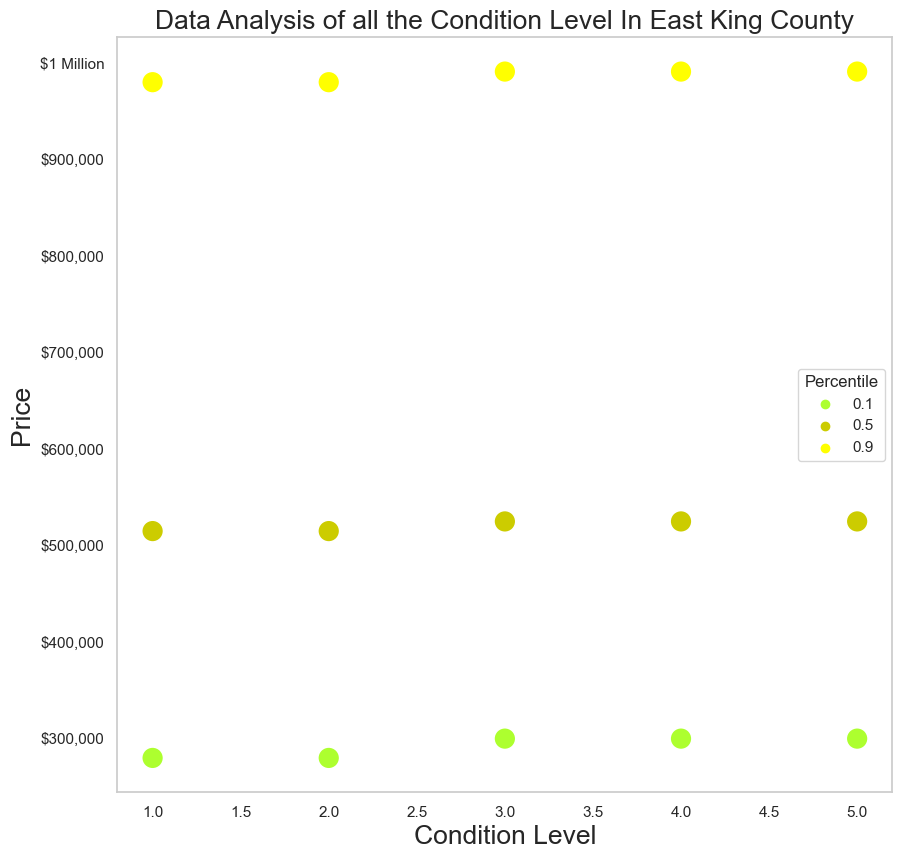

In [720]:
plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
flatui = ["#ADFF2F","#CCCC00","#FFFF00"]
ax =sns.scatterplot(data=melted_data6, x="Condition_Level",y='value',s=250,palette=flatui,
                    hue='Percentile')          
plt.grid(linestyle='-', linewidth=0.2)
ax.set_title('Data Analysis of all the Condition Level In East King County',size=19)
plt.xlabel("Condition Level", size=19)
plt.ylabel("Price", size=19)
ax.set_yticklabels(['0','$300,000','$400,000','$500,000','$600,000','$700,000','$800,000',
                    '$900,000','$1 Million'])
ylabel = plt.ylabel("Price")
xlabel = plt.xlabel("Condition Level")
plt.gcf().set_size_inches((10,10))

<ipython-input-718-0d48b1b91d54>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$300,000','$400,000','$500,000','$600,000','$700,000','$800,000',


[Text(0, 200000.0, '0'),
 Text(0, 300000.0, '$300,000'),
 Text(0, 400000.0, '$400,000'),
 Text(0, 500000.0, '$500,000'),
 Text(0, 600000.0, '$600,000'),
 Text(0, 700000.0, '$700,000'),
 Text(0, 800000.0, '$800,000'),
 Text(0, 900000.0, '$900,000'),
 Text(0, 1000000.0, '$1 Million'),
 Text(0, 1100000.0, '')]

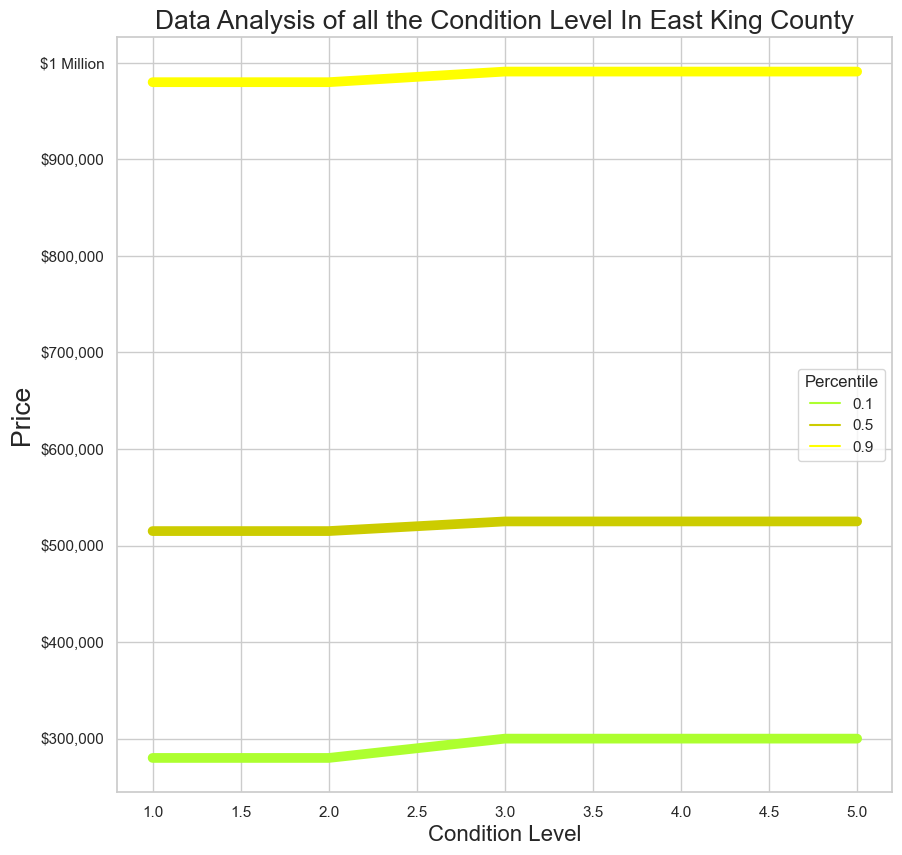

In [718]:
sns.set_style("whitegrid")
flatui = ["#ADFF2F","#CCCC00","#FFFF00"]
ax=sns.lineplot( data=melted_data6, x="Condition_Level",y="value",
                linewidth = 7,palette=flatui,hue='Percentile')
plt.gcf().set_size_inches((10,10))
ax.set_title('Data Analysis of all the Condition Level In East King County',size=19)
plt.legend(title='Percentile')
plt.xlabel("Condition Level", size=16)
plt.ylabel("Price", size=19)
ax.set_yticklabels(['0','$300,000','$400,000','$500,000','$600,000','$700,000','$800,000',
                    '$900,000','$1 Million'])

In [721]:
(Quantile_regression5['Price'] > Quantile_regression5['0.1']).value_counts()

True     711
False    125
dtype: int64

In [726]:
i = 0
y= 0
x = []
while i < 711:
    x.append('How Many Times The Prediction Was Right')
    i+=1
while y < 125:
    x.append('How Many Times The Prediction Was Wrong')
    y+=1
len(x)
df1 = pd.DataFrame({'Prediction Accuracy':x})

In [722]:
(Quantile_regression5['Price'] > Quantile_regression5['0.5']).value_counts()

False    434
True     402
dtype: int64

In [725]:
i = 0
y= 0
x = []
while i < 434:
    x.append('How Many Times The Prediction Was Right')
    i+=1
while y < 402:
    x.append('How Many Times The Prediction Was Wrong')
    y+=1
len(x)
df2 = pd.DataFrame({'Prediction Accuracy':x})

In [723]:
(Quantile_regression5['Price'] > Quantile_regression5['0.9']).value_counts()

False    736
True     100
dtype: int64

In [724]:
i = 0
y= 0
x = []
while i < 736:
    x.append('How Many Times The Prediction Was Right')
    i+=1
while y < 100:
    x.append('How Many Times The Prediction Was Wrong')
    y+=1
len(x)
df3 = pd.DataFrame({'Prediction Accuracy':x})

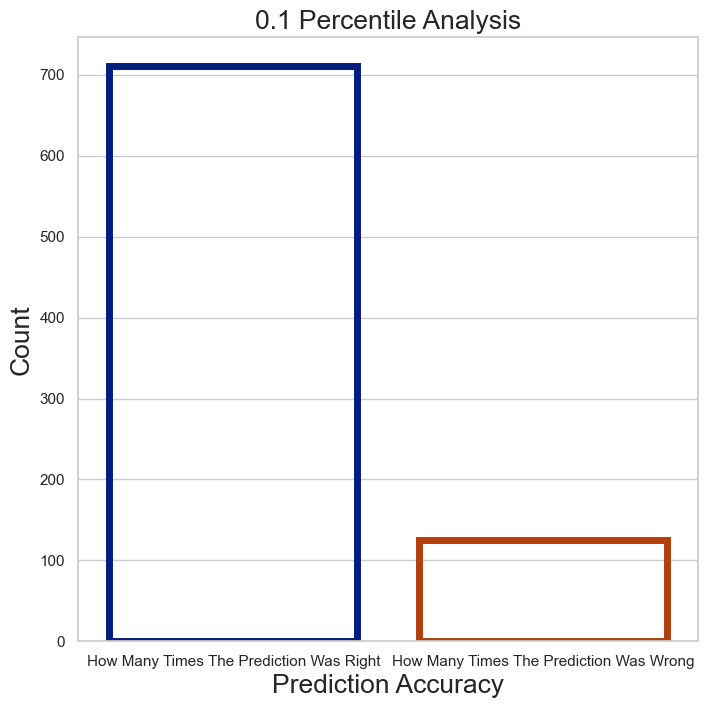

In [727]:
sns.set_style("whitegrid")
plt.gcf().set_size_inches((8,8))
ax = sns.countplot(x="Prediction Accuracy", data=df1,
                   palette=flatui,
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))
ax.set_title('0.1 Percentile Analysis',size=19)
plt.xlabel("Prediction Accuracy", size=19)
plt.ylabel("Count", size=19)
plt.show()

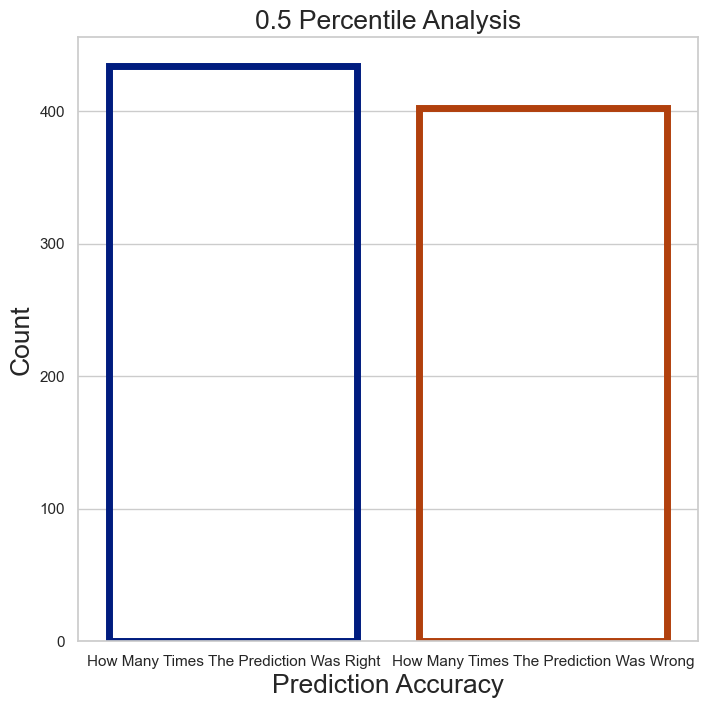

In [728]:
sns.set_style("whitegrid")
plt.gcf().set_size_inches((8,8))
ax = sns.countplot(x="Prediction Accuracy", data=df2,
                   palette=flatui,
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))
ax.set_title('0.5 Percentile Analysis',size=19)
plt.xlabel("Prediction Accuracy", size=19)
plt.ylabel("Count", size=19)
plt.show()

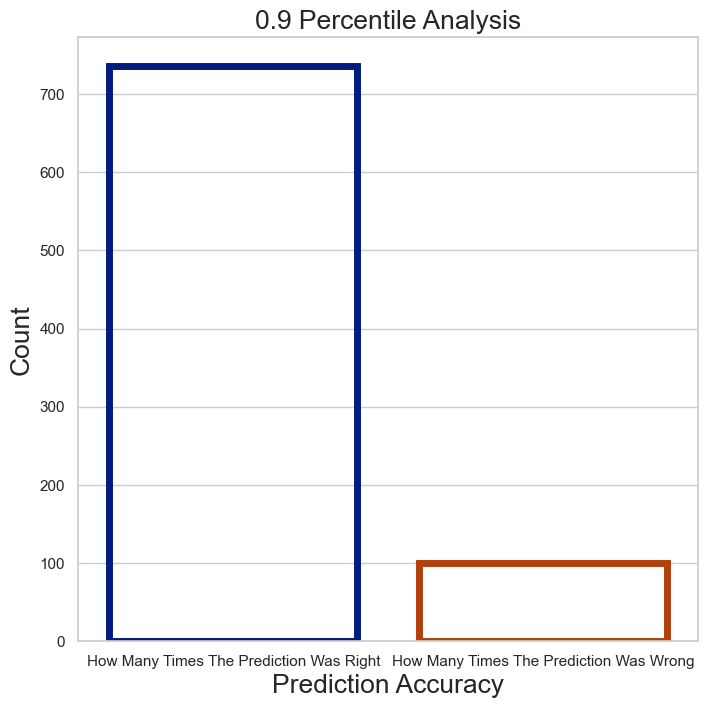

In [729]:
sns.set_style("whitegrid")
plt.gcf().set_size_inches((8,8))
ax = sns.countplot(x="Prediction Accuracy", data=df3,
                   palette=flatui,
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))
ax.set_title('0.9 Percentile Analysis',size=19)
plt.xlabel("Prediction Accuracy", size=19)
plt.ylabel("Count", size=19)
plt.show()

In [316]:
condition = []
for i in index2:
    condition.append(raw_info.condition[i])
len(condition)

8349

In [321]:
Predictions5 = []
for i in condition:
    if i == 1:Predictions5.append('$280,000 - $980,000') 
    if i == 2:Predictions5.append('$280,000 - $980,000') 
    if i == 3:Predictions5.append('$299,999 - $990,999')
    if i == 4:Predictions5.append('$299,999 - $990,999') 
    if i == 5: Predictions5.append('$299,999 - $990,999')
len(Predictions5)

8349

In [322]:
Prediction5 = pd.DataFrame({'Condition Level':condition,
                           'Prediction':Predictions5,'Actual Price':price1})
Prediction5

Condition Level           Prediction Actual Price
0                   3  $299,999 - $990,999     $221,900
1                   5  $299,999 - $990,999     $604,000
2                   3  $299,999 - $990,999     $229,500
3                   3  $299,999 - $990,999     $650,000
4                   3  $299,999 - $990,999     $395,000
...               ...                  ...          ...
8344                3  $299,999 - $990,999     $610,685
8345                3  $299,999 - $990,999   $1,010,000
8346                3  $299,999 - $990,999     $475,000
8347                3  $299,999 - $990,999     $400,000
8348                3  $299,999 - $990,999     $400,000

[8349 rows x 3 columns]

In [324]:
%store Prediction5

Stored 'Prediction5' (DataFrame)


In [263]:
def SQFT_LIVING(SQFT_LIVINGS):
    
    locations = house_info['Location'].tolist()
    locationzip =raw_info.zipcode
    sqft_living = house_info['Sqft_living'].tolist()
    index = []
    for i,x in enumerate(raw_info.lat):
        if x == 47.618:index.append(i)
        if x == 47.528:index.append(i)
        if x == 47.502:index.append(i)  
        if x == 47.530:index.append(i)
        if x == 47.567:index.append(i)
        if x == 47.733:index.append(i)   
        if x == 47.648:index.append(i)
    
    zip_loca = []
    for i in index:zip_loca.append(locationzip[i]) 
        
    living_index = []
    for i,x in enumerate(sqft_living):
        if x == SQFT_LIVINGS:living_index.append(i)

    living_eastking = []
    for i in living_index:
        if locations[i] == zip_loca[0] : living_eastking.append(i)
        elif locations[i] == zip_loca[1] : living_eastking.append(i)
        elif locations[i] == zip_loca[2] : living_eastking.append(i)
        elif locations[i] == zip_loca[3] : living_eastking.append(i)
        elif locations[i] == zip_loca[4] : living_eastking.append(i)
        elif locations[i] == zip_loca[5] : living_eastking.append(i)
        elif locations[i] == zip_loca[6] : living_eastking.append(i)
        elif locations[i] == zip_loca[7]: living_eastking.append(i)
        elif locations[i] == zip_loca[8] : living_eastking.append(i)
        elif locations[i] == zip_loca[9] : living_eastking.append(i)
        elif locations[i] == zip_loca[10] : living_eastking.append(i)
        elif locations[i] == zip_loca[11] : living_eastking.append(i)
        elif locations[i] == zip_loca[12]: living_eastking.append(i)
        elif locations[i] == zip_loca[13] : living_eastking.append(i)
        elif locations[i] == zip_loca[14] : living_eastking.append(i)
        elif locations[i] == zip_loca[15] : living_eastking.append(i)
        elif locations[i] == zip_loca[16]: living_eastking.append(i)
        elif locations[i] == zip_loca[17] : living_eastking.append(i)
        elif locations[i] == zip_loca[18]: living_eastking.append(i)
        elif locations[i] == zip_loca[19] : living_eastking.append(i)
        elif locations[i] == zip_loca[20]: living_eastking.append(i)
        elif locations[i] == zip_loca[21] : living_eastking.append(i)
        elif locations[i] == zip_loca[22] : living_eastking.append(i)
        elif locations[i] == zip_loca[23] : living_eastking.append(i)
        elif locations[i] == zip_loca[24] : living_eastking.append(i)
        elif locations[i] == zip_loca[25] : living_eastking.append(i)
        elif locations[i] == zip_loca[26] : living_eastking.append(i)
        elif locations[i] == zip_loca[27] : living_eastking.append(i)
        elif locations[i] == zip_loca[28]: living_eastking.append(i)
        elif locations[i] == zip_loca[29] : living_eastking.append(i)
        elif locations[i] == zip_loca[30] : living_eastking.append(i)
        elif locations[i] == zip_loca[31]: living_eastking.append(i)
        elif locations[i] == zip_loca[32] : living_eastking.append(i)
        elif locations[i] == zip_loca[33] : living_eastking.append(i)
        elif locations[i] == zip_loca[34] : living_eastking.append(i)
        elif locations[i] == zip_loca[35]: living_eastking.append(i)
        elif locations[i] == zip_loca[36] : living_eastking.append(i)
        elif locations[i] == zip_loca[37] : living_eastking.append(i)
        elif locations[i] == zip_loca[38] : living_eastking.append(i)
        elif locations[i] == zip_loca[39] : living_eastking.append(i)
        elif locations[i] == zip_loca[40] : living_eastking.append(i)
        elif locations[i] == zip_loca[41] : living_eastking.append(i)
        elif locations[i] == zip_loca[42] : living_eastking.append(i)
        elif locations[i] == zip_loca[43]: living_eastking.append(i)
        elif locations[i] == zip_loca[44] : living_eastking.append(i)
        elif locations[i] == zip_loca[45] : living_eastking.append(i)


    price = house_info["Price"].tolist()

    price_eastking = []
    for i in living_eastking:price_eastking.append(price[i])
    return(price_eastking)

no_of_sqft_living = house_info["Sqft_living"].value_counts().index.tolist()
price_living_eastking = []
for i in no_of_sqft_living:
    price_living_eastking.append(SQFT_LIVING(i))
price_living_eastking= sum(price_living_eastking, [])
len(price_living_eastking)

8349

In [264]:
def AMOUNT_LIVING(AMOUNT_LIVINGS):
    locations = house_info['Location'].tolist()
    locationzip =raw_info.zipcode
    sqft_living = house_info['Sqft_living'].tolist()
    X_value = []
    living_index = []
    
    index = []
    for i,x in enumerate(raw_info.lat):
        if x == 47.618:index.append(i)
        if x == 47.528:index.append(i)
        if x == 47.502:index.append(i)  
        if x == 47.530:index.append(i)
        if x == 47.567:index.append(i)
        if x == 47.733:index.append(i)   
        if x == 47.648:index.append(i)
    
    zip_loca = []
    for i in index:zip_loca.append(locationzip[i])
        
    for i,x in enumerate(sqft_living):
        if x == AMOUNT_LIVINGS:living_index.append(i)

    for i in living_index:
        if locations[i] == zip_loca[0] : X_value.append(AMOUNT_LIVINGS)
        elif locations[i] == zip_loca[1]: X_value.append(AMOUNT_LIVINGS)
        elif locations[i] == zip_loca[2] : X_value.append(AMOUNT_LIVINGS)
        elif locations[i] == zip_loca[3] : X_value.append(AMOUNT_LIVINGS)
        elif locations[i] == zip_loca[4] : X_value.append(AMOUNT_LIVINGS)
        elif locations[i] == zip_loca[5]: X_value.append(AMOUNT_LIVINGS)
        elif locations[i] == zip_loca[6] : X_value.append(AMOUNT_LIVINGS)
        elif locations[i] == zip_loca[7]: X_value.append(AMOUNT_LIVINGS)
        elif locations[i] == zip_loca[8] : X_value.append(AMOUNT_LIVINGS)
        elif locations[i] == zip_loca[9]: X_value.append(AMOUNT_LIVINGS)
        elif locations[i] == zip_loca[10] : X_value.append(AMOUNT_LIVINGS)
        elif locations[i] == zip_loca[11] : X_value.append(AMOUNT_LIVINGS)
        elif locations[i] == zip_loca[12] : X_value.append(AMOUNT_LIVINGS)
        elif locations[i] == zip_loca[13]: X_value.append(AMOUNT_LIVINGS)
        elif locations[i] == zip_loca[14] : X_value.append(AMOUNT_LIVINGS)
        elif locations[i] == zip_loca[15]: X_value.append(AMOUNT_LIVINGS)
        elif locations[i] == zip_loca[16] : X_value.append(AMOUNT_LIVINGS)
        elif locations[i] == zip_loca[17]: X_value.append(AMOUNT_LIVINGS)
        elif locations[i] == zip_loca[18] : X_value.append(AMOUNT_LIVINGS)
        elif locations[i] == zip_loca[19] : X_value.append(AMOUNT_LIVINGS)
        elif locations[i] == zip_loca[20] : X_value.append(AMOUNT_LIVINGS)
        elif locations[i] == zip_loca[21]: X_value.append(AMOUNT_LIVINGS)
        elif locations[i] == zip_loca[22] : X_value.append(AMOUNT_LIVINGS)
        elif locations[i] == zip_loca[23]: X_value.append(AMOUNT_LIVINGS)
        elif locations[i] == zip_loca[24] : X_value.append(AMOUNT_LIVINGS)
        elif locations[i] == zip_loca[25] : X_value.append(AMOUNT_LIVINGS)
        elif locations[i] == zip_loca[26]: X_value.append(AMOUNT_LIVINGS)
        elif locations[i] == zip_loca[27] : X_value.append(AMOUNT_LIVINGS)
        elif locations[i] == zip_loca[28]: X_value.append(AMOUNT_LIVINGS)
        elif locations[i] == zip_loca[29] : X_value.append(AMOUNT_LIVINGS)
        elif locations[i] == zip_loca[30]: X_value.append(AMOUNT_LIVINGS)
        elif locations[i] == zip_loca[31] : X_value.append(AMOUNT_LIVINGS)
        elif locations[i] == zip_loca[32] : X_value.append(AMOUNT_LIVINGS)
        elif locations[i] == zip_loca[33] : X_value.append(AMOUNT_LIVINGS)
        elif locations[i] == zip_loca[34]: X_value.append(AMOUNT_LIVINGS)
        elif locations[i] == zip_loca[35] : X_value.append(AMOUNT_LIVINGS)
        elif locations[i] == zip_loca[36]: X_value.append(AMOUNT_LIVINGS)
        elif locations[i] == zip_loca[37] : X_value.append(AMOUNT_LIVINGS)
        elif locations[i] == zip_loca[38] : X_value.append(AMOUNT_LIVINGS)
        elif locations[i] == zip_loca[39] : X_value.append(AMOUNT_LIVINGS)
        elif locations[i] == zip_loca[40]: X_value.append(AMOUNT_LIVINGS)
        elif locations[i] == zip_loca[41] : X_value.append(AMOUNT_LIVINGS)
        elif locations[i] == zip_loca[42]: X_value.append(AMOUNT_LIVINGS)
        elif locations[i] == zip_loca[43] : X_value.append(AMOUNT_LIVINGS)
        elif locations[i] == zip_loca[44]: X_value.append(AMOUNT_LIVINGS)
        elif locations[i] == zip_loca[45] : X_value.append(AMOUNT_LIVINGS)
    return X_value
no_of_sqft_living = house_info["Sqft_living"].value_counts().index.tolist()
amount_living_eastking = []
for i in no_of_sqft_living:
    amount_living_eastking.append(AMOUNT_LIVING(i))
amount_living_eastking= sum(amount_living_eastking, [])
len(amount_living_eastking)

8349

In [265]:
regressiondata7 = pd.DataFrame({'Amount_of_sqft_living':amount_living_eastking,
                                'Price':price_living_eastking})
regressiondata7

Amount_of_sqft_living      Price
0                      1300   236000.0
1                      1300   378000.0
2                      1300   331000.0
3                      1300   445950.0
4                      1300   315500.0
...                     ...        ...
8344                   4133   979500.0
8345                   2134   611000.0
8346                   6260  1180000.0
8347                   2518   643000.0
8348                   6980  3100000.0

[8349 rows x 2 columns]

<ipython-input-26-59aeeb94eb63>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$0','$1 Million','$2 Million','$3 Million',


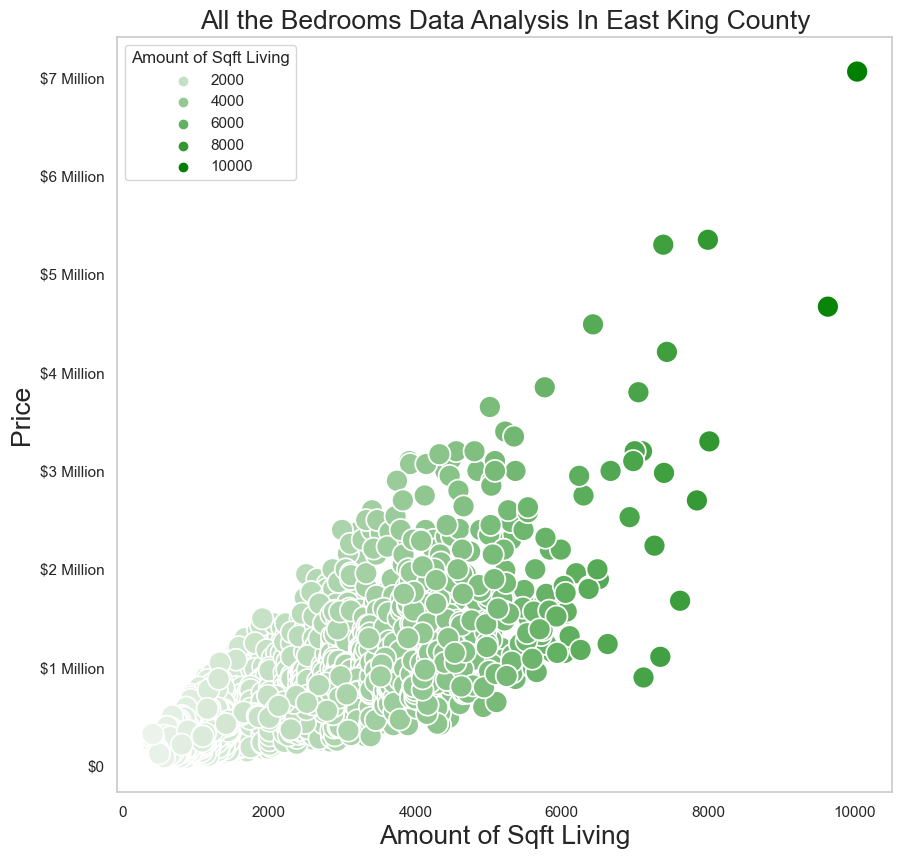

In [26]:
x = regressiondata7['Amount_of_sqft_living']
y = regressiondata7['Price']

sns.set(style='whitegrid')
cmap = sns.light_palette("green", as_cmap=True)

#sns.set_palette(flatui)
plt.rcParams.update({'font.size': 10, 'figure.dpi':100})

ax = sns.scatterplot(data=regressiondata7, x=x, y=y,s=250,hue='Amount_of_sqft_living',
                   palette=cmap )
plt.grid(linestyle='-', linewidth=0.2)
ax.set_title('All the Bedrooms Data Analysis In East King County',size=19)
plt.xlabel("Amount of Sqft Living", size=19)
plt.ylabel("Price", size=19)
plt.legend(title='Amount of Sqft Living')
plt.gcf().set_size_inches((10,10))
ax.set_yticklabels(['0','$0','$1 Million','$2 Million','$3 Million',
                 '$4 Million','$5 Million' ,'$6 Million','$7 Million'])
plt.show()

In [27]:
train_df, test_df = train_test_split(regressiondata7, test_size=0.10, shuffle=False)

In [28]:
X_train, y_train = train_df[['Amount_of_sqft_living']], train_df[['Price']]
X_test, y_test = test_df[['Amount_of_sqft_living']], test_df[['Price']]

In [29]:
classifiers = {}
for tau in [0.1, 0.5, 0.9]:
    clf = LGBMRegressor(objective='quantile', alpha=tau)
    clf.fit(X_train, y_train)
    preds = pd.DataFrame(clf.predict(X_test), columns = [str(tau)])
    classifiers[str(tau)] = {'clf': clf, 'predictions': preds}

In [30]:
Quantile_regression7 = pd.DataFrame({'Amount_of_sqft_living': X_test.reset_index()['Amount_of_sqft_living'],
              '0.1': classifiers['0.1']['predictions']['0.1'],
              '0.5': classifiers['0.5']['predictions']['0.5'],
              '0.9': classifiers['0.9']['predictions']['0.9'],
              'Price': y_test.reset_index()['Price']})
Quantile_regression7[100:]

Amount_of_sqft_living            0.1            0.5           0.9  \
100                   3730  710003.488280  979067.627346  1.514226e+06   
101                   3730  710003.488280  979067.627346  1.514226e+06   
102                   3730  710003.488280  979067.627346  1.514226e+06   
103                   3730  710003.488280  979067.627346  1.514226e+06   
104                   3730  710003.488280  979067.627346  1.514226e+06   
..                     ...            ...            ...           ...   
830                   4133  710003.488280  979067.627346  1.514226e+06   
831                   2134  361481.128438  554615.406960  8.423660e+05   
832                   6260  710003.488280  979067.627346  1.514226e+06   
833                   2518  442023.376089  615297.615979  9.243349e+05   
834                   6980  710003.488280  979067.627346  1.514226e+06   

         Price  
100  1560000.0  
101   775000.0  
102   690000.0  
103  2540000.0  
104  1260000.0  
..         ...  
830   979500.0  
831   611000.0  
832  1180000.0  
833   643000.0  
834  3100000.0  

[735 rows x 5 columns]

In [38]:
melted_data8 = pd.melt(Quantile_regression7, id_vars=['Amount_of_sqft_living'])
melted_data8 = melted_data8.drop(range(2505,3340 ))
melted_data8 = melted_data8.rename(columns={'variable': 'Percentile'})
melted_data8

Amount_of_sqft_living Percentile         value
0                      3830        0.1  7.100035e+05
1                      3550        0.1  6.299631e+05
2                      3550        0.1  6.299631e+05
3                      3550        0.1  6.299631e+05
4                      3550        0.1  6.299631e+05
...                     ...        ...           ...
2500                   4133        0.9  1.514226e+06
2501                   2134        0.9  8.423660e+05
2502                   6260        0.9  1.514226e+06
2503                   2518        0.9  9.243349e+05
2504                   6980        0.9  1.514226e+06

[2505 rows x 3 columns]

In [53]:
for x,i in enumerate(melted_data8.Amount_of_sqft_living):
    if 7000 <= i <= 8000:
        print(i,melted_data8.Percentile[x],melted_data8.value[x])

7100 0.1 710003.4882798983
7390 0.1 710003.4882798983
7000 0.1 710003.4882798983
7400 0.1 710003.4882798983
7120 0.1 710003.4882798983
7440 0.1 710003.4882798983
8000 0.1 710003.4882798983
7050 0.1 710003.4882798983
7850 0.1 710003.4882798983
7270 0.1 710003.4882798983
7350 0.1 710003.4882798983
7620 0.1 710003.4882798983
7100 0.5 979067.627345773
7390 0.5 979067.627345773
7000 0.5 979067.627345773
7400 0.5 979067.627345773
7120 0.5 979067.627345773
7440 0.5 979067.627345773
8000 0.5 979067.627345773
7050 0.5 979067.627345773
7850 0.5 979067.627345773
7270 0.5 979067.627345773
7350 0.5 979067.627345773
7620 0.5 979067.627345773
7100 0.9 1514226.2483533951
7390 0.9 1514226.2483533951
7000 0.9 1514226.2483533951
7400 0.9 1514226.2483533951
7120 0.9 1514226.2483533951
7440 0.9 1514226.2483533951
8000 0.9 1514226.2483533951
7050 0.9 1514226.2483533951
7850 0.9 1514226.2483533951
7270 0.9 1514226.2483533951
7350 0.9 1514226.2483533951
7620 0.9 1514226.2483533951


<ipython-input-46-3b88120292ee>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$200,000','$400,000','$600,000','$800,000',


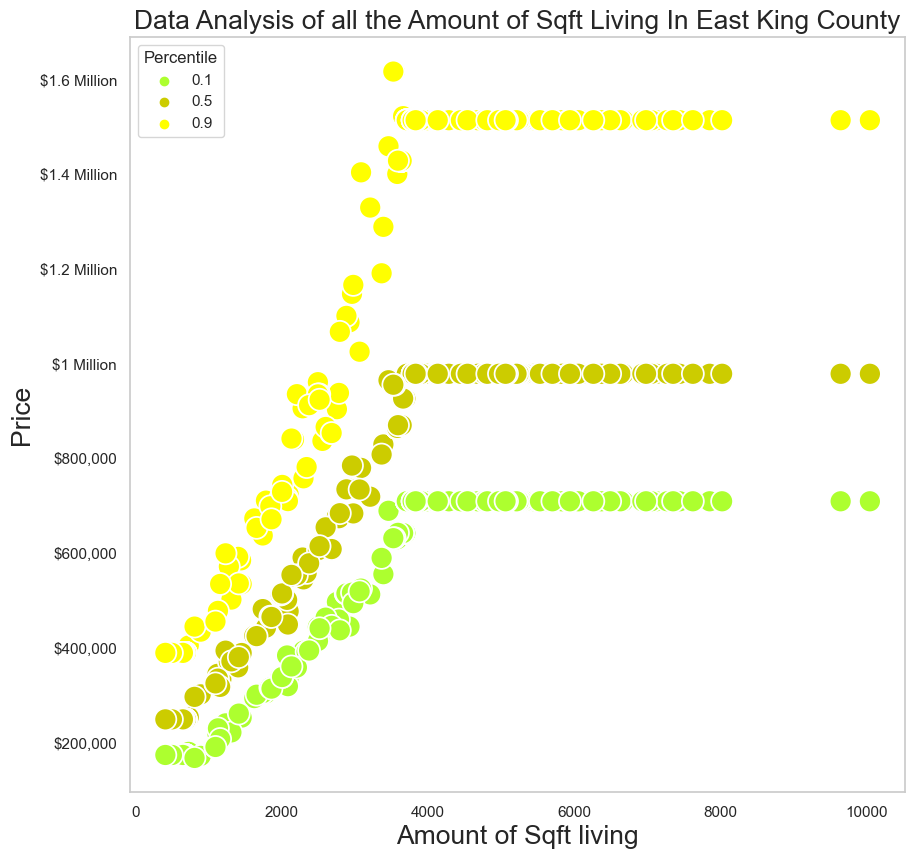

In [46]:
plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
flatui = ["#ADFF2F","#CCCC00","#FFFF00"]
ax =sns.scatterplot(data=melted_data8, x="Amount_of_sqft_living",y='value',s=250,palette=flatui,
                    hue='Percentile')          
plt.grid(linestyle='-', linewidth=0.2)
ax.set_title('Data Analysis of all the Amount of Sqft Living In East King County',size=19)
plt.xlabel("Amount of Sqft living", size=19)
plt.ylabel("Price", size=19)
ax.set_yticklabels(['0','$200,000','$400,000','$600,000','$800,000',
            '$1 Million','$1.2 Million','$1.4 Million','$1.6 Million','$1.75 Million'])
ylabel = plt.ylabel("Price")
xlabel = plt.xlabel("Amount of Sqft living")
plt.gcf().set_size_inches((10,10))

In [58]:
Quantile_regression7_updated = pd.DataFrame({'Amount_of_sqft_living':[0,1000,2000,4000,6000,8000,10000],
    '0.1':[174593.0926661992,174593.0926661992,336638.8760920178,710003.4882798983,
           710003.4882798983,710003.4882798983,710003.4882798983],
    '0.5':[249763.69057519367,249763.69057519367,477802.2089397594,979067.627345773,
           979067.627345773,979067.627345773,979067.627345773],
    '0.9':[390088.5506564102,390088.5506564102, 724824.9763930002,1514226.2483533951,
           1514226.2483533951,1514226.2483533951,1514226.2483533951]})

In [59]:
melted_data8 = pd.melt(Quantile_regression7_updated, id_vars=['Amount_of_sqft_living'])
melted_data8 = melted_data8.rename(columns={'variable': 'Percentile'})
melted_data8

Amount_of_sqft_living Percentile         value
0                       0        0.1  1.745931e+05
1                    1000        0.1  1.745931e+05
2                    2000        0.1  3.366389e+05
3                    4000        0.1  7.100035e+05
4                    6000        0.1  7.100035e+05
5                    8000        0.1  7.100035e+05
6                   10000        0.1  7.100035e+05
7                       0        0.5  2.497637e+05
8                    1000        0.5  2.497637e+05
9                    2000        0.5  4.778022e+05
10                   4000        0.5  9.790676e+05
11                   6000        0.5  9.790676e+05
12                   8000        0.5  9.790676e+05
13                  10000        0.5  9.790676e+05
14                      0        0.9  3.900886e+05
15                   1000        0.9  3.900886e+05
16                   2000        0.9  7.248250e+05
17                   4000        0.9  1.514226e+06
18                   6000        0.9  1.514226e+06
19                   8000        0.9  1.514226e+06
20                  10000        0.9  1.514226e+06

<ipython-input-60-f20dc6832305>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$200,000','$400,000','$600,000','$800,000',


[Text(0, 0.0, '0'),
 Text(0, 200000.0, '$200,000'),
 Text(0, 400000.0, '$400,000'),
 Text(0, 600000.0, '$600,000'),
 Text(0, 800000.0, '$800,000'),
 Text(0, 1000000.0, '$1 Million'),
 Text(0, 1200000.0, '$1.2 Million'),
 Text(0, 1400000.0, '$1.4 Million'),
 Text(0, 1600000.0, '$1.6 Million')]

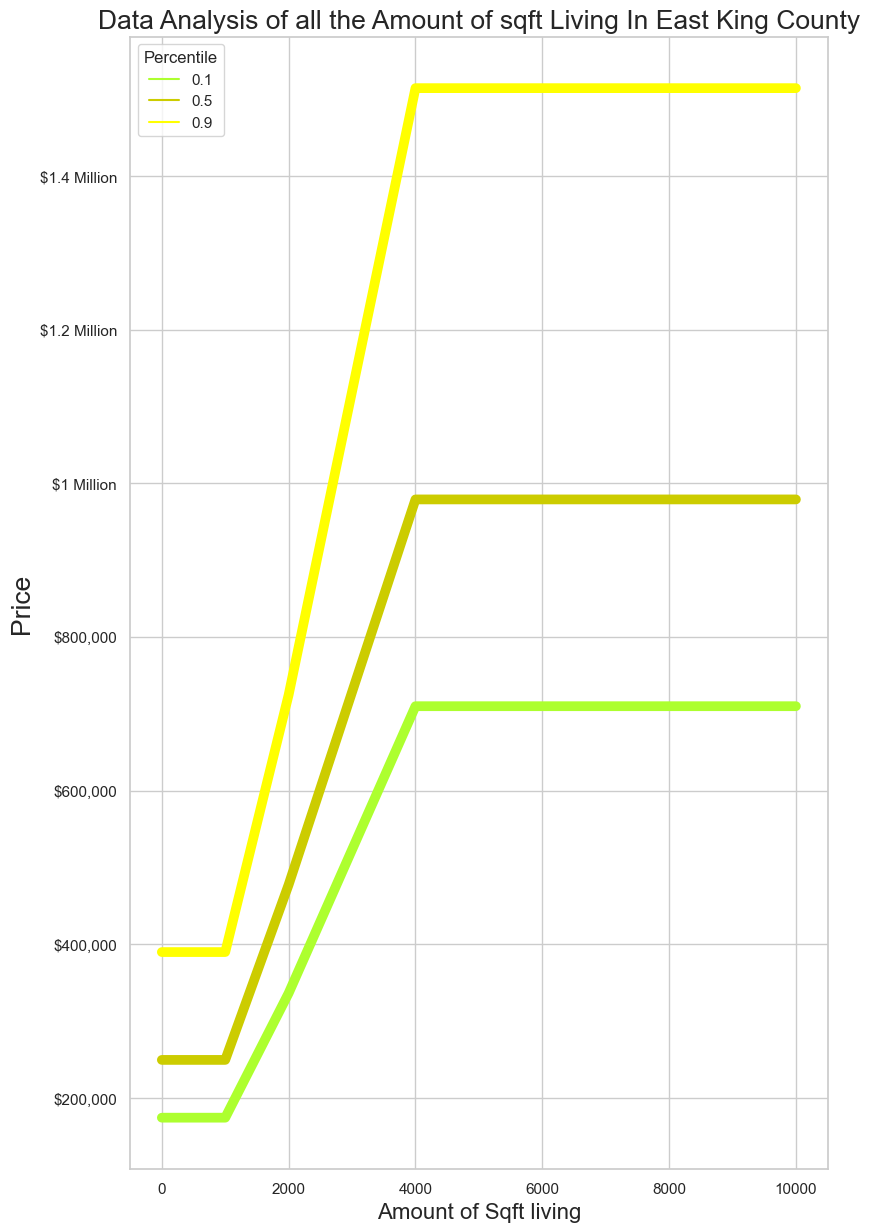

In [60]:
sns.set_style("whitegrid")
flatui = ["#ADFF2F","#CCCC00","#FFFF00"]
ax=sns.lineplot( data=melted_data8, x="Amount_of_sqft_living",y="value",
                linewidth = 7,palette=flatui,hue='Percentile')
plt.gcf().set_size_inches((10,10))
plt.gcf().set_size_inches(9, 15)
plt.legend(title='Percentile')
ax.set_title('Data Analysis of all the Amount of sqft Living In East King County',size=19)
plt.xlabel("Amount of Sqft living", size=16)
plt.ylabel("Price", size=19)
ax.set_yticklabels(['0','$200,000','$400,000','$600,000','$800,000',
            '$1 Million','$1.2 Million','$1.4 Million','$1.6 Million','$1.75 Million'])

In [61]:
(Quantile_regression7['Price'] > Quantile_regression7['0.1']).value_counts()

True     749
False     86
dtype: int64

In [64]:
i = 0
y= 0
x = []
while i < 749:
    x.append('How Many Times The Prediction Was Right')
    i+=1
while y < 86:
    x.append('How Many Times The Prediction Was Wrong')
    y+=1
len(x)
df1 = pd.DataFrame({'Prediction Accuracy':x})

In [62]:
(Quantile_regression7['Price'] > Quantile_regression7['0.5']).value_counts()

True     547
False    288
dtype: int64

In [71]:
i = 0
y= 0
x = []
while i < 547:
    x.append('How Many Times The Prediction Was Right')
    i+=1
while y < 288:
    x.append('How Many Times The Prediction Was Wrong')
    y+=1
len(x)
df2 = pd.DataFrame({'Prediction Accuracy':x})

In [63]:
(Quantile_regression7['Price'] > Quantile_regression7['0.9']).value_counts()

False    615
True     220
dtype: int64

In [70]:
i = 0
y= 0
x = []
while i < 615:
    x.append('How Many Times The Prediction Was Right')
    i+=1
while y < 220:
    x.append('How Many Times The Prediction Was Wrong')
    y+=1
len(x)
df3 = pd.DataFrame({'Prediction Accuracy':x})

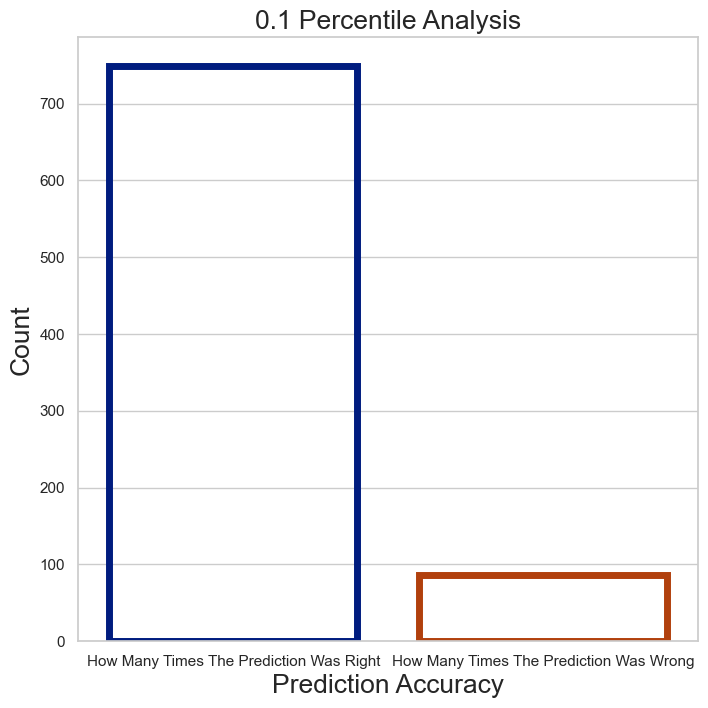

In [67]:
sns.set_style("whitegrid")
plt.gcf().set_size_inches((8,8))
ax = sns.countplot(x="Prediction Accuracy", data=df1,
                   palette=flatui,
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))
ax.set_title('0.1 Percentile Analysis',size=19)
plt.xlabel("Prediction Accuracy", size=19)
plt.ylabel("Count", size=19)
plt.show()

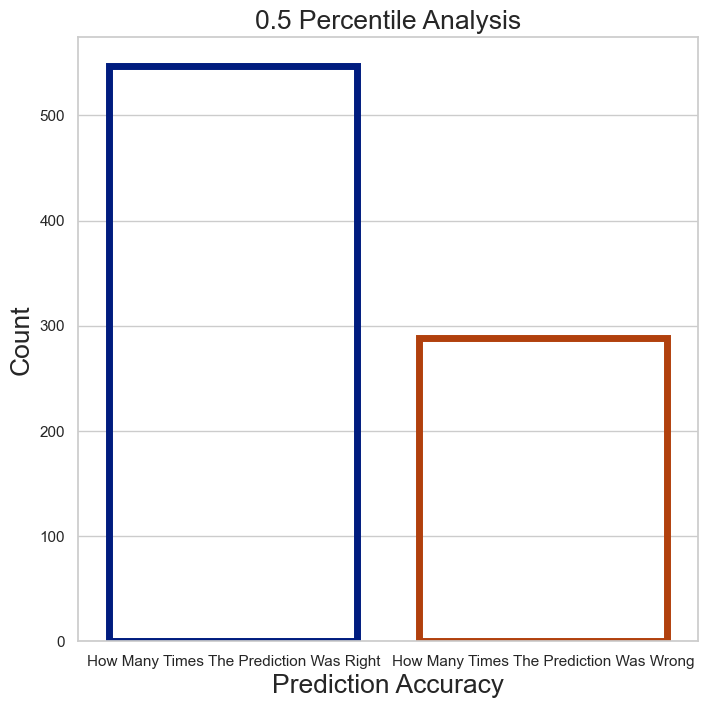

In [72]:
sns.set_style("whitegrid")
plt.gcf().set_size_inches((8,8))
ax = sns.countplot(x="Prediction Accuracy", data=df2,
                   palette=flatui,
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))
ax.set_title('0.5 Percentile Analysis',size=19)
plt.xlabel("Prediction Accuracy", size=19)
plt.ylabel("Count", size=19)
plt.show()

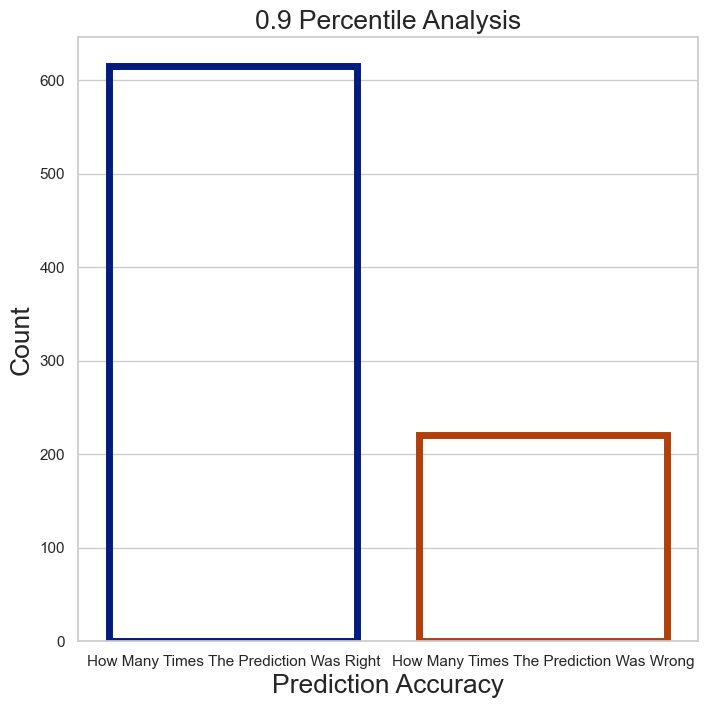

In [73]:
sns.set_style("whitegrid")
plt.gcf().set_size_inches((8,8))
ax = sns.countplot(x="Prediction Accuracy", data=df3,
                   palette=flatui,
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))
ax.set_title('0.9 Percentile Analysis',size=19)
plt.xlabel("Prediction Accuracy", size=19)
plt.ylabel("Count", size=19)
plt.show()

In [79]:
 for x,i in enumerate(melted_data8.Amount_of_sqft_living):
    if 3000 <= i <= 4000:
        print(i,melted_data8.Percentile[x],melted_data8.value[x])

4000 0.1 710003.4882798983
4000 0.5 979067.627345773
4000 0.9 1514226.2483533951


In [325]:
sqft_living = []
for i in index2:
    sqft_living.append(raw_info.sqft_living[i])
len(sqft_living)

8349

In [328]:
Predictions7 = []
for i in sqft_living:
    if -1 <= i <=   1000:Predictions7.append('$174,593- $390,088')
    if 1001 <= i <= 2000:Predictions7.append('$336,638- $724,824')
    if 2001 <= i <= 3000:Predictions7.append('$336,638- $724,824')
    if 3001 <= i <= 4000:Predictions7.append('$710,003- $1,514,226')
    if 4001 <= i <= 8000:Predictions7.append('$710,003- $1,514,226')
    if 8001 <= i <= 9000:Predictions7.append('$710,003- $1,514,226')
    if 9001 <= i <= 20000:Predictions7.append('$710,003- $1,514,226')
len(Predictions7)

8349

In [329]:
Prediction7 = pd.DataFrame({'Amount_of_sqft_Living': sqft_living,
                           'Prediction':Predictions7,'Actual Price':price1})
Prediction7

Amount_of_sqft_Living            Prediction Actual Price
0                      1180    $336,638- $724,824     $221,900
1                      1960    $336,638- $724,824     $604,000
2                      1780    $336,638- $724,824     $229,500
3                      2950    $336,638- $724,824     $650,000
4                      1890    $336,638- $724,824     $395,000
...                     ...                   ...          ...
8344                   2520    $336,638- $724,824     $610,685
8345                   3510  $710,003- $1,514,226   $1,010,000
8346                   1310    $336,638- $724,824     $475,000
8347                   2310    $336,638- $724,824     $400,000
8348                   1600    $336,638- $724,824     $400,000

[8349 rows x 3 columns]

In [330]:
%store Prediction7

Stored 'Prediction7' (DataFrame)


In [85]:
def SQFT_LOT(SQFT_LOTS):
    
    locations = house_info['Location'].tolist()
    locationzip =raw_info.zipcode
    sqft_lot = house_info['Sqft_lot'].tolist()

    lot_index = []
    for i,x in enumerate(sqft_lot):
        if x == SQFT_LOTS:lot_index.append(i)
            
    index = []
    index = []
    for i,x in enumerate(raw_info.lat):
        if x == 47.618:index.append(i)
        if x == 47.528:index.append(i)
        if x == 47.502:index.append(i)  
        if x == 47.530:index.append(i)
        if x == 47.567:index.append(i)
        if x == 47.733:index.append(i)   
        if x == 47.648:index.append(i)
    
    zip_loca = []
    for i in index:zip_loca.append(locationzip[i])

    lot_eastking = []
    for i in lot_index:
        if locations[i] == zip_loca[0] : lot_eastking.append(i)
        elif locations[i] == zip_loca[1] : lot_eastking.append(i)
        elif locations[i] == zip_loca[2] : lot_eastking.append(i)
        elif locations[i] == zip_loca[3] : lot_eastking.append(i)
        elif locations[i] == zip_loca[4] : lot_eastking.append(i)
        elif locations[i] == zip_loca[5] : lot_eastking.append(i)
        elif locations[i] == zip_loca[6] : lot_eastking.append(i)
        elif locations[i] == zip_loca[7]: lot_eastking.append(i)
        elif locations[i] == zip_loca[8] : lot_eastking.append(i)
        elif locations[i] == zip_loca[9] : lot_eastking.append(i)
        elif locations[i] == zip_loca[10] : lot_eastking.append(i)
        elif locations[i] == zip_loca[11] : lot_eastking.append(i)
        elif locations[i] == zip_loca[12]: lot_eastking.append(i)
        elif locations[i] == zip_loca[13] : lot_eastking.append(i)
        elif locations[i] == zip_loca[14] : lot_eastking.append(i)
        elif locations[i] == zip_loca[15] : lot_eastking.append(i)
        elif locations[i] == zip_loca[16]: lot_eastking.append(i)
        elif locations[i] == zip_loca[17] : lot_eastking.append(i)
        elif locations[i] == zip_loca[18]: lot_eastking.append(i)
        elif locations[i] == zip_loca[19] : lot_eastking.append(i)
        elif locations[i] == zip_loca[20]: lot_eastking.append(i)
        elif locations[i] == zip_loca[21] : lot_eastking.append(i)
        elif locations[i] == zip_loca[22] : lot_eastking.append(i)
        elif locations[i] == zip_loca[23] : lot_eastking.append(i)
        elif locations[i] == zip_loca[24] : lot_eastking.append(i)
        elif locations[i] == zip_loca[25] : lot_eastking.append(i)
        elif locations[i] == zip_loca[26] : lot_eastking.append(i)
        elif locations[i] == zip_loca[27] : lot_eastking.append(i)
        elif locations[i] == zip_loca[28]: lot_eastking.append(i)
        elif locations[i] == zip_loca[29] : lot_eastking.append(i)
        elif locations[i] == zip_loca[30] : lot_eastking.append(i)
        elif locations[i] == zip_loca[31]: lot_eastking.append(i)
        elif locations[i] == zip_loca[32] : lot_eastking.append(i)
        elif locations[i] == zip_loca[33] : lot_eastking.append(i)
        elif locations[i] == zip_loca[34] : lot_eastking.append(i)
        elif locations[i] == zip_loca[35]: lot_eastking.append(i)
        elif locations[i] == zip_loca[36] : lot_eastking.append(i)
        elif locations[i] == zip_loca[37] : lot_eastking.append(i)
        elif locations[i] == zip_loca[38] : lot_eastking.append(i)
        elif locations[i] == zip_loca[39] : lot_eastking.append(i)
        elif locations[i] == zip_loca[40] : lot_eastking.append(i)
        elif locations[i] == zip_loca[41] : lot_eastking.append(i)
        elif locations[i] == zip_loca[42] : lot_eastking.append(i)
        elif locations[i] == zip_loca[43]: lot_eastking.append(i)
        elif locations[i] == zip_loca[44] : lot_eastking.append(i)
        elif locations[i] == zip_loca[45] : lot_eastking.append(i)
    price = house_info["Price"].tolist()

    price_eastking = []
    for i in lot_eastking:price_eastking.append(price[i])
    return(price_eastking)

no_of_sqft_lot = house_info["Sqft_lot"].value_counts().index.tolist()
price_lot_eastking = []
for i in no_of_sqft_lot:
    price_lot_eastking.append(SQFT_LOT(i))
price_lot_eastking= sum(price_lot_eastking, [])
len(price_lot_eastking)

8349

In [86]:
def AMOUNT_LOT(AMOUNT_LOTS):
    locations = house_info['Location'].tolist()
    locationzip =raw_info.zipcode
    sqft_lot = house_info['Sqft_lot'].tolist()
    X_value = []
    
    lot_index = []
    for i,x in enumerate(sqft_lot):
        if x == AMOUNT_LOTS:lot_index.append(i)
    index = []
    for i,x in enumerate(raw_info.lat):
        if x == 47.618:index.append(i)
        if x == 47.528:index.append(i)
        if x == 47.502:index.append(i)  
        if x == 47.530:index.append(i)
        if x == 47.567:index.append(i)
        if x == 47.733:index.append(i)   
        if x == 47.648:index.append(i)
    
    zip_loca = []
    for i in index:zip_loca.append(locationzip[i])

    for i in lot_index:
        if locations[i] == zip_loca[0] : X_value.append(AMOUNT_LOTS)
        elif locations[i] == zip_loca[1]: X_value.append(AMOUNT_LOTS)
        elif locations[i] == zip_loca[2] : X_value.append(AMOUNT_LOTS)
        elif locations[i] == zip_loca[3] : X_value.append(AMOUNT_LOTS)
        elif locations[i] == zip_loca[4] : X_value.append(AMOUNT_LOTS)
        elif locations[i] == zip_loca[5]: X_value.append(AMOUNT_LOTS)
        elif locations[i] == zip_loca[6] : X_value.append(AMOUNT_LOTS)
        elif locations[i] == zip_loca[7]: X_value.append(AMOUNT_LOTS)
        elif locations[i] == zip_loca[8] : X_value.append(AMOUNT_LOTS)
        elif locations[i] == zip_loca[9]: X_value.append(AMOUNT_LOTS)
        elif locations[i] == zip_loca[10] : X_value.append(AMOUNT_LOTS)
        elif locations[i] == zip_loca[11] : X_value.append(AMOUNT_LOTS)
        elif locations[i] == zip_loca[12] : X_value.append(AMOUNT_LOTS)
        elif locations[i] == zip_loca[13]: X_value.append(AMOUNT_LOTS)
        elif locations[i] == zip_loca[14] : X_value.append(AMOUNT_LOTS)
        elif locations[i] == zip_loca[15]: X_value.append(AMOUNT_LOTS)
        elif locations[i] == zip_loca[16] : X_value.append(AMOUNT_LOTS)
        elif locations[i] == zip_loca[17]: X_value.append(AMOUNT_LOTS)
        elif locations[i] == zip_loca[18] : X_value.append(AMOUNT_LOTS)
        elif locations[i] == zip_loca[19] : X_value.append(AMOUNT_LOTS)
        elif locations[i] == zip_loca[20] : X_value.append(AMOUNT_LOTS)
        elif locations[i] == zip_loca[21]: X_value.append(AMOUNT_LOTS)
        elif locations[i] == zip_loca[22] : X_value.append(AMOUNT_LOTS)
        elif locations[i] == zip_loca[23]: X_value.append(AMOUNT_LOTS)
        elif locations[i] == zip_loca[24] : X_value.append(AMOUNT_LOTS)
        elif locations[i] == zip_loca[25] : X_value.append(AMOUNT_LOTS)
        elif locations[i] == zip_loca[26]: X_value.append(AMOUNT_LOTS)
        elif locations[i] == zip_loca[27] : X_value.append(AMOUNT_LOTS)
        elif locations[i] == zip_loca[28]: X_value.append(AMOUNT_LOTS)
        elif locations[i] == zip_loca[29] : X_value.append(AMOUNT_LOTS)
        elif locations[i] == zip_loca[30]: X_value.append(AMOUNT_LOTS)
        elif locations[i] == zip_loca[31] : X_value.append(AMOUNT_LOTS)
        elif locations[i] == zip_loca[32] : X_value.append(AMOUNT_LOTS)
        elif locations[i] == zip_loca[33] : X_value.append(AMOUNT_LOTS)
        elif locations[i] == zip_loca[34]: X_value.append(AMOUNT_LOTS)
        elif locations[i] == zip_loca[35] : X_value.append(AMOUNT_LOTS)
        elif locations[i] == zip_loca[36]: X_value.append(AMOUNT_LOTS)
        elif locations[i] == zip_loca[37] : X_value.append(AMOUNT_LOTS)
        elif locations[i] == zip_loca[38]: X_value.append(AMOUNT_LOTS)
        elif locations[i] == zip_loca[39] : X_value.append(AMOUNT_LOTS)
        elif locations[i] == zip_loca[40] : X_value.append(AMOUNT_LOTS)
        elif locations[i] == zip_loca[41]: X_value.append(AMOUNT_LOTS)
        elif locations[i] == zip_loca[42] : X_value.append(AMOUNT_LOTS)
        elif locations[i] == zip_loca[43]: X_value.append(AMOUNT_LOTS)
        elif locations[i] == zip_loca[44] : X_value.append(AMOUNT_LOTS)
        elif locations[i] == zip_loca[45]: X_value.append(AMOUNT_LOTS)
       

    return X_value
no_of_sqft_lot = house_info["Sqft_lot"].value_counts().index.tolist()
amount_lot_eastking = []
for i in no_of_sqft_lot:
    amount_lot_eastking.append(AMOUNT_LOT(i))
amount_lot_eastking= sum(amount_lot_eastking, [])
len(amount_lot_eastking)

8349

In [111]:
regressiondata8 = pd.DataFrame({'Amount_of_Lot':amount_lot_eastking,
                                'Price':price_lot_eastking})

In [112]:
#taking away outlyers
numbers = []
lots = []
index = []
for i,x in enumerate(regressiondata8.Amount_of_Lot):
    numbers.append(regressiondata8.Price[i])
    lots.append(x)
    

for x,i in enumerate(lots):
    if 200000 <= i :
        index.append(x)

for i in index:
    regressiondata8= regressiondata8.drop(i)

regressiondata8

Amount_of_Lot      Price
0              5000   604000.0
1              5000   650000.0
2              5000   207950.0
3              5000   615000.0
4              5000   275000.0
...             ...        ...
8344          11533  1150000.0
8345           9532   711000.0
8346           1833   798500.0
8347          14564   308500.0
8348          16619  1120000.0

[8284 rows x 2 columns]

<ipython-input-113-88cf96ca4a46>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$0','$1 Million','$2 Million','$3 Million','$4 Million',


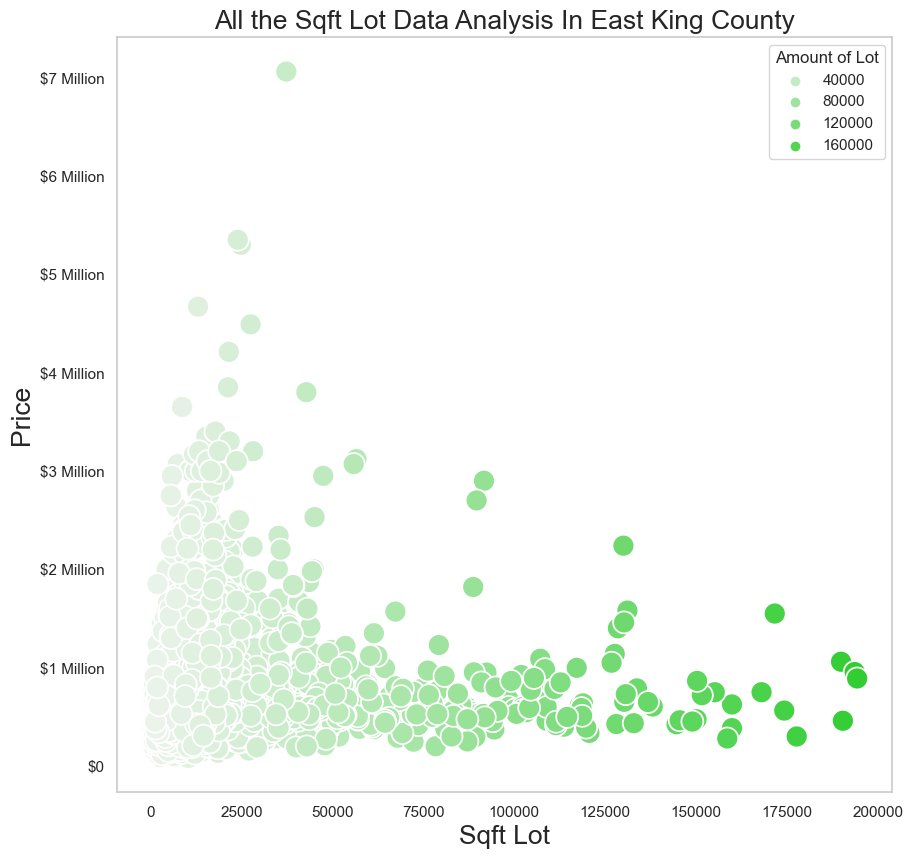

In [113]:
x = regressiondata8['Amount_of_Lot']
y = regressiondata8['Price']
sns.set(style='whitegrid')
cmap = sns.light_palette("#32CD32", as_cmap=True)

plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
ax = sns.scatterplot(data=regressiondata8, x=x, y=y,s=250,hue='Amount_of_Lot',
                      palette=cmap)
plt.grid(linestyle='-', linewidth=0.2)
ax.set_title('All the Sqft Lot Data Analysis In East King County',size=19)
plt.xlabel("Sqft Lot", size=19)
plt.ylabel("Price", size=19)
plt.legend(title='Amount of Lot')
plt.gcf().set_size_inches((10,10))
ax.set_yticklabels(['0','$0','$1 Million','$2 Million','$3 Million','$4 Million',
                   '$5 Million','$6 Million','$7 Million'])
plt.show()

In [114]:
train_df, test_df = train_test_split(regressiondata8, test_size=0.10, shuffle=False)

In [115]:
X_train, y_train = train_df[['Amount_of_Lot']], train_df[['Price']]
X_test, y_test = test_df[['Amount_of_Lot']], test_df[['Price']]

In [116]:
classifiers = {}
for tau in [0.1, 0.5, 0.9]:
    clf = LGBMRegressor(objective='quantile', alpha=tau)
    clf.fit(X_train, y_train)
    preds = pd.DataFrame(clf.predict(X_test), columns = [str(tau)])
    classifiers[str(tau)] = {'clf': clf, 'predictions': preds}

In [117]:
Quantile_regression7 = pd.DataFrame({'Amount_of_Lot': X_test.reset_index()['Amount_of_Lot'],
              '0.1': classifiers['0.1']['predictions']['0.1'],
              '0.5': classifiers['0.5']['predictions']['0.5'],
              '0.9': classifiers['0.9']['predictions']['0.9'],
              'Price': y_test.reset_index()['Price']})
Quantile_regression7[100:]

Amount_of_Lot            0.1           0.5           0.9      Price
100          35015  448434.800581  6.094323e+05  1.221524e+06   532000.0
101           6341  245022.433043  5.687805e+05  9.179925e+05   625000.0
102          20668  477956.688059  1.015183e+06  2.091482e+06  1730000.0
103          33981  369910.329765  7.689578e+05  1.322877e+06   785000.0
104           2407  249990.498541  3.969435e+05  6.763405e+05   375000.0
..             ...            ...           ...           ...        ...
824          11533  336496.799791  5.780729e+05  1.208037e+06  1150000.0
825           9532  351557.114182  7.612598e+05  1.360386e+06   711000.0
826           1833  267886.110639  4.442694e+05  6.683107e+05   798500.0
827          14564  396685.998138  6.325842e+05  1.486258e+06   308500.0
828          16619  354820.580308  9.324086e+05  1.675117e+06  1120000.0

[729 rows x 5 columns]

In [130]:
melted_data8 = pd.melt(Quantile_regression7, id_vars=['Amount_of_Lot'])
melted_data8 = melted_data8.drop(range(2487,3316))
melted_data8 = melted_data8.rename(columns={'variable': 'Percentile'})
melted_data8

Amount_of_Lot Percentile         value
0              5590        0.1  2.015587e+05
1              5558        0.1  2.382453e+05
2             15875        0.1  3.487160e+05
3              5638        0.1  2.586689e+05
4             11665        0.1  3.364968e+05
...             ...        ...           ...
2482          11533        0.9  1.208037e+06
2483           9532        0.9  1.360386e+06
2484           1833        0.9  6.683107e+05
2485          14564        0.9  1.486258e+06
2486          16619        0.9  1.675117e+06

[2487 rows x 3 columns]

In [147]:
for x,i in enumerate(melted_data8.Amount_of_Lot):
    if 75000 <= i <= 100000:
        print(i,melted_data8.Percentile[x],melted_data8.value[x])

94855 0.1 389143.7947809977
99170 0.1 389143.7947809977
78844 0.1 334849.34066164994
80837 0.1 334849.34066164994
84506 0.1 334849.34066164994
89651 0.1 389143.7947809977
94855 0.5 574528.3913706675
99170 0.5 574528.3913706675
78844 0.5 574528.3913706675
80837 0.5 574528.3913706675
84506 0.5 574528.3913706675
89651 0.5 574528.3913706675
94855 0.9 939876.5248010337
99170 0.9 939876.5248010337
78844 0.9 962634.0739366666
80837 0.9 962634.0739366666
84506 0.9 962634.0739366666
89651 0.9 939876.5248010337


<ipython-input-134-56d44bbb2c65>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$250,000','$500,000','$750,000','$1 Million',


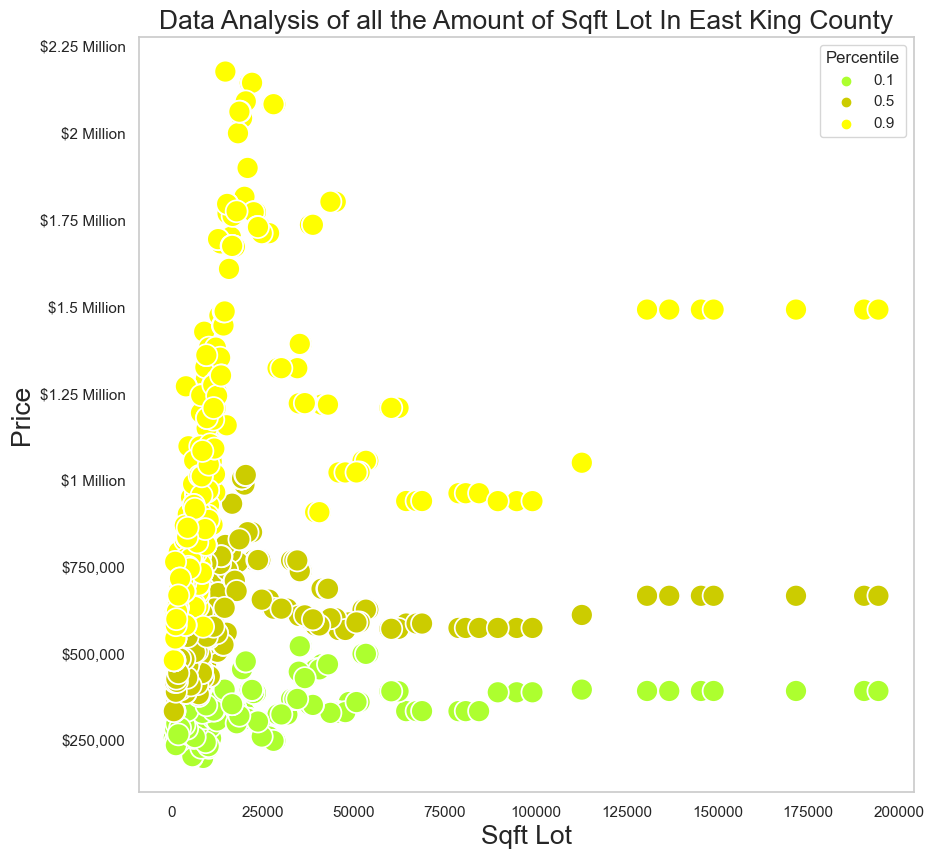

In [134]:
plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
flatui = ["#ADFF2F","#CCCC00","#FFFF00"]
ax =sns.scatterplot(data=melted_data8, x="Amount_of_Lot",y='value',s=250,palette=flatui,
                    hue='Percentile')          
plt.grid(linestyle='-', linewidth=0.2)
ax.set_title('Data Analysis of all the Amount of Sqft Lot In East King County',size=19)
plt.xlabel("Sqft Lot", size=19)
plt.ylabel("Price", size=19)
ax.set_yticklabels(['0','$250,000','$500,000','$750,000','$1 Million',
                    '$1.25 Million','$1.5 Million','$1.75 Million','$2 Million','$2.25 Million'])
ylabel = plt.ylabel("Price")
xlabel = plt.xlabel("Sqft Lot")
plt.gcf().set_size_inches((10,10))

In [158]:
Quantile_regression7_updated = pd.DataFrame({'Amount_of_sqft_lot':[0,25000,50000,75000,100000,
                                                                  125000,150000,175000,200000],
    '0.1':[201558.6874958529,201558.6874958529,201558.6874958529,201558.6874958529,
          396832.02741502994,396832.02741502994,396832.02741502994,396832.02741502994,
          396832.02741502994],
    '0.5':[574528.3913706675,574528.3913706675,574528.3913706675,574528.3913706675,
           667162.5664501119,
        667162.5664501119,667162.5664501119,667162.5664501119,667162.5664501119],
    '0.9':[939876.5248010337,939876.5248010337,939876.5248010337,939876.5248010337,1491699.0631831647
        ,1491699.0631831647,1491699.0631831647,1491699.0631831647,1491699.0631831647]})

In [159]:
melted_data8 = pd.melt(Quantile_regression7_updated, id_vars=['Amount_of_sqft_lot'])
melted_data8 = melted_data8.rename(columns={'variable': 'Percentile'})
melted_data8

Amount_of_sqft_lot Percentile         value
0                    0        0.1  2.015587e+05
1                25000        0.1  2.015587e+05
2                50000        0.1  2.015587e+05
3                75000        0.1  2.015587e+05
4               100000        0.1  3.968320e+05
5               125000        0.1  3.968320e+05
6               150000        0.1  3.968320e+05
7               175000        0.1  3.968320e+05
8               200000        0.1  3.968320e+05
9                    0        0.5  5.745284e+05
10               25000        0.5  5.745284e+05
11               50000        0.5  5.745284e+05
12               75000        0.5  5.745284e+05
13              100000        0.5  6.671626e+05
14              125000        0.5  6.671626e+05
15              150000        0.5  6.671626e+05
16              175000        0.5  6.671626e+05
17              200000        0.5  6.671626e+05
18                   0        0.9  9.398765e+05
19               25000        0.9  9.398765e+05
20               50000        0.9  9.398765e+05
21               75000        0.9  9.398765e+05
22              100000        0.9  1.491699e+06
23              125000        0.9  1.491699e+06
24              150000        0.9  1.491699e+06
25              175000        0.9  1.491699e+06
26              200000        0.9  1.491699e+06

<ipython-input-160-966aa3e71dc2>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','$200,000','$400,000','$600,000','$800,000','$1 Million',


[Text(0, 0.0, '0'),
 Text(0, 200000.0, '$200,000'),
 Text(0, 400000.0, '$400,000'),
 Text(0, 600000.0, '$600,000'),
 Text(0, 800000.0, '$800,000'),
 Text(0, 1000000.0, '$1 Million'),
 Text(0, 1200000.0, '$1.2 Million'),
 Text(0, 1400000.0, '$1.4 Million'),
 Text(0, 1600000.0, '')]

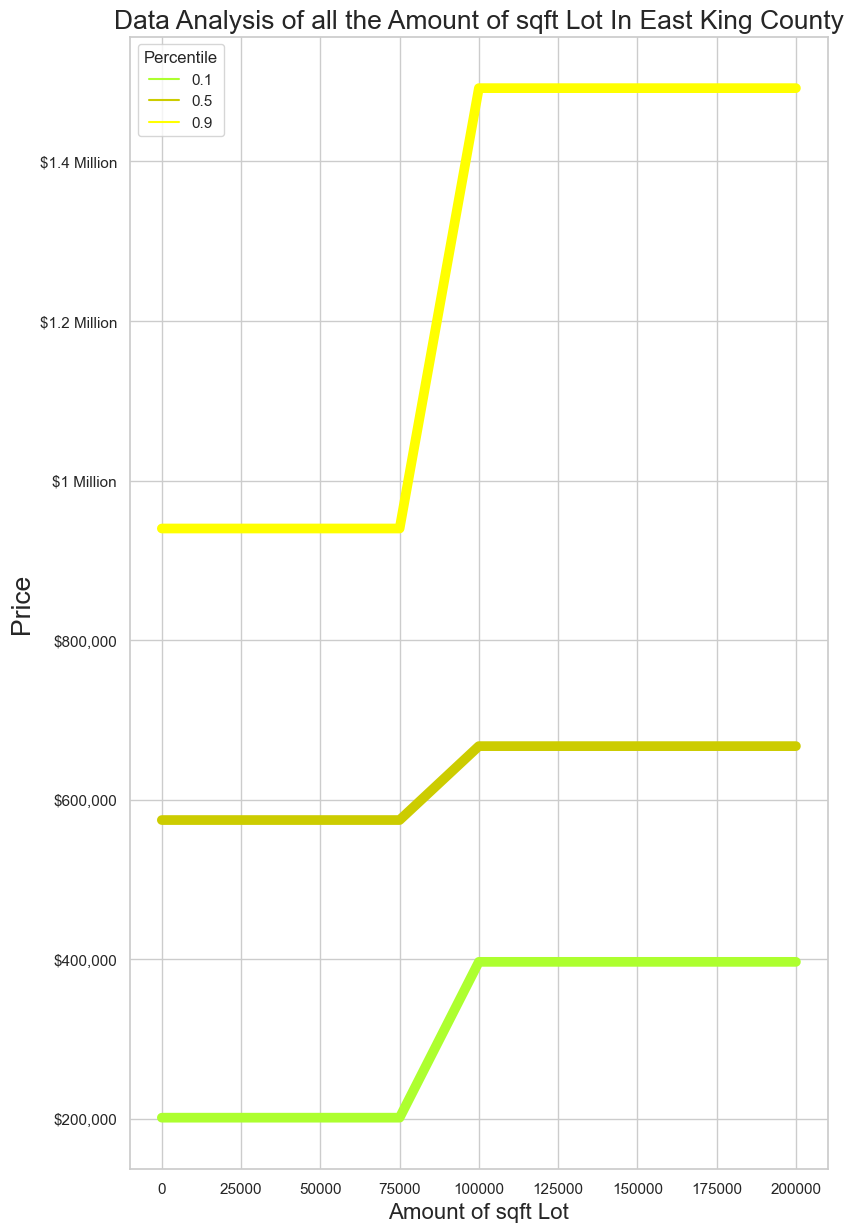

In [160]:
sns.set_style("whitegrid")
flatui = ["#ADFF2F","#CCCC00","#FFFF00"]
ax=sns.lineplot( data=melted_data8, x="Amount_of_sqft_lot",y="value",
                linewidth = 7,palette=flatui,hue='Percentile')
plt.gcf().set_size_inches((10,10))
plt.gcf().set_size_inches(9, 15)
plt.legend(title='Percentile')
ax.set_title('Data Analysis of all the Amount of sqft Lot In East King County',size=19)
plt.xlabel("Amount of sqft Lot", size=16)
plt.ylabel("Price", size=19)
ax.set_yticklabels(['0','$200,000','$400,000','$600,000','$800,000','$1 Million',
                   '$1.2 Million','$1.4 Million'])

In [173]:
(Quantile_regression7['Price'] > Quantile_regression7['0.1']).value_counts()

True     755
False     74
dtype: int64

In [164]:
i = 0
y= 0
x = []
while i < 755:
    x.append('How Many Times The Prediction Was Right')
    i+=1
while y < 74:
    x.append('How Many Times The Prediction Was Wrong')
    y+=1
len(x)
df1 = pd.DataFrame({'Prediction Accuracy':x})

In [162]:
(Quantile_regression7['Price'] > Quantile_regression7['0.5']).value_counts()

True     449
False    380
dtype: int64

In [166]:
i = 0
y= 0
x = []
while i < 449:
    x.append('How Many Times The Prediction Was Right')
    i+=1
while y < 380:
    x.append('How Many Times The Prediction Was Wrong')
    y+=1
len(x)
df2 = pd.DataFrame({'Prediction Accuracy':x})

In [163]:
(Quantile_regression7['Price'] > Quantile_regression7['0.9']).value_counts()

False    740
True      89
dtype: int64

In [167]:
i = 0
y= 0
x = []
while i < 740:
    x.append('How Many Times The Prediction Was Right')
    i+=1
while y < 89:
    x.append('How Many Times The Prediction Was Wrong')
    y+=1
len(x)
df1 = pd.DataFrame({'Prediction Accuracy':x})

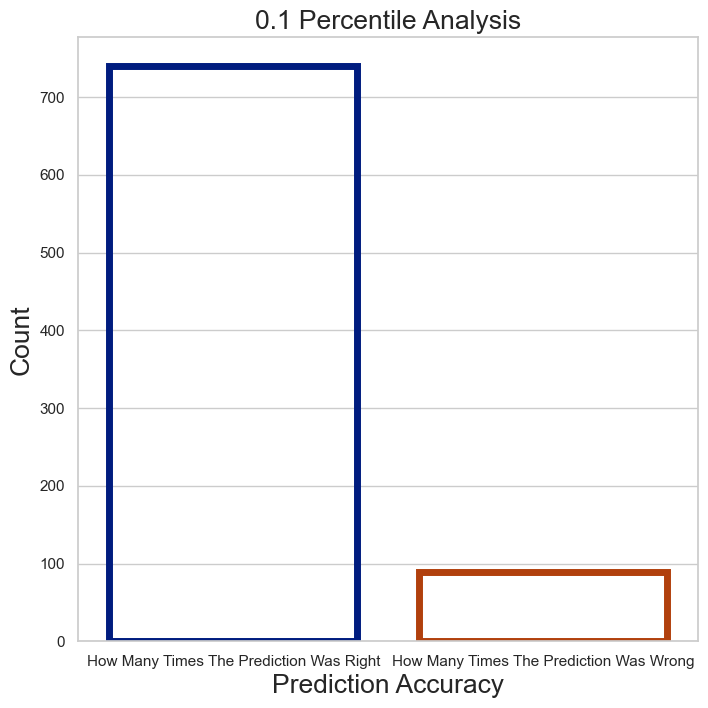

In [168]:
sns.set_style("whitegrid")
plt.gcf().set_size_inches((8,8))
ax = sns.countplot(x="Prediction Accuracy", data=df1,
                   palette=flatui,
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))
ax.set_title('0.1 Percentile Analysis',size=19)
plt.xlabel("Prediction Accuracy", size=19)
plt.ylabel("Count", size=19)
plt.show()

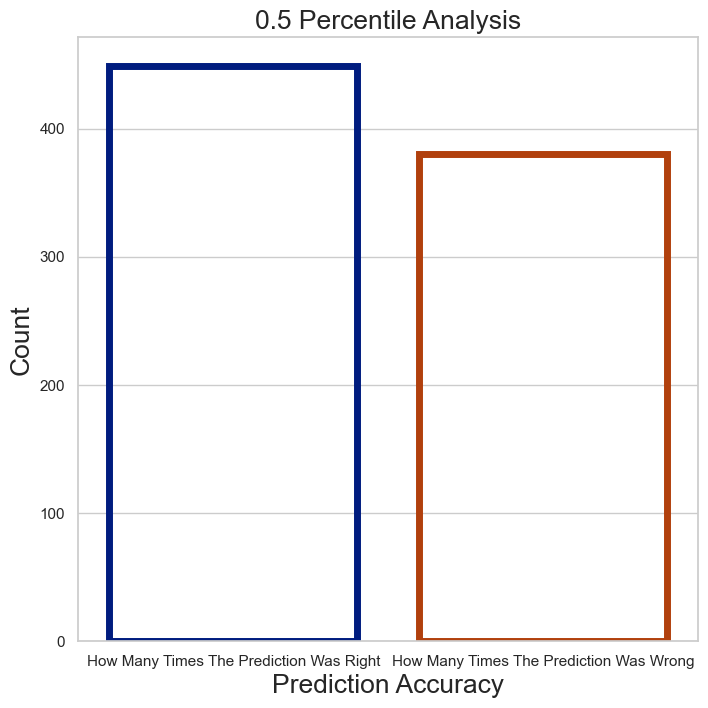

In [170]:
sns.set_style("whitegrid")
plt.gcf().set_size_inches((8,8))
ax = sns.countplot(x="Prediction Accuracy", data=df2,
                   palette=flatui,
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))
ax.set_title('0.5 Percentile Analysis',size=19)
plt.xlabel("Prediction Accuracy", size=19)
plt.ylabel("Count", size=19)
plt.show()

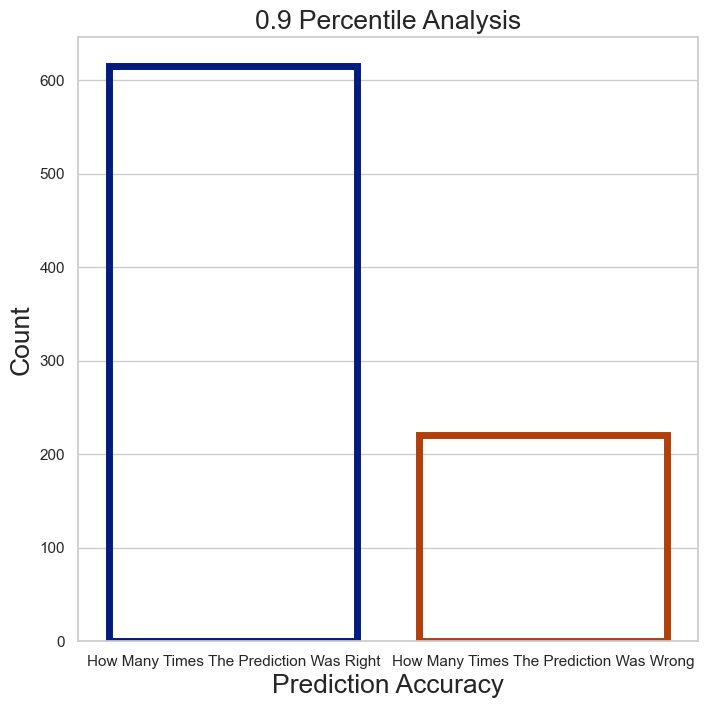

In [171]:
sns.set_style("whitegrid")
plt.gcf().set_size_inches((8,8))
ax = sns.countplot(x="Prediction Accuracy", data=df3,
                   palette=flatui,
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))
ax.set_title('0.9 Percentile Analysis',size=19)
plt.xlabel("Prediction Accuracy", size=19)
plt.ylabel("Count", size=19)
plt.show()

In [182]:
for x,i in enumerate(melted_data8.Amount_of_sqft_lot):
    if i <= 200001 :
        print(i,melted_data8.Percentile[x],melted_data8.value[x])

0 0.1 201558.6874958529
25000 0.1 201558.6874958529
50000 0.1 201558.6874958529
75000 0.1 201558.6874958529
100000 0.1 396832.02741502994
125000 0.1 396832.02741502994
150000 0.1 396832.02741502994
175000 0.1 396832.02741502994
200000 0.1 396832.02741502994
0 0.5 574528.3913706675
25000 0.5 574528.3913706675
50000 0.5 574528.3913706675
75000 0.5 574528.3913706675
100000 0.5 667162.5664501119
125000 0.5 667162.5664501119
150000 0.5 667162.5664501119
175000 0.5 667162.5664501119
200000 0.5 667162.5664501119
0 0.9 939876.5248010337
25000 0.9 939876.5248010337
50000 0.9 939876.5248010337
75000 0.9 939876.5248010337
100000 0.9 1491699.0631831647
125000 0.9 1491699.0631831647
150000 0.9 1491699.0631831647
175000 0.9 1491699.0631831647
200000 0.9 1491699.0631831647


In [331]:
sqft_lot = []
for i in index2:
    sqft_lot.append(raw_info.sqft_lot[i])
len(sqft_lot)

8349

In [332]:
Predictions8 = []
for i in sqft_lot:
    
    if 0 <= i <=  25000     :Predictions8.append('$201,558 - $939,876') 
    if 25001 <= i <= 50000  :Predictions8.append('$201,558 - $939,876') 
    if 50001 <= i <= 75000  :Predictions8.append('$201,558 - $939,876') 
    if 75001 <= i <= 100000 :Predictions8.append('$396,832- $1,491,699')
    if 100001 <= i <= 125000:Predictions8.append('$396,832- $1,491,699')
    if 125001 <= i <= 150000:Predictions8.append('$396,832- $1,491,699')
    if 150001 <= i <= 175000:Predictions8.append('$396,832- $1,491,699')
    if 175001 <= i <= 200000:Predictions8.append('$396,832- $1,491,699')
    if  i >= 200001         :Predictions8.append('$396,832- $1,91,699')
len(Predictions8)

8349

In [333]:
Prediction8 = pd.DataFrame({'Amount_of_sqft_lot': sqft_lot,
                           'Prediction':Predictions8,'Actual Price':price1})
Prediction8

Amount_of_sqft_lot           Prediction Actual Price
0                   5650  $201,558 - $939,876     $221,900
1                   5000  $201,558 - $939,876     $604,000
2                   7470  $201,558 - $939,876     $229,500
3                   5000  $201,558 - $939,876     $650,000
4                  14040  $201,558 - $939,876     $395,000
...                  ...                  ...          ...
8344                6023  $201,558 - $939,876     $610,685
8345                7200  $201,558 - $939,876   $1,010,000
8346                1294  $201,558 - $939,876     $475,000
8347                5813  $201,558 - $939,876     $400,000
8348                2388  $201,558 - $939,876     $400,000

[8349 rows x 3 columns]

In [334]:
%store Prediction8

Stored 'Prediction8' (DataFrame)
